Name: Yang Yu Student ID: 1008149120

# **What role does urbanization, using China as an example, play in shaping average temperature trends in a warming world?**

# Project One

## Introduction

With the development of modern cities and urbanization, the global average temperature has been increasing over the past century, leading to concerns about the impacts of climate change. While urbanization significantly improves life standards and society efficiency, it is commonly believed to be a significant contributor to the global warming process. 

China, one of the fastest-growing developing countries in the world, is undergoing rapid urbanization in the recent few decades. However, the rapid urbanization also comes with high pollution level in China and serious environment problems. Because of this, researchers have studied how the urbanization process affect the environment and how does it contribute to the high pollution in China. It is commonly believed that although the rapid urbanization is an indicator of China’s economic prosperity. Li et al (2021) suggests that living in the cities and the urbanization effect has a positive effect on subjective well-being and improve their stratification. It is a unknown question of how the urbanization will impact the environment. Global warming effect has been the center of the discussion. There are a lot of evidence from the world showing that the world is becoming warmer, due to the greenhouse effect, which is the result from urbanization and industrialization. Although we have abundant evidence from the developed country such as the United States or other European countries showing that the urbanization process do increase the speed of temperature change, this question is still unclear for developing countries like China, which started their urbanization process almost a century later than developed countries. This research aims to examine the role of urbanization in shaping average temperature trends in China based on a time series analysis starting from 1950 to 2012. 

Specifically, 1950 to 1978 is the period of Chairman Mao Zedong's era, named after the founder of the Communist Party of China. Economic development was unstable and slow due to some policies that were originally aimed to achieve the goal of industrialization. The process of urbanization and modernization was slow. 1979 to 2012 is the period China decided to begin the journey of reforming and opening up, also known as the period of the Deng Xiaoping era, named after the second leader that achieved economic recovery and development. He proposed a series of policies that aimed to accelerate the process of industrialization, including one of the most important policies in Chinese history: the Chinese reform. 

The aim of this analysis is to investigate the relationship between average temperature and several independent variables, including GDP, urban and rural population, sectoral employment, electricity generation, and other measures of urbanization in China from 1950 to 2012. We first examine the trend of annual temperature change over the entire period and find that the average temperature is increasing, with the period from 1978 to 2012 showing the most significant increase, aligning with the highest economic development speed. We then analyze the frequency of cities that experience temperatures over a certain value using percentage of annual average temperature as the independent variable. We also investigate the relationship between annual average temperature and urban population, observing a positive correlation between urban population and average temperature, as well as a positive relationship between the percentage of the total population residing in urban areas and average temperature in China over the entire period. In addition, we utilize heat maps to visualize the change in average temperature across China.

Several studies have investigated the role of urbanization in shaping average temperature trends in China. Li et al. (2013) highlighted the importance of land cover change and human activity in contributing to warming temperature in China. As a result of urbanization, nearly half of the chosen stations have been converted to urban stations due to land cover change. In urbanized station, they observed the most warming effect. Zhang et al. (2010) states that the conversion of rural land to urban land cover results in significant changes to near-surface temperature, humidity, wind speed and precipitation. Similarly, Sun et al states that the contribution of urbanization to warming in China was found to be significant, accounting for approximately one-third of the total warming (2016). In addition, urbanization does not only affect warming temperature due to economic development and industrilization, but also on its population scale and geographic environment (Fang et al., 2013). Similar to our approach, the researchers divide the 49-year study period into two periods: a period of less economic development, from 1961 to 1978, and a period of greater economic development, from 1979 to 2009. They found out that the population scale of a city represents a significant factor: a city with a larger population has a stronger warming influence, regardless of whether the effect is negative or positive. This could be helpful for us to conduct future research on the relationship between population and temperature change in China. 

The findings of our study reveal an overall increase in average temperature in China from 1978 to 2012, while temperatures remained stable from 1950 to 1978. Furthermore, our results demonstrate a positive relationship between urban population and average temperature, indicating that urbanization and economic development are positively associated with warming in China. Notably, the south of China has experienced a decrease in average temperature, while the north has seen an increase in average temperature, suggesting a shift in temperature patterns across the country. This finding is consistent with the findings of Ren et al. (2008), which stated that the regional average annual mean temperature series in north China is significantly impacted by urban warming. Our study also suggests that global warming may contribute to more extreme temperature years in China. In addition, we observed a positive relationship between the percentage of people working in the service sector and the change in average temperature, reflecting China's transition from an agriculture-based economy to a service-based economy. 

In addition to the findings from the graphs and evidence, our study also utilizes both multiple regression and regression tree methods to gain a deeper understanding of the relationship between urbanization and temperature trends in China. Our regression analysis reveals that population growth and urbanization are likely contributing factors to the rise in average temperature in China. Surprisingly, the results indicate that electricity generation is negatively correlated with temperature, which was unexpected. However, our regression tree analysis provides additional insights by revealing that provinces with higher electricity generation growth rates generally experience higher temperatures, consistent with our initial hypothesis.

Furthermore, we explore the difference in the effect of population on temperature between the north and south regions of China. Our findings suggest that provinces with higher population growth rates are generally more prone to experiencing elevated temperatures, regardless of geographic location. Provinces in the northern region of China with a population growth rate exceeding 8.36 percent are expected to experience a temperature rise of approximately 5.5 degrees Celsius, while provinces in the southern region with a population growth rate surpassing 7.74 percent will experience a temperature increase of around 2.29 degrees Celsius. By investigating the impact of urbanization on temperature trends in China, our study provides valuable insights into the complex interaction between human activity and the environment.

## Data Cleaning

### Basic data cleaning

In [87]:
# Imports
import geopandas as gpd
import pandas as pd
import numpy as np
import urllib.request
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import wikipedia
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS
from googletrans import Translator
from shapely.geometry import Point
from bs4 import BeautifulSoup
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, plot_tree

%matplotlib inline
# activate plot theme
import qeds
#qeds.themes.mpl_style();

# Read dataset
df = pd.read_csv('/Users/booker/Desktop/ECO225Project/Data/GlobalLandTemperaturesByCity.csv')

In [3]:
# Check missing values
print(df.isnull().sum())

# Replacing missing values (not dropping since we will calculate the temperature change in the later section)
df['AverageTemperature'].interpolate(method='linear', inplace=True)

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64


We will first convert date to year for a easier calculation and groupby in the following steps.

In [4]:
# Convert all dates
df['Date'] = pd.to_datetime(df.dt)
df.drop(columns = ['dt'], axis = 1, inplace = True)
df['Year'] = df['Date'].dt.year

### Line Plots data cleaning
Group by China and year to get national average temperature, and the filter the year into three periods to create three datasets used to plot the line plots.

In [5]:
# Group by China and year to get national average temperature
df_china = df[df['Country'] == 'China']
grouped_na = df_china.groupby('Year').mean(numeric_only=True).reset_index()

In [6]:
# Filter the data to form 3 datasets ranging from different years
grouped_na_1 = grouped_na[(grouped_na['Year'] >= 1950) & (grouped_na['Year'] <= 1978)]
grouped_na_2 = grouped_na[(grouped_na['Year'] >= 1979) & (grouped_na['Year'] <= 2012)]
grouped_na_3 = grouped_na[(grouped_na['Year'] >= 1950) & (grouped_na['Year'] <= 2012)]

### Bar Charts data cleaning
We first group data by city and year, and then find the top 10 cities with the largest and lowest temperature increased from 1950 to 2012. Then we use bar charts to plot the data.

In [7]:
# Select data from 1950 to 2012
grouped_time = df_china[(df_china['Year'] >= 1950) & (df_china['Year'] <= 2012)]

# Group by City and Year to find the annual average temperature for each city
grouped_citi = grouped_time.groupby(['City', 'Year'])['AverageTemperature'].mean().reset_index()

In [8]:
# Find the top 10 cities with the largest temperature increased from 1950 to 2012
grouped_citi.set_index(['City', 'Year'], inplace=True)

# Write the function that compute the percentage temperature change
def difference(df, first, last, column_name):
    for row in df.iterrows():
        index_value, columns_value = row
        start = df.loc[index_value[0], first]['AverageTemperature']
        end = df.loc[index_value[0], last]['AverageTemperature']
        cleaneddata = float((start - end)/end * 100)
        df.at[index_value, column_name] = cleaneddata
        
# Apply the function to compute the outcome
difference(grouped_citi, 2012, 1950, 'TemperaturePctChange')

In [9]:
# Find the top 10 cities with the largest temperature increased from 1950 to 2012
largest_city = grouped_citi.sort_values(by='TemperaturePctChange', ascending=False)
top_cities = largest_city.reset_index().drop_duplicates(subset='City')
top_cities.set_index('Year', inplace=True)
top_cities_1950 = top_cities.loc[1950].head(10)

In [10]:
# Find the top 10 cities with the lowest temperature increased from 1950 to 2012
lowest_city = grouped_citi.sort_values(by='TemperaturePctChange', ascending=True)
low_cities = lowest_city.reset_index().drop_duplicates(subset='City')
low_cities.set_index('Year', inplace=True)
low_cities_1950 = low_cities.loc[1950].head(10)

### Pivot table 
Create a pivot table to plot scatter plots for the top 4 cities with the largest and lowest temperature increased from 1950 to 2012. In addition, we can use bar charts to show the trend of the number of cities that exceeds 23 degrees and below 0 degrees under a 5 years interval.

In [11]:
# Create a pivot table
city_pivot = grouped_citi.pivot_table(values='AverageTemperature', index='Year', columns='City')

In [12]:
# Create a column that calculates the annual percentage change from 1950 to 2012
mean_pivot = city_pivot.reset_index()
mean_pivot["mean_temp_change"] = mean_pivot.mean(axis=1)

# Filter the data from 1950 to 1978
mean_pivot_before = mean_pivot[mean_pivot['Year'] >= 1950]
mean_pivot_before = mean_pivot_before[mean_pivot_before['Year'] <= 1978]

# Filter the data from 1979 to 2012
mean_pivot_after = mean_pivot[mean_pivot['Year'] >= 1979]
mean_pivot_after = mean_pivot_after[mean_pivot_after['Year'] <= 2012]

## Summary Statistics Tables

### Table 1: Average temperature from 1950 to 1978
In this table, we can see that the average temperature from 1950 to 1978 is around 12.94 degrees, with a standard deviation of 0.32 degrees. The maximum temperature is 13.54 degrees, and the minimum temperature is 12.27 degrees. We can then compare the average temperature, maximum and minimum temperature of the temperature from 1979 to 2012 to see if there's a warming China. Temperature uncertainty refers to the range of possible values for the actual temperature, given the limitations of the instruments used to measure it. The average temperature uncertainty ranges from 0.28 to 0.49 degrees Celsius, with a mean of 0.34. Overall, the statistics suggest that the temperature has remained relatively consistent over the 29-year period, with little variation in temperature uncertainty.

In [13]:
# Describing the average temperature and average temperature uncertainty from 1950 to 1978
grouped_na_1.describe()

Year  AverageTemperature  AverageTemperatureUncertainty
count    29.000000           29.000000                      29.000000
mean   1964.000000           12.942087                       0.342187
std       8.514693            0.319699                       0.053785
min    1950.000000           12.270832                       0.278007
25%    1957.000000           12.783733                       0.310153
50%    1964.000000           12.979855                       0.325047
75%    1971.000000           13.183739                       0.353979
max    1978.000000           13.544514                       0.493532

### Table 2: Average temperature from 1950 to 1978
In this table, we can see that the mean temperature for the entire dataset is around 13.4°C with a relatively low temperature uncertainty, which indicates that the temperature measurements are precise.The maximum temperature is 14.26 degrees, and the minimum temperature is 12.50 degrees. All of the indicators suggest that there is a increasing temperature trend compared to the period of 1950 to 1978. It provides us some insights of the big picture before we plot our graphs.

In [14]:
# Describing the average temperature and average temperature uncertainty from 1979 to 2012
grouped_na_2.describe()

Year  AverageTemperature  AverageTemperatureUncertainty
count    34.000000           34.000000                      34.000000
mean   1995.500000           13.415004                       0.298044
std       9.958246            0.421474                       0.037514
min    1979.000000           12.499564                       0.262996
25%    1987.250000           13.183835                       0.283851
50%    1995.500000           13.391446                       0.289897
75%    2003.750000           13.722694                       0.301469
max    2012.000000           14.267247                       0.493267

### Table 3: Average temperature from 1950 to 2012
This table summarizes temperature data from 1950 to 2012, including the year, average temperature, and the uncertainty of the temperature measurement. The average temperature over this period was 13.20 degrees Celsius, with a standard deviation of 0.44 degrees Celsius, indicating that temperatures varied somewhat from year to year. The minimum temperature observed was 12.27 degrees Celsius, while the maximum was 14.27 degrees Celsius. The uncertainty of the temperature measurements, indicated by the column "AverageTemperatureUncertainty", was around 0.32 degrees Celsius on average, with a minimum of 0.26 degrees Celsius and a maximum of 0.49 degrees Celsius.

In [15]:
# Describing the average temperature and average temperature uncertainty from 1950 to 2012
grouped_na_3.describe()

Year  AverageTemperature  AverageTemperatureUncertainty
count    63.000000           63.000000                      63.000000
mean   1981.000000           13.197312                       0.318364
std      18.330303            0.444033                       0.050471
min    1950.000000           12.270832                       0.262996
25%    1965.500000           12.968142                       0.288589
50%    1981.000000           13.187257                       0.302814
75%    1996.500000           13.424886                       0.327684
max    2012.000000           14.267247                       0.493532

### Table 4: Top 10 cities with the largest percent change in average temperature
We can see the top 10 cities with the largest percent change in average temperature from 1950 to 2012. The maximum annual temperature is 14.70 degrees among those 10 cities, while the lowest annual temperature is -1.62 degrees, with a very high standard deviation of 5.98 degrees. The city with the maximum percent change in annual temperature is 46.29%, showing that there is a huge variation in temperature for that city. It can be the result from global warming and urbanization. 

In [16]:
top_cities_1950.describe()

AverageTemperature  TemperaturePctChange
count           10.000000             10.000000
mean             7.243417             14.536332
std              5.975593             15.103190
min             -1.619333              3.267132
25%              2.625646              4.345512
50%              7.202750              9.363072
75%             11.854604             14.057070
max             14.700083             46.294772

### Table 5: Top 10 cities with the lowest percent change in average temperature
We can see the top 10 cities with the lowest percent change in average temperature from 1950 to 2012. The city with the minimum percent change in annual temperature is -4.61%, showing that there is a decrease in temperature for that city. We can also compare the previous graph and conclude that cities are becoming warmer.

In [17]:
low_cities_1950.describe()

AverageTemperature  TemperaturePctChange
count           10.000000             10.000000
mean             9.972467             -2.972277
std              6.843769              1.192123
min              3.058000             -4.608132
25%              3.486250             -4.057217
50%              8.581500             -2.677184
75%             16.892812             -2.109755
max             19.041083             -1.531978

## Plots, Histograms, Figures

### Line Plots

In this section, we will first use line plots to demonstrate how the average temperature changed from 1950 to 2013 nationally. 

Specifically, we will divide the time interval into two periods: 1950 to 1978 and 1979 to 2012. The first period is the founding of the People's Republic of China, whereas the second period is China decided to begin the journey of reforming and opening up. The second period represents the urbanization and fast economic development of China. We will also see the overall picture from 1950 to 2012.

From the first graph, titled 'Average Temperature Trend from 1950 to 1978', we can see that the average temperature trend in China is relatively steady and is moving around at 13.0 degrees. This is the period of Chairman Mao Zedong's era, named after the founder of the Communist Party of China. Economic development was unstable and slow due to some policies that were originally aimed to achieve the goal of industrialization. The process of urbanization and modernization was slow. 

From the second graph, 'Average Temperature Trend from 1979 to 2012', we can see that the average temperature trend in China is increasing. This is the period of the Deng Xiaoping era, named after the second leader that achieved economic recovery and development. He proposed a series of policies that aimed to accelerate the process of industrialization, including one of the most important policies in Chinese history: the Chinese reform. 

From the third graph, 'Average Temperature Trend from 1950 to 2012', we can see that the average temperature trend in China is increasing. This graph provides us with a clear image of how the average temperature change in China from 1950 to 2012. The temperature is positively correlated with the development of China, including economic development and urbanization. 

In [18]:
# Write function that can generate line plots
def plot_lineplot(dataset, title):
    plt.figure(figsize=(20, 5))
    plt.plot(dataset['Year'], dataset['AverageTemperature'], label='National Average')
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Average Temperature', fontsize=14)
    plt.title(title, fontsize=18)
    plt.grid(linestyle='--', alpha=0.7)
    plt.legend(fontsize=14)
    plt.show()

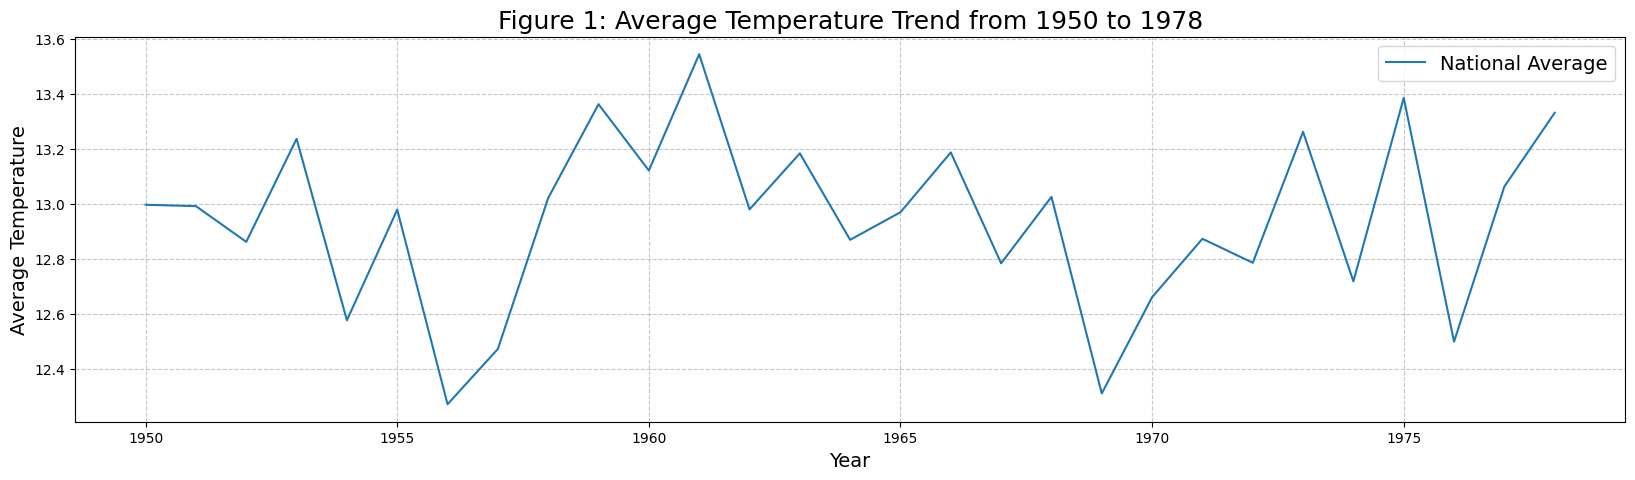

In [19]:
# Plot the graphs
plot_lineplot(grouped_na_1, 'Figure 1: Average Temperature Trend from 1950 to 1978')

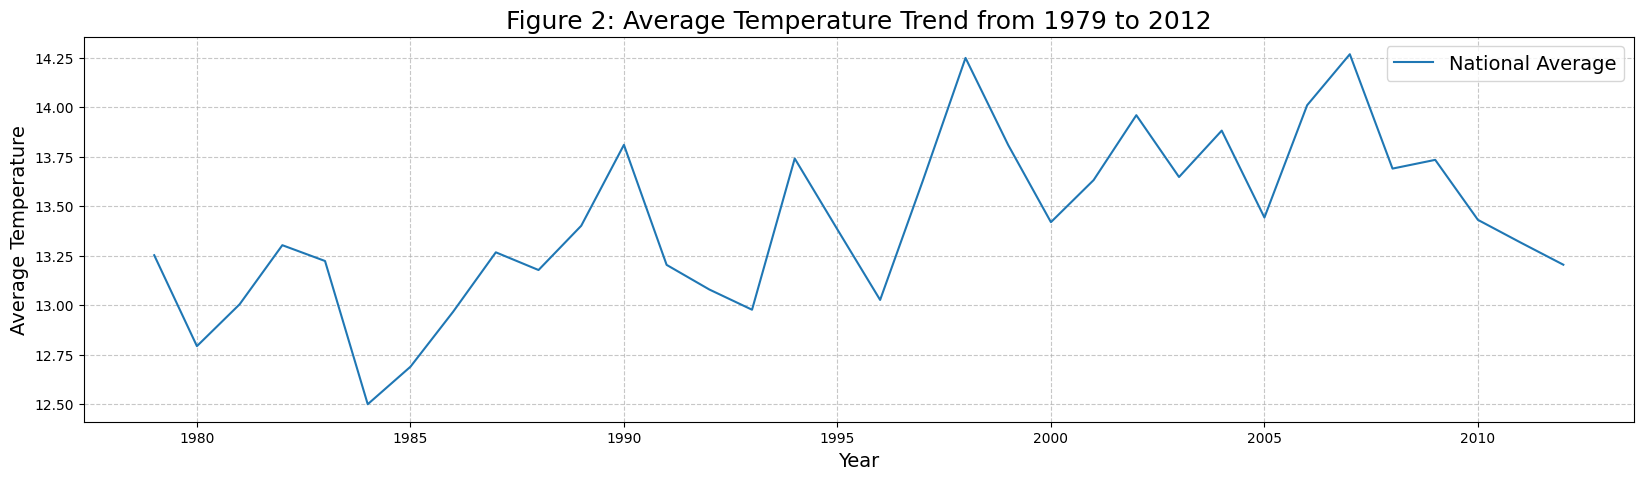

In [20]:
plot_lineplot(grouped_na_2, 'Figure 2: Average Temperature Trend from 1979 to 2012')

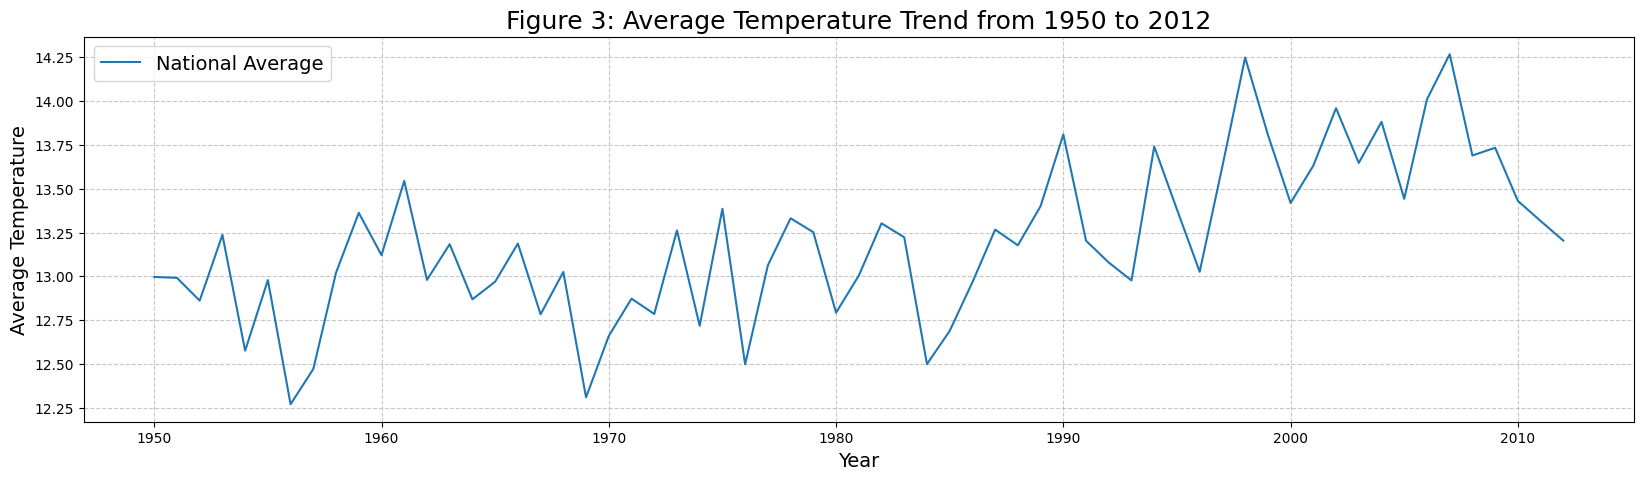

In [21]:
plot_lineplot(grouped_na_3, 'Figure 3: Average Temperature Trend from 1950 to 2012')

### Bar charts
In this section, we will use bar charts to show the top 10 cities with the largest and lowest average temperature percent changes from 1950 to 2012. These charts will provide insights into how different regions in China have been affected by temperature changes over time.

Looking at the bar chart for the top 10 cities with the largest temperature percent changes, we can see that cities such as Yakeshi and Shuangyashan experienced an increase of over 35 percent in annual temperature from 1950 to 2012. In contrast, most other cities experienced an average temperature increase of around 10 percent. These findings indicate that many cities in China are becoming warmer, and some regions are experiencing more significant temperature changes than others.

The bar chart for the top 10 cities with the lowest temperature percent changes reveals that cities such as Dunhua and Yanji experienced the lowest percentage change in temperature, but only up to around -4.5%. This suggests that some regions in China may not have experienced significant temperature changes or may have even experienced a decrease in temperature.

Overall, these bar charts highlight the different temperature trends observed in various regions of China from 1950 to 2012. They provide further evidence that urbanization and economic development have led to an increase in temperature in many cities in China.

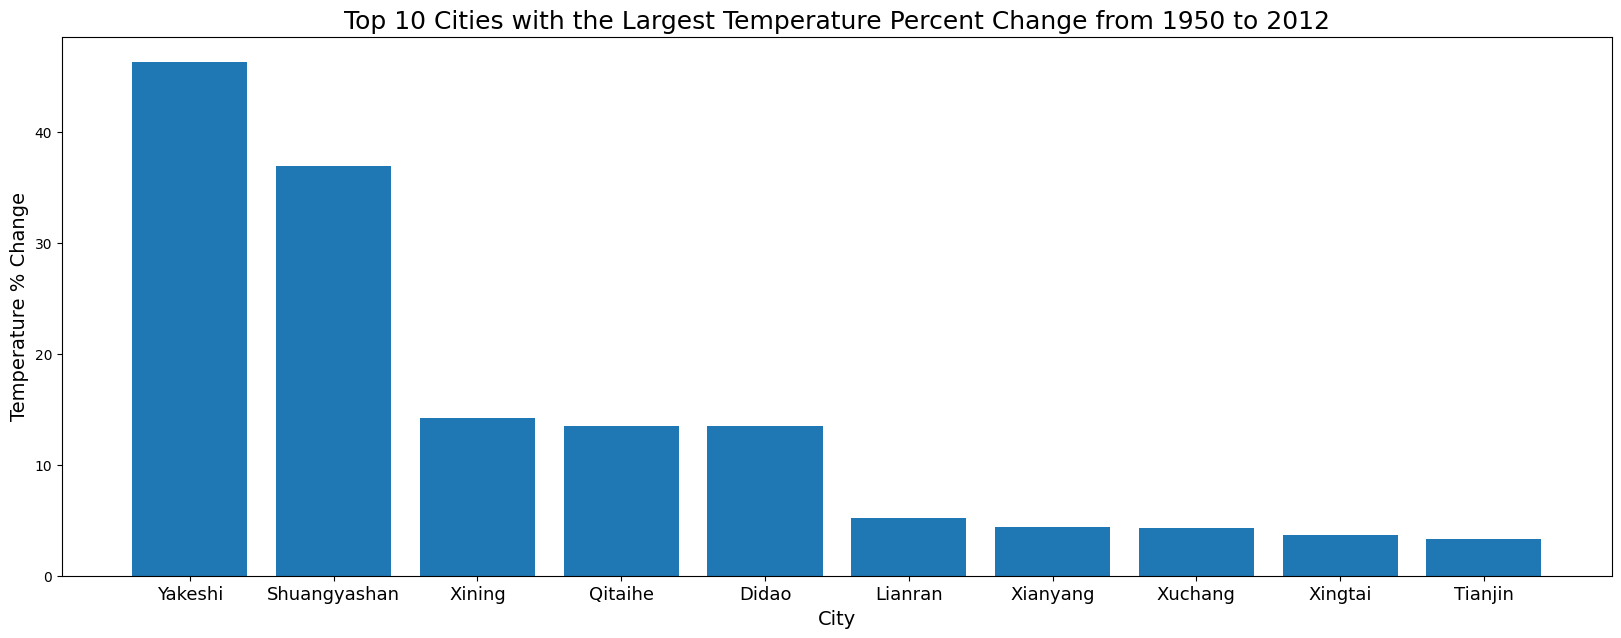

In [22]:
# Plot the graph of largest temperature change between 1950 to 2012
plt.figure(figsize=(20, 7))
plt.bar(top_cities_1950['City'], top_cities_1950['TemperaturePctChange'])
plt.xlabel('City', fontsize=14)
plt.ylabel('Temperature % Change', fontsize=14)
plt.title('Top 10 Cities with the Largest Temperature Percent Change from 1950 to 2012', fontsize=18)
plt.tick_params(axis='x', labelsize=13)
plt.show()

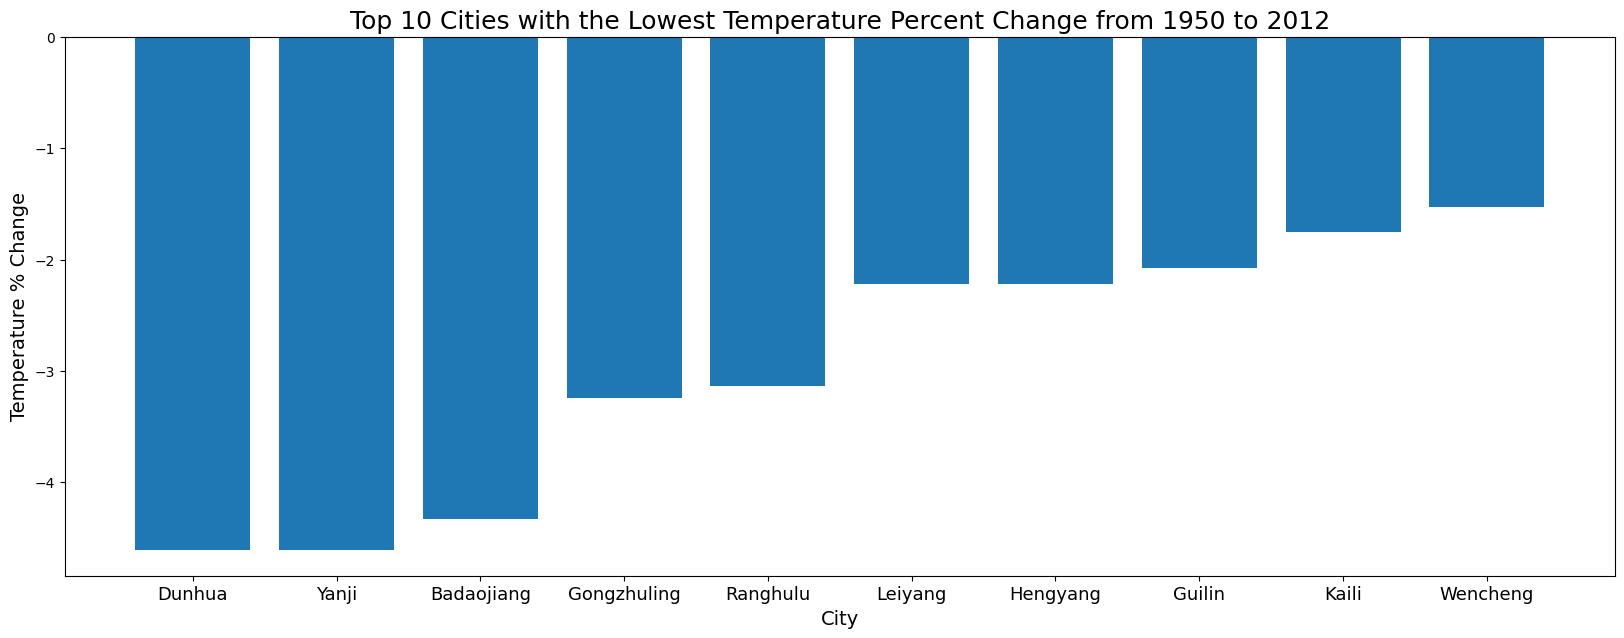

In [23]:
# Plot the graph of lowest temperature change between 1950 to 2012
plt.figure(figsize=(20, 7))
plt.bar(low_cities_1950['City'], low_cities_1950['TemperaturePctChange'])
plt.xlabel('City', fontsize=14)
plt.ylabel('Temperature % Change', fontsize=14)
plt.title('Top 10 Cities with the Lowest Temperature Percent Change from 1950 to 2012', fontsize=18)
plt.tick_params(axis='x', labelsize=13)
plt.show()

The graphs below illustrate the trend of the number of cities with annual temperatures exceeding 23 degrees and below 0 degrees, over a 5-year interval from 1950 to 2010.

The first graph indicates an upward trend, which suggests that the number of cities with an annual temperature of 23 degrees or higher has increased steadily over time. This trend is particularly prominent after 1980, coinciding with China's urbanization and economic growth. The graph provides further evidence that rapid urbanization has contributed to the accelerated increase in temperature.

The second graph shows a decreasing trend, which implies that fewer cities have an annual temperature of 0 degrees or lower. This suggests that all cities in China are experiencing warming temperatures, rather than cooling. Once again, the graph highlights the impact of urbanization and economic growth on temperature changes in China, as cities become increasingly hotter.

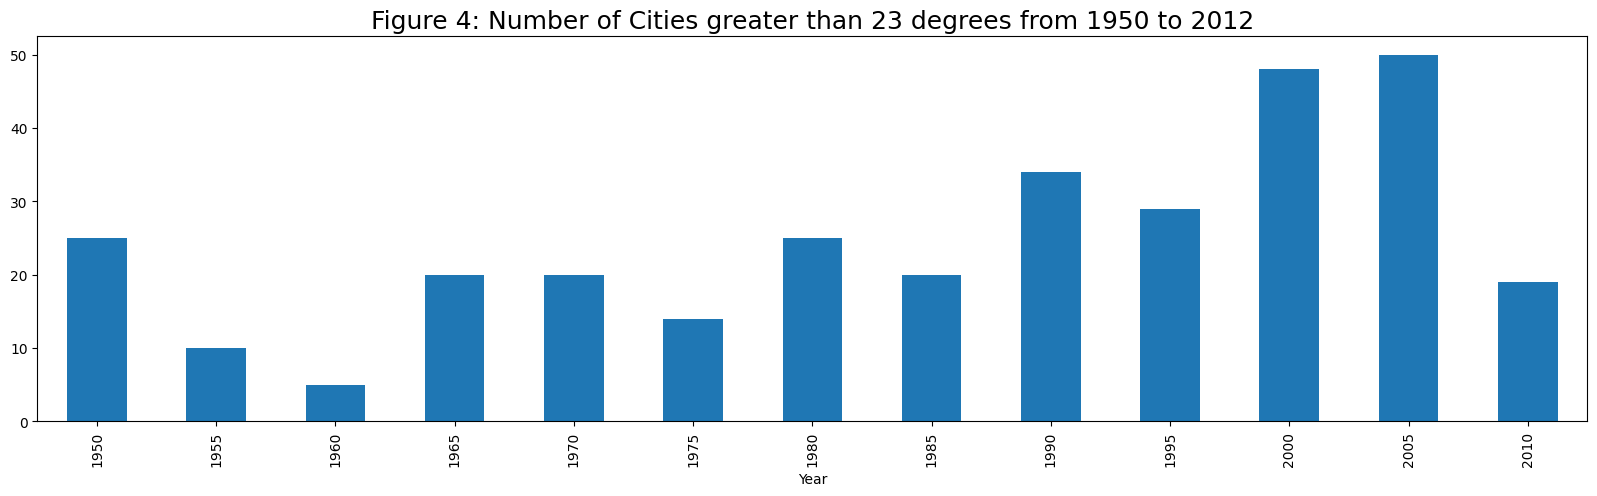

In [24]:
# Count the number of cities that is greater than 23 degrees
filt_temp = city_pivot[city_pivot > 23]
filt_count = filt_temp.count(axis=1)
grouped_count = filt_count.groupby(lambda x: x // 5 * 5).sum()
plt.figure(figsize=(20,5))
grouped_count.plot(kind='bar')
plt.title('Figure 4: Number of Cities greater than 23 degrees from 1950 to 2012', fontsize=18)

plt.show()

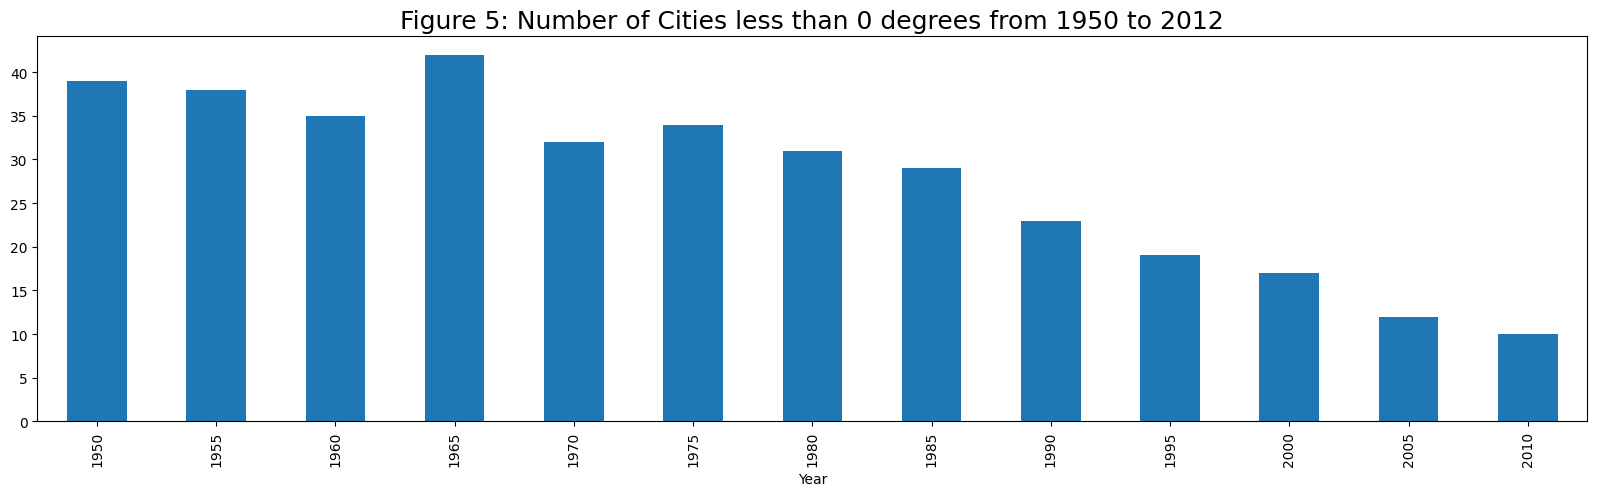

In [25]:
# Count the number of cities that is lower than 0 degrees
filt_temp = city_pivot[city_pivot < 0]
filt_count = filt_temp.count(axis=1)
grouped_count = filt_count.groupby(lambda x: x // 5 * 5).sum()
plt.figure(figsize=(20,5))
grouped_count.plot(kind='bar')
plt.title('Figure 5: Number of Cities less than 0 degrees from 1950 to 2012', fontsize=18)

plt.show()

### Scatter Plots
We now focus on examining the cities with the largest percentage change in average temperature. The following four graphs display the top four cities with the highest percentage change in average temperature. We observe a strong positive relationship between time and annual temperature change for each of these cities. This is consistent with the overall trend in China, where the average annual temperature has been increasing from 1950 to 2012. However, these graphs provide a more detailed picture of how the annual temperature has changed over time for each of these representative cities.

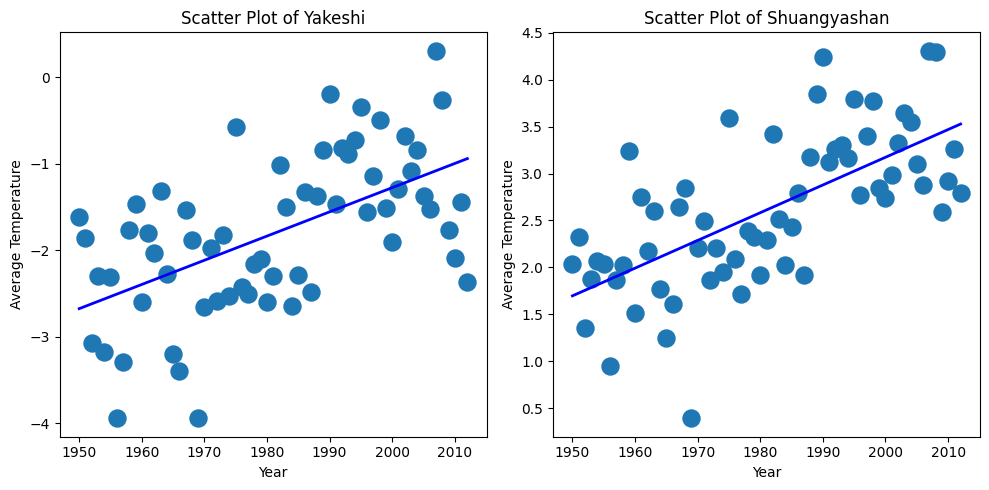

In [26]:
dff = city_pivot.reset_index()

# Define a function to plot scatter plots with a line of best fit
def plot_scatter(city, title, ax):
    x = dff['Year']
    y = dff[city]
    m, b = np.polyfit(x, y, 1) # Calculate the slope and intercept of the line of best fit
    dff.plot(x='Year', y=city, kind='scatter', s=150, ax=ax)
    ax.plot(x, m*x + b, color='blue', linewidth=2) # Add the line of best fit to the plot
    ax.set_title(title)
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Temperature')

# Call the modified function to plot the scatter plots with lines of best fit
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_scatter('Yakeshi', 'Scatter Plot of Yakeshi', ax[0])
plot_scatter('Shuangyashan', 'Scatter Plot of Shuangyashan', ax[1])

plt.tight_layout()

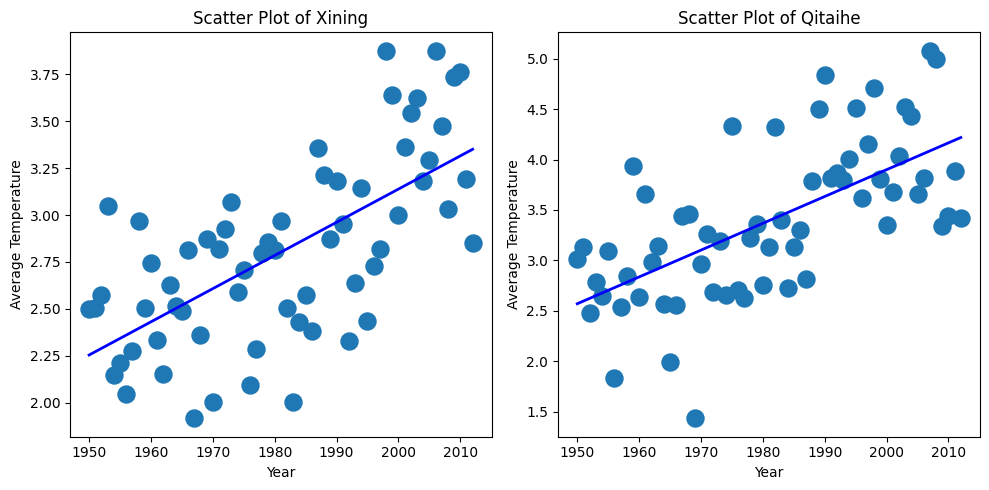

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_scatter('Xining', 'Scatter Plot of Xining', ax[0])
plot_scatter('Qitaihe', 'Scatter Plot of Qitaihe', ax[1])
plt.tight_layout()

### Histogram
We presented a histogram displaying the percentage change in annual temperature from 1950 to 2012 across multiple cities. Our analysis indicates that the majority of cities experienced a positive temperature change, with most cities having a percentage change of around 18.5. The overall shape of the histogram closely approximates a normal distribution.

Interestingly, we found that from 1950 to 1978, when economic development in China was slow and most areas were rural, most cities had an annual percentage change in temperature of 18.1. However, from 1979 to 2012, during a period of rapid economic development and urbanization, most cities had an annual percentage change in temperature ranging from 18.25 to 19.00. This indicates that temperatures have increased in China over the past few decades, with evidence pointing to urbanization as a significant factor in this trend.

While urbanization has brought benefits to humanity in terms of improved living standards and quality of life, it has also led to global warming. The observed increase in temperatures highlights the cost of urbanization and emphasizes the importance of implementing sustainable urban development strategies that mitigate the impact of global warming.

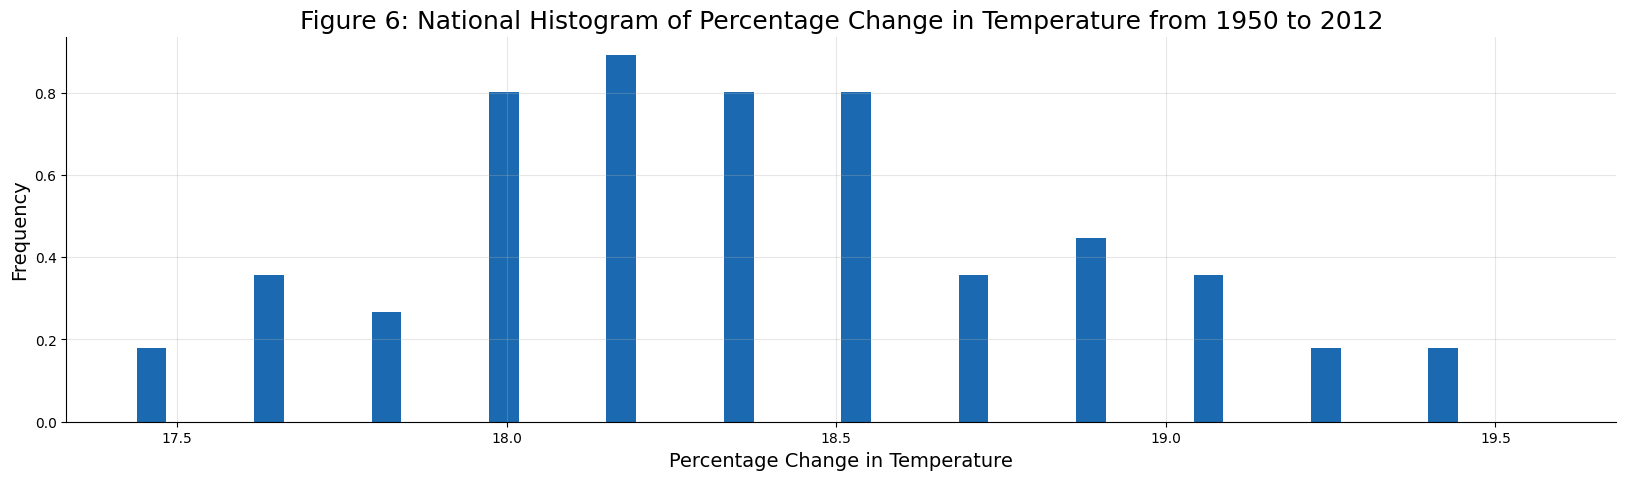

In [28]:
fig, ax = plt.subplots(figsize=(20, 5))

mean_pivot.plot(
    kind="hist", y="mean_temp_change", color="#1a69b1",
    bins=12, legend=False, density=True, ax=ax,
    width=0.045 # Set the width of the bars to 0.045
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Percentage Change in Temperature", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_title("Figure 6: National Histogram of Percentage Change in Temperature from 1950 to 2012", fontsize=18)
ax.grid(True, alpha=0.3)

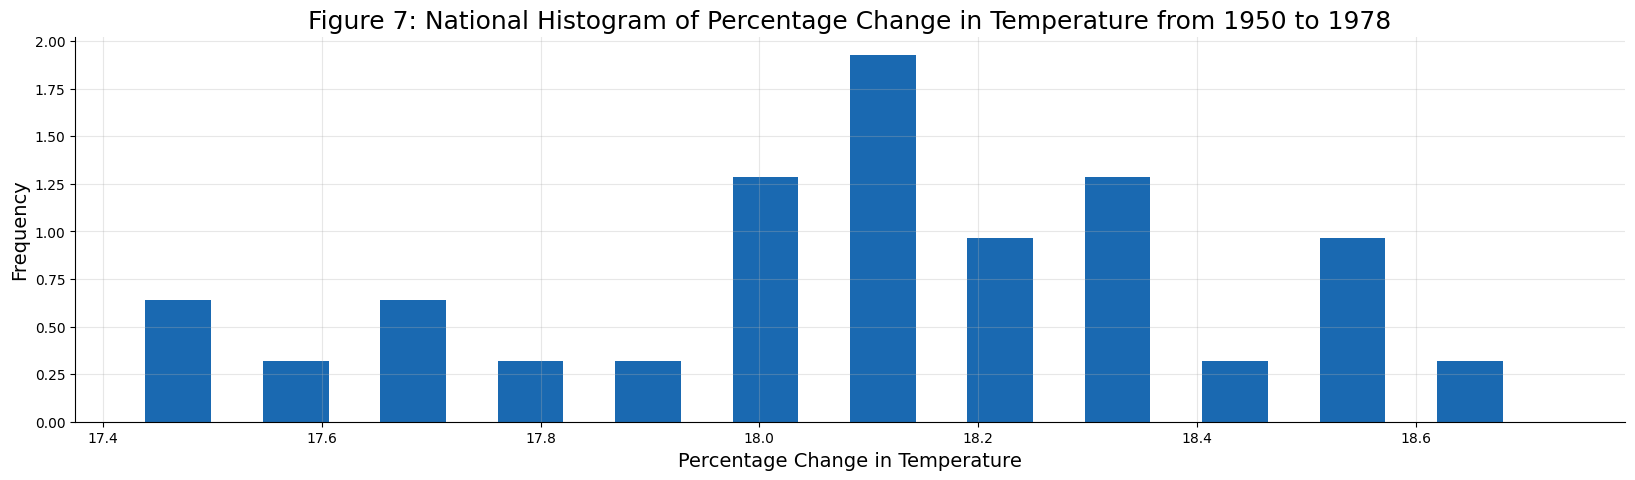

In [29]:
fig, ax = plt.subplots(figsize=(20, 5))

mean_pivot_before.plot(
    kind="hist", y="mean_temp_change", color="#1a69b1",
    bins=12, legend=False, density=True, ax=ax,
    width=0.06 # Set the width of the bars to 0.06
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Percentage Change in Temperature", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_title("Figure 7: National Histogram of Percentage Change in Temperature from 1950 to 1978", fontsize=18)
ax.grid(True, alpha=0.3)

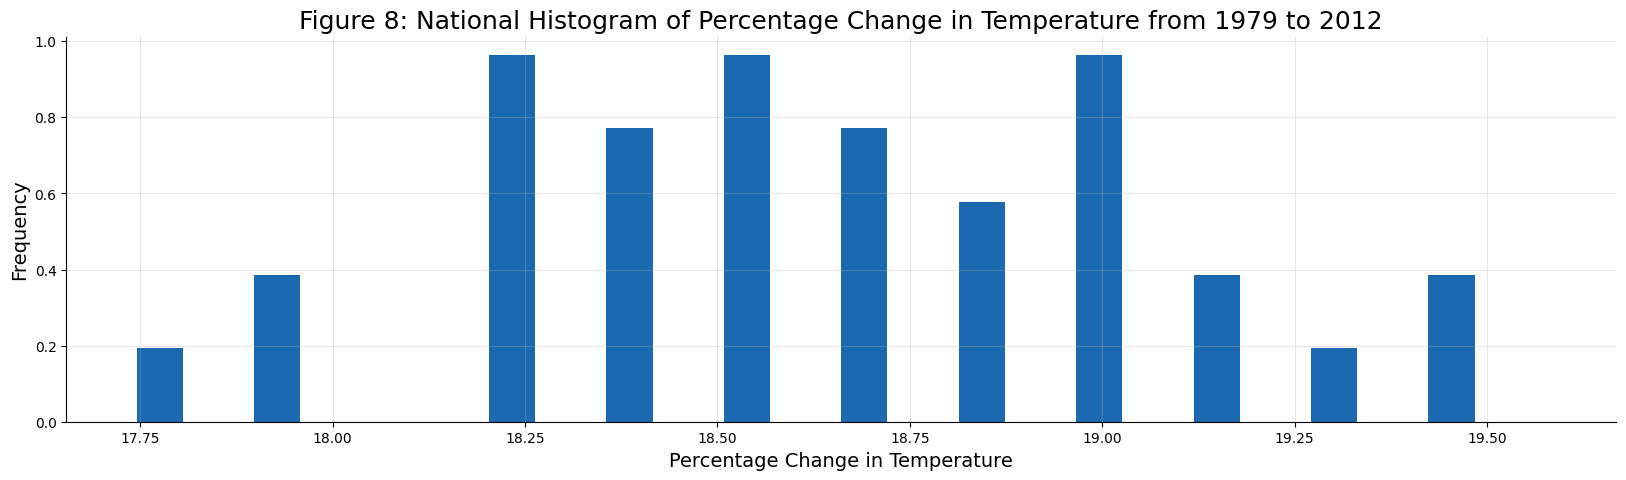

In [30]:
fig, ax = plt.subplots(figsize=(20, 5))

mean_pivot_after.plot(
    kind="hist", y="mean_temp_change", color="#1a69b1",
    bins=12, legend=False, density=True, ax=ax,
    width=0.06 # Set the width of the bars to 0.06
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Percentage Change in Temperature", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_title("Figure 8: National Histogram of Percentage Change in Temperature from 1979 to 2012", fontsize=18)
ax.grid(True, alpha=0.3)

# Project Two

## The Message
Our intent in this project is to study the relationship between urbanization and climate change. In our previous project, we created line plots, bar charts, scatter plots, and histograms for China's average temperature data from 1950 to 2012. We found a correlation between urbanization and temperature increase. Building on our previous findings, we plan to incorporate a new dataset that includes China's population data. This additional data will help us further investigate the urbanization trend in China, as population growth is a significant driver of urbanization. In addition, we will use maps to visualize the temperature change across China by provinces and cities, providing a more solid understanding of the regional differences in climate change impacts. To enhance our analysis, we will also merge a new dataset that records China's GDP from 1950 to 2012. By creating maps to visualize the economic development across China by provinces and cities, we can gain insights into how GDP growth relates to the urbanization process. This visualization will be a valuable addition to our project, as GDP growth is an important indicator of urbanization.

Unfortunately, our analysis is hindered by missing data for both urban and rural population in China from 1950 to 1959. Simply using a linear regression between years after 1959 and urban or rural population will not work, as it will overpredict the population for 1950 to 1959. An alternative approach would be to use a time series prediction model like the exponential smoothing model. However, applying this model requires a deep understanding and strong application skills that I have not yet acquired.

Therefore, we propose a simpler solution: to use the data of urban and rural population percentage of the total population for 1960 to fill in the missing values from 1950 to 1959. Since the variation in urban and rural population during this time is negligible, we can ignore the changes in population given the broader time range from 1950 to 2012. Furthermore, this period of time (1950-1978) is characterized by slow economic growth and urbanization in China, making it a suitable candidate for this approach. By filling in the missing values with the data from 1960, we can continue our analysis and explore the relationship between urbanization and temperature increase in China. Overall, this project aims to deepen our understanding of the complex relationship between urbanization, climate change, and economic development in China.

### Data cleaning

In [31]:
# Read the dataset and set index as year
popu = pd.read_csv('/Users/booker/Desktop/ECO225Project/Data/China population.csv', index_col='Year')

# Replace the commas in the Urban Population and Rural Population columns
popu['Urban Population'] = popu['Urban Population'].str.replace(',', '')
popu['Rural Population'] = popu['Rural Population'].str.replace(',', '')
popu['Population'] = popu['Population'].str.replace(',', '')

# Replace 'Null' with NaN
popu = popu.replace('Null', np.nan)
popu.fillna(method='ffill', inplace=True)

In [32]:
# Replace NaN using percentage of the total population for 1960
for year in range(1950, 1960):
    popu.loc[year, 'Urban Population'] = int(popu.loc[year, 'Population']) * 0.16
    popu.loc[year, 'Rural Population'] = int(popu.loc[year, 'Population']) * 0.74
    popu.loc[year, 'Urban Population % of Total Population'] = 16.0
    popu.loc[year, 'Rural Population % of Total Population'] = 74.0
    
# Reset index for merge
popu.reset_index(inplace=True)

In [33]:
# Filter grouped_na to only include years from 1950 to 1978
popu_1 = popu[(popu['Year'] >= 1950) & (popu['Year'] <= 1978)]
merged_data_1 = pd.merge(grouped_na_1, popu_1[['Year', 'Urban Population', 'Urban Population % of Total Population', 'Rural Population', 'Rural Population % of Total Population']], on='Year', how='left')

# Filter grouped_na to only include years from 1979 to 2012
popu_2 = popu[(popu['Year'] >= 1979) & (popu['Year'] <= 2012)]
merged_data_2 = pd.merge(grouped_na_2, popu_2[['Year', 'Urban Population', 'Urban Population % of Total Population', 'Rural Population', 'Rural Population % of Total Population']], on='Year', how='left')

# Filter grouped_na to only include years from 1950 to 2012
popu_3 = popu[(popu['Year'] >= 1950) & (popu['Year'] <= 2012)]
merged_data_3 = pd.merge(grouped_na_3, popu_3[['Year', 'Urban Population', 'Urban Population % of Total Population', 'Rural Population', 'Rural Population % of Total Population']], on='Year', how='left')

In [34]:
# Convert the data to float type
merged_data_1['Urban Population'] = merged_data_1['Urban Population'].astype(float)
merged_data_1['Rural Population'] = merged_data_1['Rural Population'].astype(float)
merged_data_2['Urban Population'] = merged_data_2['Urban Population'].astype(float)
merged_data_2['Rural Population'] = merged_data_2['Rural Population'].astype(float)
merged_data_3['Urban Population'] = merged_data_3['Urban Population'].astype(float)
merged_data_3['Rural Population'] = merged_data_3['Rural Population'].astype(float)
merged_data_3['Urban Population % of Total Population'] = merged_data_3['Urban Population % of Total Population'].astype(float)
merged_data_3['Rural Population % of Total Population'] = merged_data_3['Rural Population % of Total Population'].astype(float)

In [35]:
# Create a new column for decade in order to plot bar plots
merged_data_3['Decade'] = pd.cut(merged_data_3['Year'], bins=[1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], 
                                 labels=['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s'])
grouped_data = merged_data_3.groupby('Decade').mean()[['Urban Population % of Total Population', 'Rural Population % of Total Population']]

# Filter the data to only include urban and rural population columns in order to plot line plot
merged_data_3_ur = merged_data_3[['Year', 'Urban Population', 'Rural Population']]
merged_data_3_ur.set_index('Year', inplace=True)

### Bar Plot and Line Plot
The graphs below show the percentage of the total population that lives in urban and rural areas over time in China from 1950 to 2012. These graphs provides valuable insights into the changing demographic patterns in China and the shift of population from rural to urban areas.

We have observed that the percentage of people living in the urban area is increasing over time, while the percentage of people living in the rural area is decreasing over time. This trend is consistent with China's rapid urbanization, which has been driven by economic development and rural-urban migration. 

The graphs reveal that during the period of 1950 to 1980, there was little change in the percentage of people living in urban areas, and even a slight increase in the percentage of people living in rural areas. This period coincides with the Chairman Mao Zedong era, characterized by slow economic and social development. In contrast, the percentage of people living in urban areas has increased significantly since the 1980s, with a corresponding drop in the percentage of people living in rural areas. This period is marked by the Chairman Deng Xiaoping era, characterized by high-speed industrialization and social development. In recent years, China has experienced significant economic growth, which has led to the rapid expansion of cities and the migration of rural residents to urban areas in search of better job opportunities and higher living standards.

In conclusion, the bar plot and line plot provide valuable insights into the changing demographic patterns in China and give us some insights of how this could relate to the change in temperature in China. Therefore, this shift in population patterns is a important factor to consider when exploring the relationship between climate change and human activities, as urbanization and industrialization contribute significantly to greenhouse gas emissions, leading to climate change.

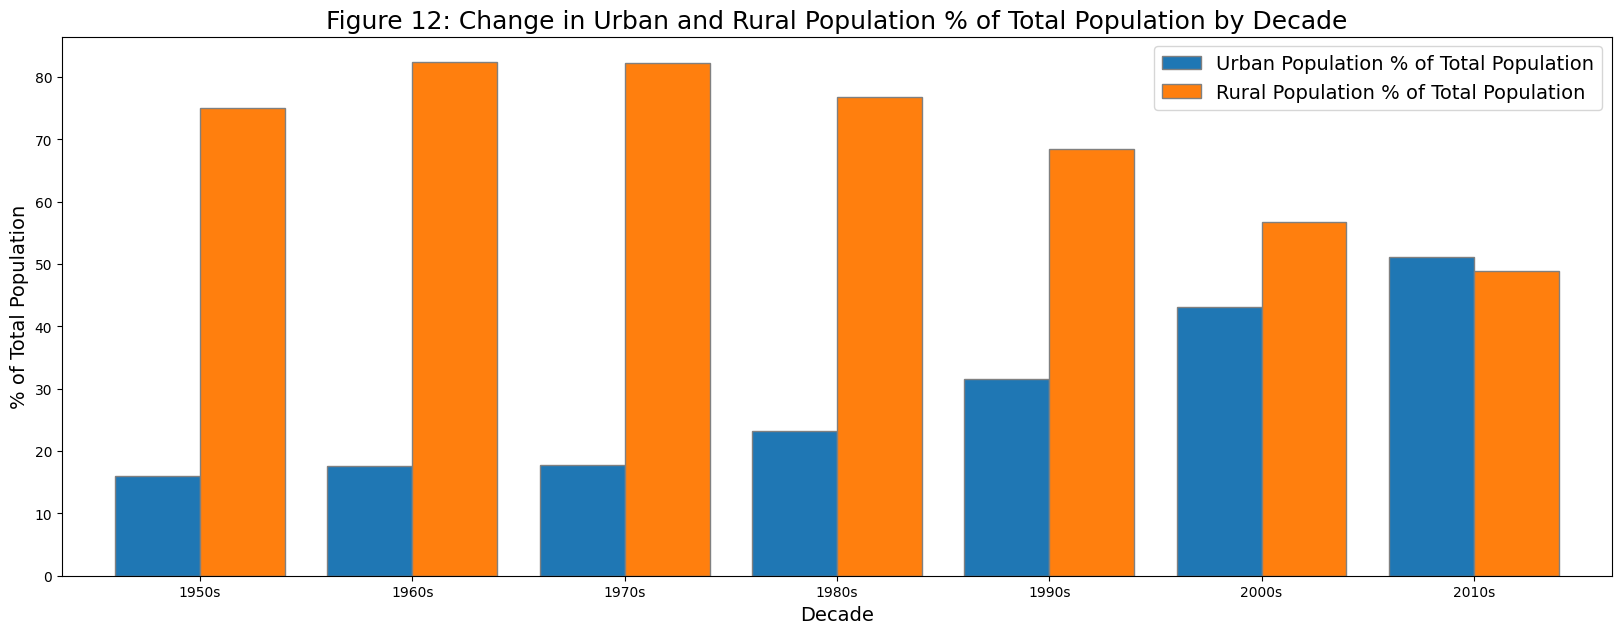

In [36]:
# Create a bar plot
ax = grouped_data.plot(kind='bar', figsize=(20, 7), width=0.8, edgecolor='grey')
ax.set_title('Figure 12: Change in Urban and Rural Population % of Total Population by Decade', fontsize=18)
ax.set_xlabel('Decade', fontsize=14)
ax.set_ylabel('% of Total Population', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(['Urban Population % of Total Population', 'Rural Population % of Total Population'], fontsize=14)

plt.show()

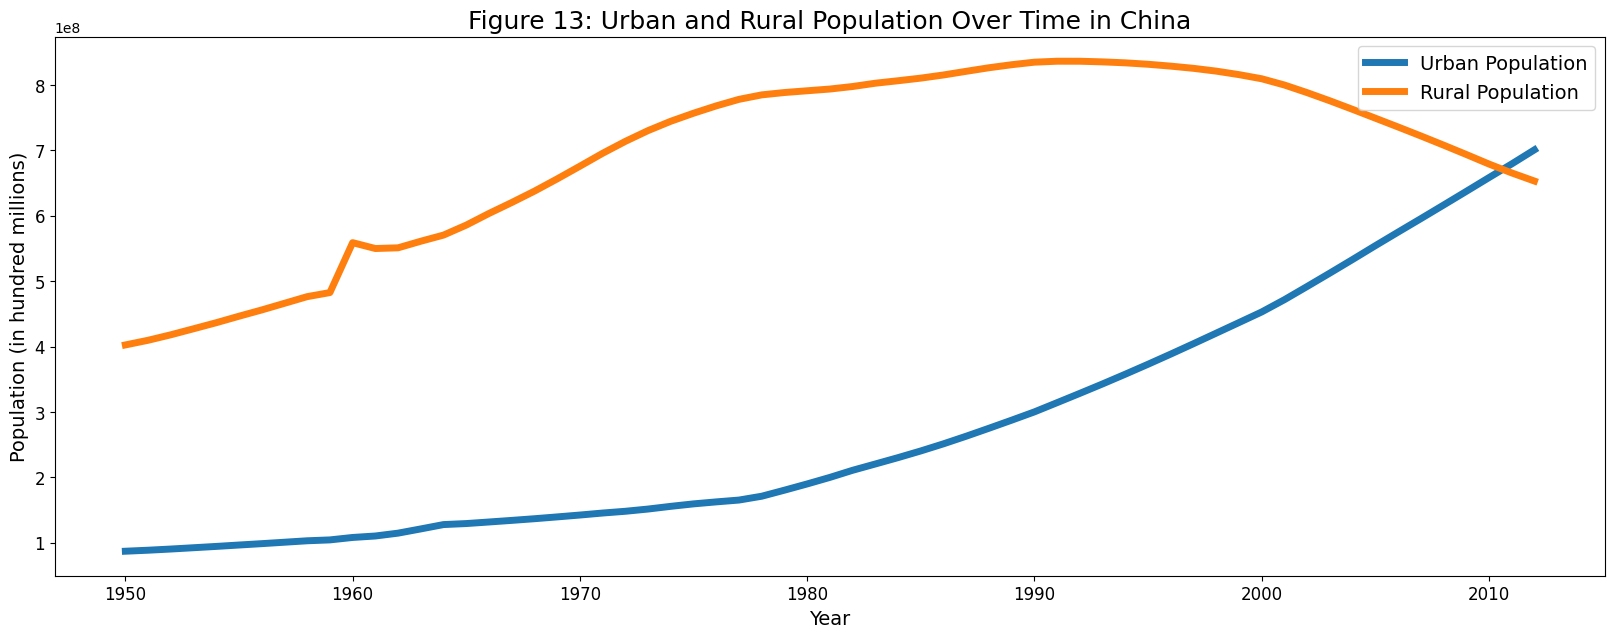

In [37]:
# Create a line plot
ax = merged_data_3_ur.plot(kind='line', figsize=(20,7), linewidth=5, fontsize=12)
ax.set_title('Figure 13: Urban and Rural Population Over Time in China', fontsize=18)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Population (in hundred millions)', fontsize=14)
ax.legend(['Urban Population', 'Rural Population'], fontsize=14)

plt.show()

### Scatter Plots

The scatter plots reveal a significant change in the relationship between urban population and average temperature in China from 1950 to 2012. The first scatter plot (1950-1978) shows no correlation between urban population and average temperature, indicating that during this time when urbanization was slow, the average annual temperature remained relatively stable.

Conversely, the second scatter plot (1978-2012) shows a positive correlation between urban population and average temperature, suggesting that as urbanization accelerated, the average temperature also increased.

Furthermore, analyzing the last two graphs, we observe a positive correlation between urban population and average temperature, as well as a positive relationship between the percentage of the total population residing in urban areas and average temperature in China over the entire period. This means that as the urban population and urbanization increases, the average temperature also tends to increase. This correlation implies that the rising population may affect energy use and fossil fuel consumption, potentially driving climate change. We will explore the relationship between energy use and climate change in project three. This answers the research question in general and suggests that urbanization plays a important role in shaping China as a warming country.

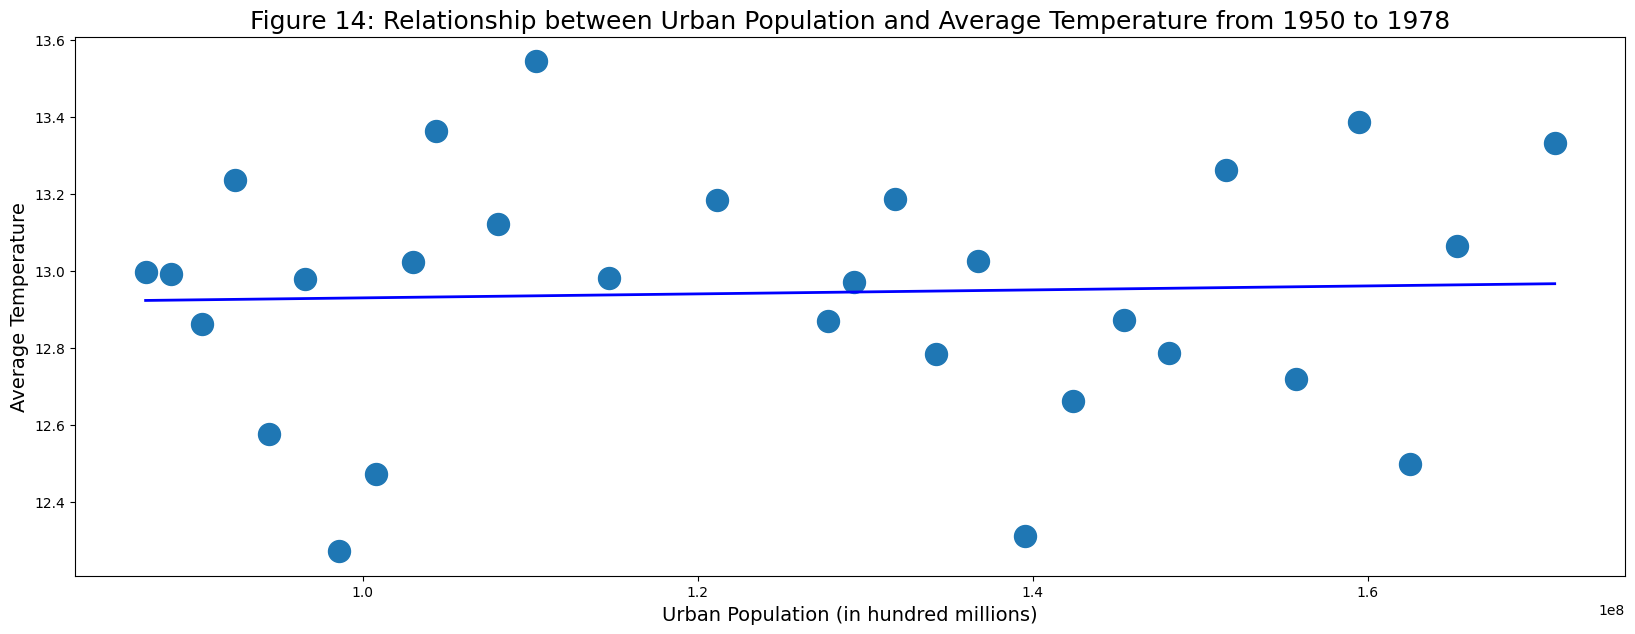

In [38]:
plt.figure(figsize=(20, 7))
plt.scatter(merged_data_1['Urban Population'], merged_data_1['AverageTemperature'], s=250)
plt.xlabel('Urban Population (in hundred millions)', fontsize=14)
plt.ylabel('Average Temperature', fontsize=14)
plt.title('Figure 14: Relationship between Urban Population and Average Temperature from 1950 to 1978', fontsize=18)

# Line of best fit
x = merged_data_1['Urban Population']
y = merged_data_1['AverageTemperature']
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x+intercept, linewidth=2, color='b')

plt.show()

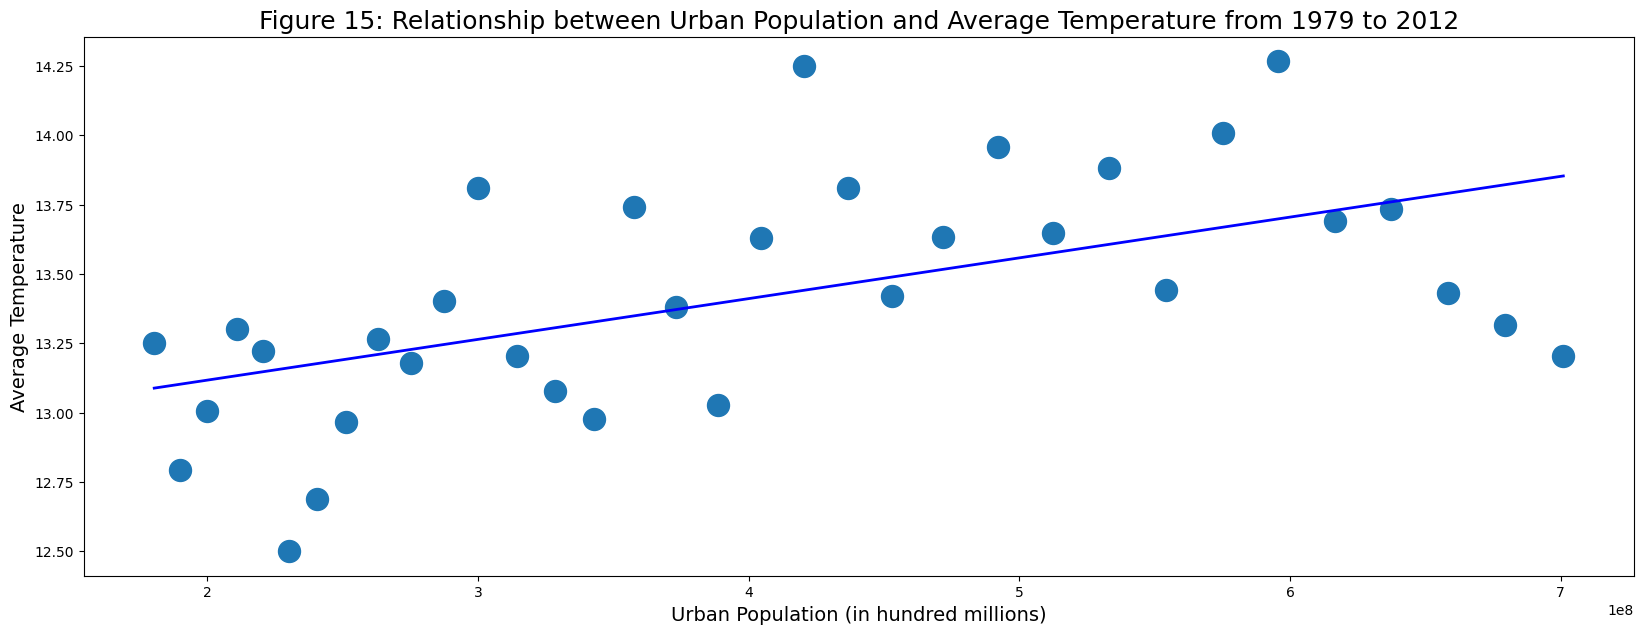

In [39]:
# Scatter plot
plt.figure(figsize=(20, 7))
plt.scatter(merged_data_2['Urban Population'], merged_data_2['AverageTemperature'], s=250)
plt.xlabel('Urban Population (in hundred millions)', fontsize=14)
plt.ylabel('Average Temperature', fontsize=14)
plt.title('Figure 15: Relationship between Urban Population and Average Temperature from 1979 to 2012', fontsize=18)

# Line of best fit
x = merged_data_2['Urban Population']
y = merged_data_2['AverageTemperature']
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x+intercept, linewidth=2, color='b')

plt.show()

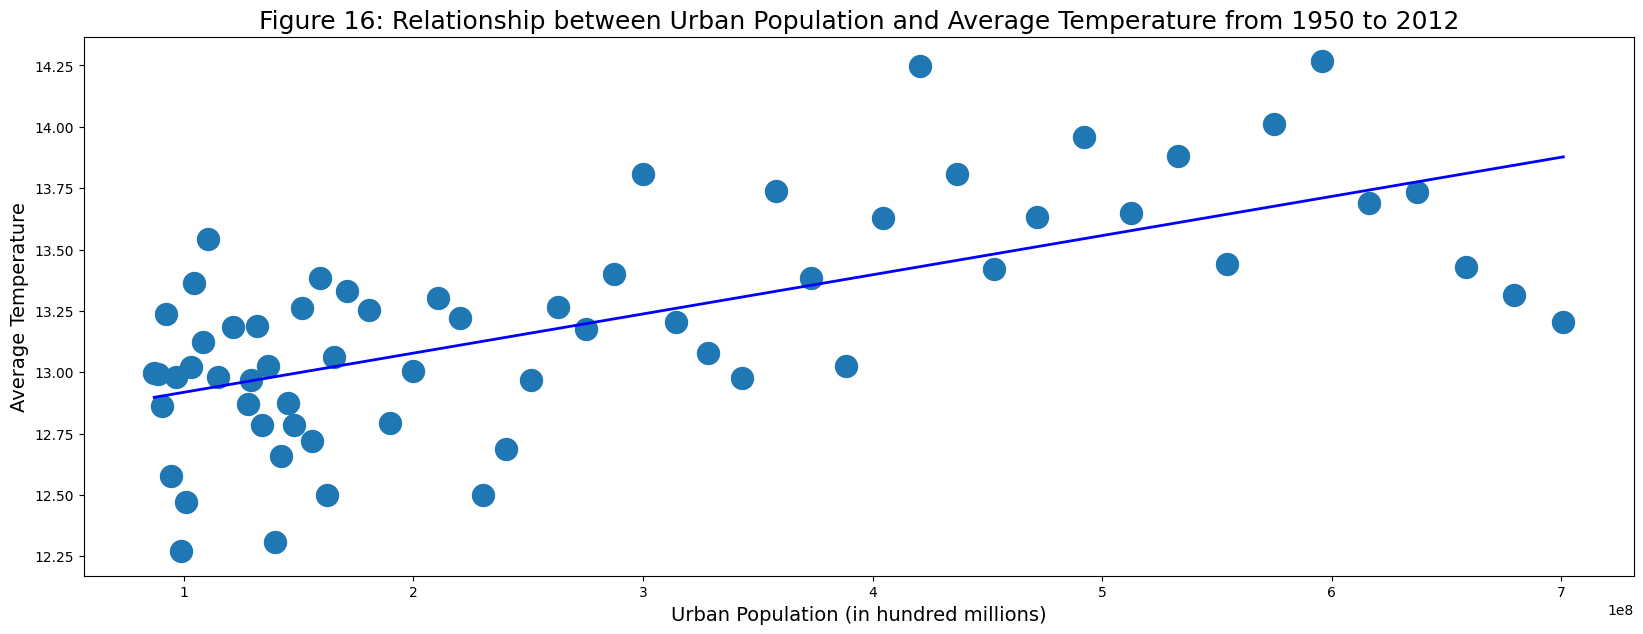

In [40]:
plt.figure(figsize=(20, 7))
plt.scatter(merged_data_3['Urban Population'], merged_data_3['AverageTemperature'], s=250)
plt.xlabel('Urban Population (in hundred millions)', fontsize=14)
plt.ylabel('Average Temperature', fontsize=14)
plt.title('Figure 16: Relationship between Urban Population and Average Temperature from 1950 to 2012', fontsize=18)

# Line of best fit
x = merged_data_3['Urban Population']
y = merged_data_3['AverageTemperature']
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x+intercept, linewidth=2, color='b')

plt.show()

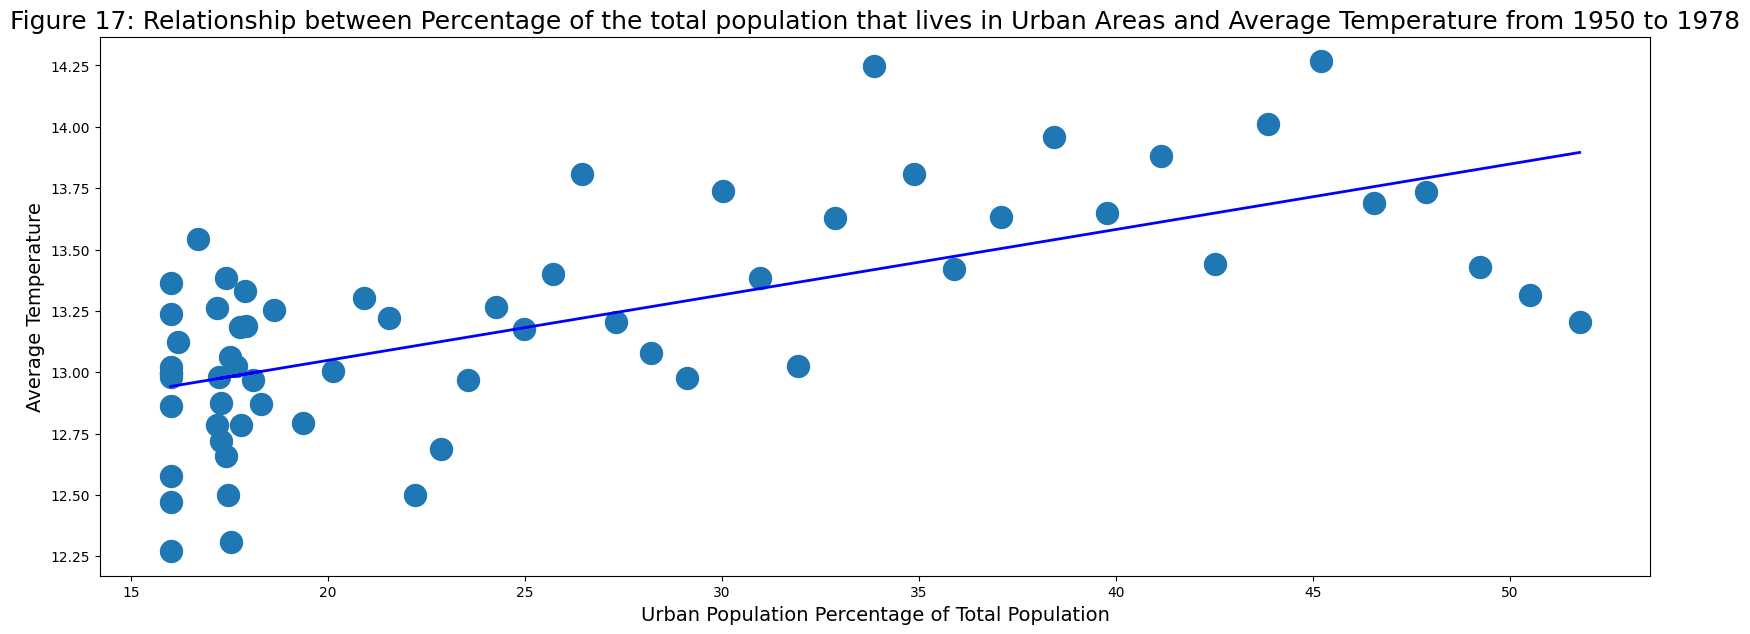

In [41]:
plt.figure(figsize=(20, 7))
plt.scatter(merged_data_3['Urban Population % of Total Population'], merged_data_3['AverageTemperature'], s=250)
plt.xlabel('Urban Population Percentage of Total Population', fontsize=14)
plt.ylabel('Average Temperature', fontsize=14)
plt.title('Figure 17: Relationship between Percentage of the total population that lives in Urban Areas and Average Temperature from 1950 to 1978', fontsize=18)

# Line of best fit
x = merged_data_3['Urban Population % of Total Population']
y = merged_data_3['AverageTemperature']
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x+intercept, linewidth=2, color='b')

plt.show()

## Maps and Interpretations

### Merging with a New Dataset: China Average Temperature Maps
In this section, we will use different maps to visualize the temperature changes in China over time and demonstrate global warming trends. However, after carefully reviewing and comparing the data, we found that the world average temperature dataset provided by Kaggle, specifically for cities in China, has significant discrepancies with the map data. The outdated city names and the lack of inclusion of many cities in China based on the new Chinese city classification system make the dataset unreliable. To ensure the most accurate representation of the average temperature in China by province, we have decided to use the dataset from the World Bank Group as the first layer of the map. Then, we will use the world average temperature dataset as a second layer to display a more detailed average temperature map of different cities in China.

However, relying solely on average temperature maps in China may not provide a comprehensive answer to our research question regarding the effect of urbanization on average temperature in China. The research question is limited, and the available data for China from 1950 to 2012 is incomplete. To address this limitation, we attempted to map urban population by province in China and use it as a comparison with the heat map of average temperature by province in China. However, we could not find any suitable datasets to serve as indicators of urbanization from 1950 to 2012. Therefore, we choose to combine with the GDP data in the next section as another indicator of urbanization and economic growth. Despite this challenge, by combining the heat map of average temperature in China with previous plots of the relationship between urban population and average temperature, we can still draw strong conclusions.

In [42]:
# Read the data file and do data cleaning
gdf = gpd.read_file('/Users/booker/Desktop/gadm36_CHN_shp')
new_df = pd.read_csv('/Users/booker/Desktop/ECO225Project/Data/tas_timeseries_annual_cru_1901-2021_CHN.csv', skiprows=1)
new_df = new_df.rename(columns={'Unnamed: 0': 'Year'})
new_df = new_df.drop('China', axis=1)
new_df = new_df.set_index('Year')
new_df = new_df.reset_index()
new_df = new_df.melt(id_vars=['Year'], var_name='Province', value_name='AverageTemperature')
new_df = new_df.reset_index(drop=True)

In [43]:
# Data cleaing for map of average temperature in 1950 by provinces and cities
new_df_1950 = new_df[new_df['Year'] == 1950]
grouped_citi_1950 = grouped_citi.reset_index()
grouped_citi_1950 = grouped_citi_1950[grouped_citi_1950['Year'] == 1950]
merged_province_1950 = gdf.merge(new_df_1950, how='left', left_on='NAME_1', right_on='Province')

# Data cleaing for map of average temperature in 2012 by provinces and cities
new_df_2012 = new_df[new_df['Year'] == 2012]
grouped_citi_2012 = grouped_citi.reset_index()
grouped_citi_2012 = grouped_citi_2012[grouped_citi_2012['Year'] == 2012]
merged_province_2012 = gdf.merge(new_df_2012, how='left', left_on='NAME_1', right_on='Province')

From the first two graphs depicting the average temperature of China by provinces and cities in 1950 and 2012, it is difficult to discern any noticeable changes due to the scale used. The difference in temperature from 1950 to 2012 cannot be observed from these maps. But these two graphs still give us some insights of how the temperature differ from south of China with north of China. 


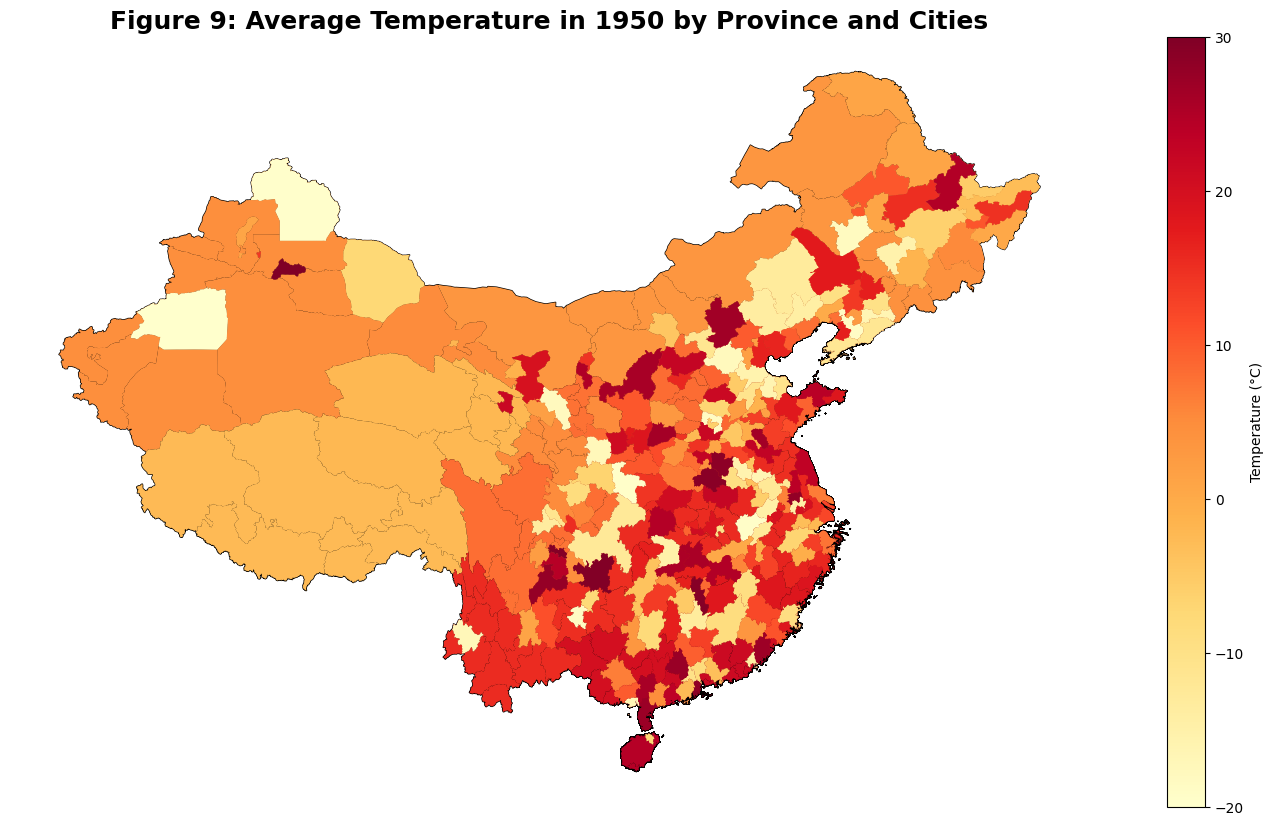

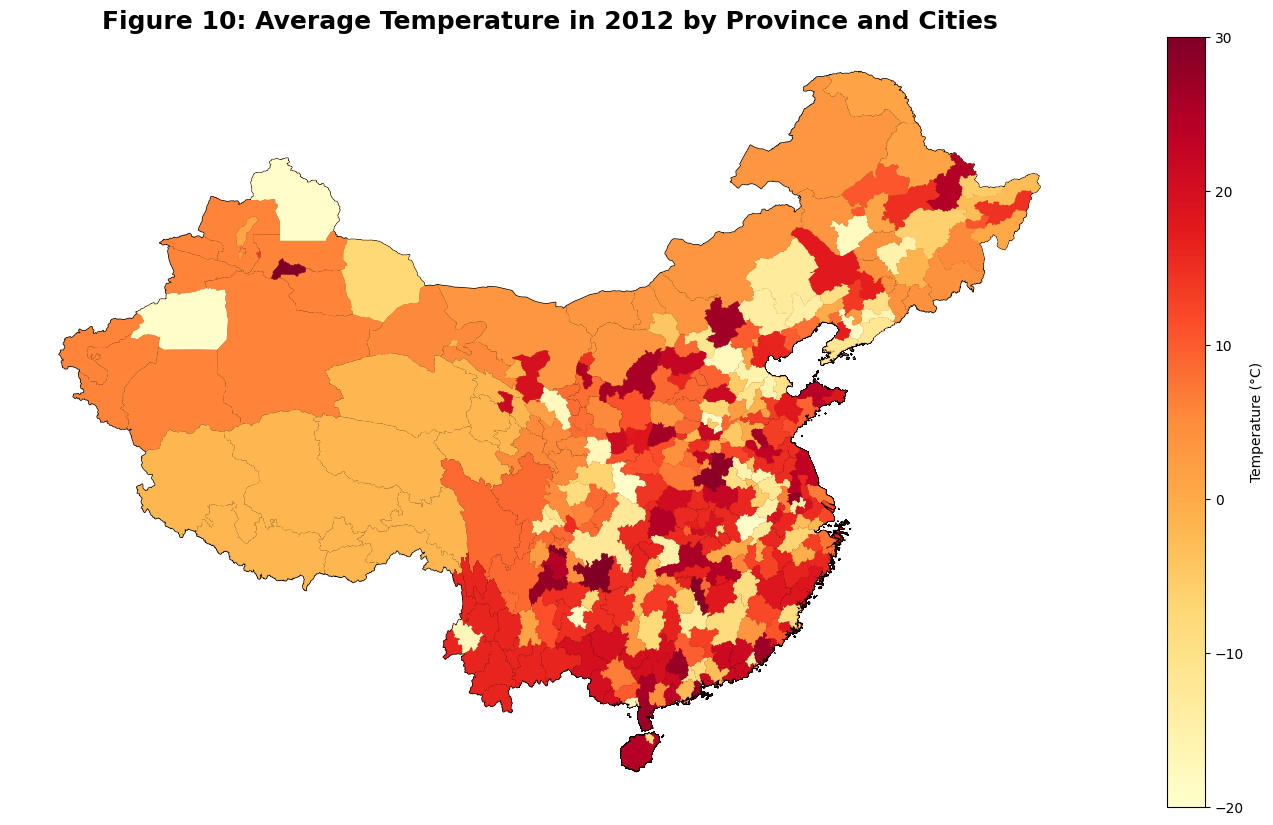

In [44]:
# Create the map with average temperature by provinces
fig, ax = plt.subplots(figsize=(20, 10))
gdf.plot(ax=ax, facecolor='none')
merged_province_1950.plot(column='AverageTemperature', cmap='YlOrRd', legend=True, ax=ax, vmin=-20, vmax=30, legend_kwds={'label': 'Temperature (°C)'})
ax.set_title('Figure 9: Average Temperature in 1950 by Province and Cities', fontsize=18, fontweight='bold')
ax.set_axis_off()

# Merge the two dataframes to get the average temperature by cities
merged_city_1950 = gdf.merge(grouped_citi_1950, how='left', left_on='NAME_2', right_on='City')
merged_city_1950.plot(ax=ax, column='City', markersize=5, cmap='YlOrRd', legend=False)

plt.show()

# Create the map with average temperature by provinces
fig, ax = plt.subplots(figsize=(20, 10))
gdf.plot(ax=ax, facecolor='none')
merged_province_2012.plot(column='AverageTemperature', cmap='YlOrRd', legend=True, ax=ax, vmin=-20, vmax=30, legend_kwds={'label': 'Temperature (°C)'})
ax.set_title('Figure 10: Average Temperature in 2012 by Province and Cities', fontsize=18, fontweight='bold')
ax.set_axis_off()

# Merge the two dataframes to get the average temperature by cities
merged_city_2012 = gdf.merge(grouped_citi_2012, how='left', left_on='NAME_2', right_on='City')
merged_city_2012.plot(ax=ax, column='City', markersize=5, cmap='YlOrRd', legend=False)

plt.show()

The third map titled 'Change in Average Temperature from 1950 to 2012 by Province and Cities' provides a clear and direct visualization of how the average temperature has changed during this time period. We can first see that the overall temperature change is positive, meaning that most of the regions in China is becoming warmer. Additionally, the results are both interesting and intriguing, as they reveal that the south of China, typically known for its warm climate, has experienced a decrease in average temperature. Conversely, the north, known for its colder climate, has seen an increase in average temperature. Xinjiang, in particular, experiences the largest temperature increase as a province in northwest China. This finding was not apparent in the earlier graphs, indicating the importance of this visualization in understanding climate changes in China. Additionally, global warming often leads to more extreme temperature days, which may contribute to the observed temperature differences in the south and north. These findings provide valuable insights into how global warming is impacting different regions of China.

Taken together with the Relationship between Urban Population and Average Temperature plot, we can conclude that the average temperature is increasing with the level of urbanization. This further answers our research question of how urbanization in China changes the average temperature trends in a warming world.

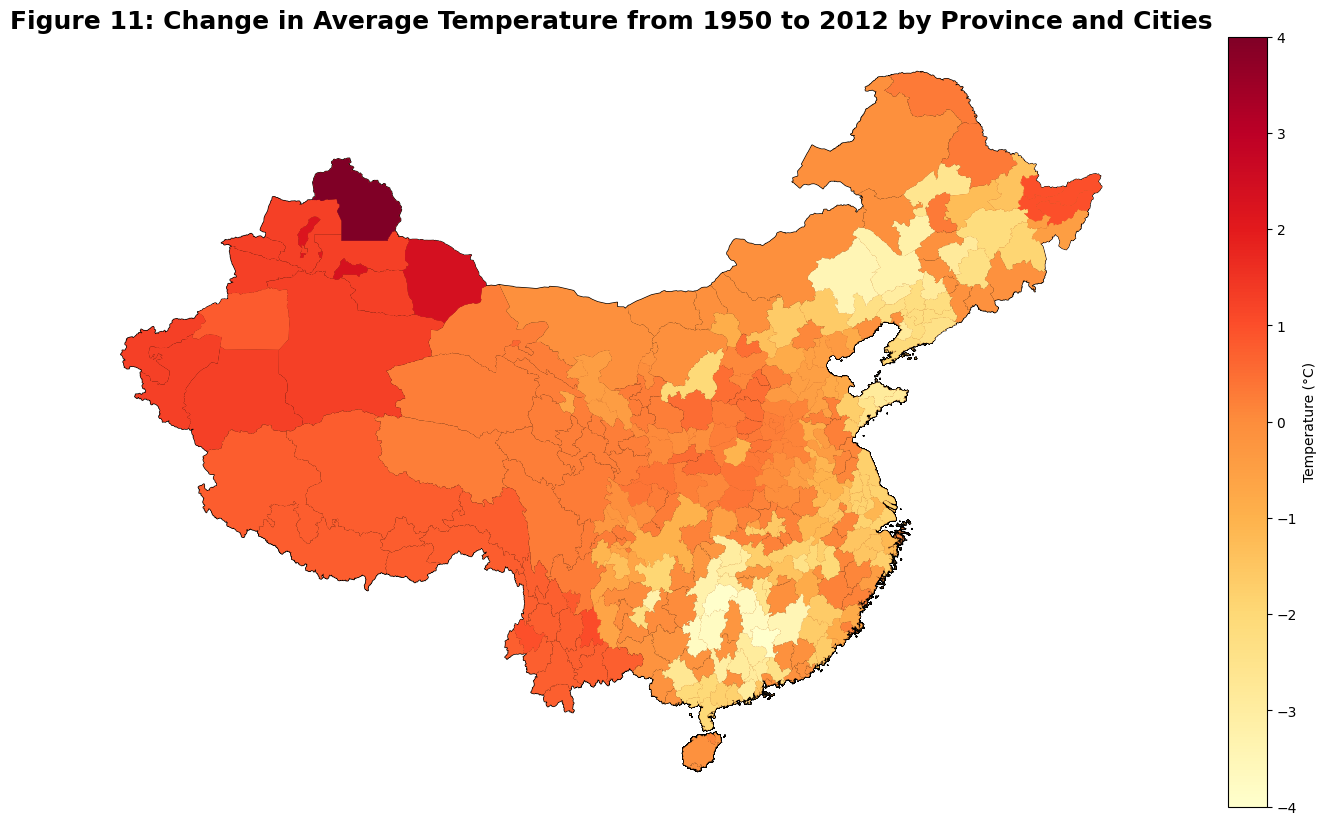

In [45]:
# Calculate the difference between the average temperatures in 2012 and 1950
new_df_diff = new_df[new_df['Year'].isin([1950, 2012])].pivot_table(index='Province', columns='Year', values='AverageTemperature')
new_df_diff['Diff'] = new_df_diff[2012] - new_df_diff[1950]

# Merge the difference dataframe with the geodataframe
merged_pro_diff = gdf.merge(new_df_diff, how='left', left_on='NAME_1', right_on='Province')

# Create the map with average temperature by provinces
fig, ax = plt.subplots(figsize=(20, 10))
gdf.plot(ax=ax, facecolor='none')
merged_pro_diff.plot(column='Diff', cmap='YlOrRd', legend=True, ax=ax, vmin=-4, vmax=4, legend_kwds={'label': 'Temperature (°C)'})
ax.set_title('Figure 11: Change in Average Temperature from 1950 to 2012 by Province and Cities', fontsize=18, fontweight='bold')
ax.set_axis_off()


# Calculate the difference between the average temperatures in 2012 and 1950
grouped_citi_diff = grouped_citi.reset_index()
grouped_citi_diff = grouped_citi_diff[grouped_citi_diff['Year'].isin([1950, 2012])].pivot_table(index='City', columns='Year', values='AverageTemperature')
grouped_citi_diff['Diff'] = grouped_citi_diff[2012] - grouped_citi_diff[1950]

# Merge the two dataframes to get the average temperature by cities
merged_city_diff = gdf.merge(grouped_citi_diff, how='left', left_on='NAME_2', right_index=True)
merged_city_diff.plot(ax=ax, column='Diff', markersize=5, cmap='YlOrRd', legend=False, legend_kwds={'label': 'Temperature (°C)'})

plt.show()

### Merging with a New Dataset: China GDP Maps
In addition to plotting the map showing the average temperature by provinces in China, we decided to merge it with a new dataset that records China's GDP by province from 1949 to 2020. GDP is a significant indicator of economic and social development, as well as urbanization. By merging with this new dataset, we can visualize the economic development in China using a map, providing us with valuable insights into the country's progress over the years.

In [46]:
china_gdp = pd.read_excel('/Users/booker/Desktop/ECO225Project/Data/chinagdp.xlsx')
translator = Translator()
def translate_province_name(name):
    translation = translator.translate(name, dest='en')
    return translation.text
china_gdp['Province'] = china_gdp['地区简称'].apply(translate_province_name)

# Rename the remaining columns to remove the '年' character
new_column_names = [col.replace('年', '') for col in china_gdp.columns]
china_gdp.columns = new_column_names

In [47]:
# Rename the column in gdf
gdf = gdf.rename(columns={'NAME_1': 'Province'})

# Define a dictionary to map the old province names to the new ones
province_mapping = {
    'Nei Mongol': 'Inner Mongolia', 'Xizang': 'Tibet', 'Ningxia Hui': 'Ningxia', 'Xinjiang Uygur': 'Xinjiang'
}

# Replace the old province names with the new ones
gdf['Province'] = gdf['Province'].replace(province_mapping)


The first two graphs show the GDP of different provinces in China in 1952 and 2012. We chose 1952 instead of 1950 to show the GDP because of missing data from the early years of the People's Republic of China. However, even in 1952, we do not have GDP data for Hainan province because it was part of Guangdong from 1950 to 1988. Despite this missing data, our research and conclusions remain unaffected.

From the first graph, we can observe that the average GDP in 1952 by province in China was relatively low, ranging from 1.32 billion yuan in Anhui to 48.41 billion yuan in Zhejiang. We also note that the southern part of China was relatively wealthier than the northern part in 1952.

In the second graph, we see that the average GDP in 2012 by province in China was relatively high, ranging from 701.03 billion yuan in Anhui to 57067.92 billion yuan in Zhejiang. Anhui remained the poorest province, while Zhejiang continued to be the richest province in China. Once again, we observe the trend that the southern part of China was wealthier than the northern part. These findings may suggest a relationship between GDP and average temperature, but we will explore this relationship more directly in the next map.

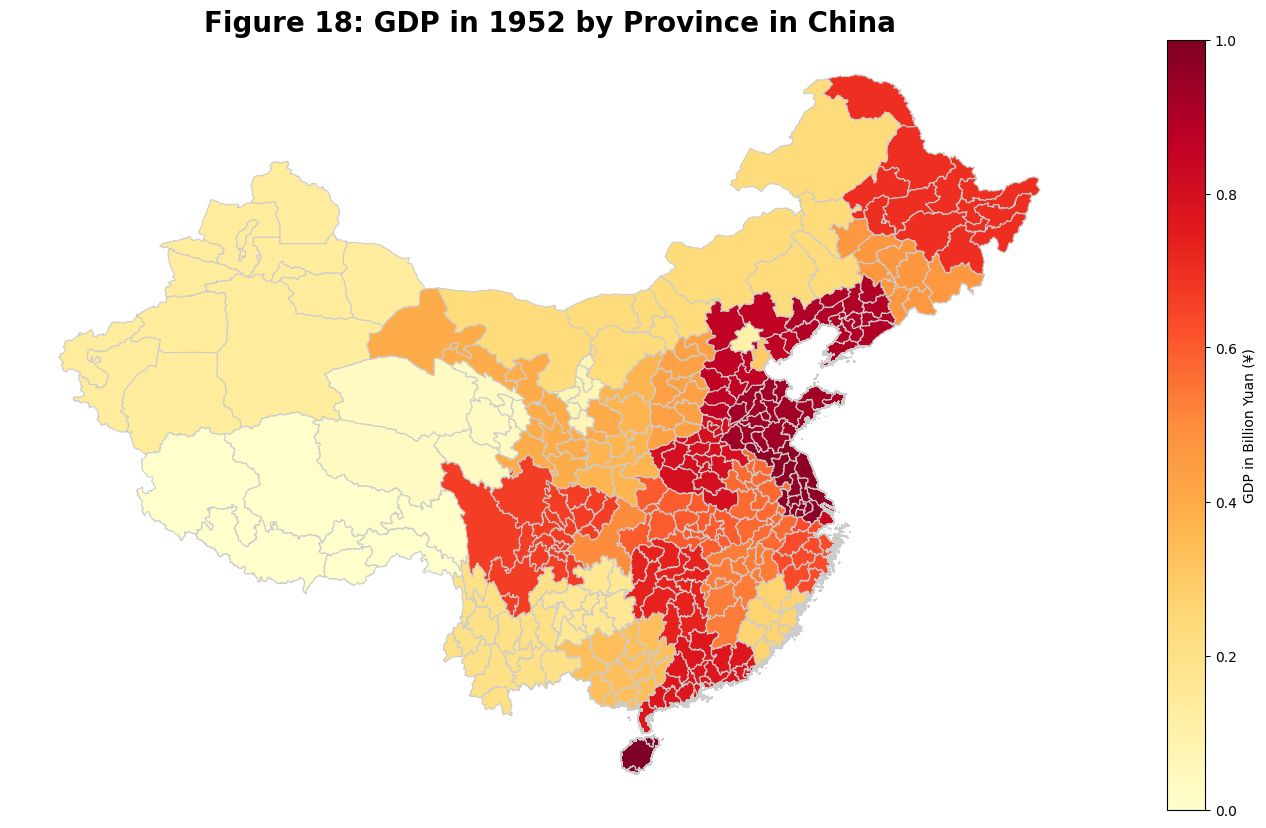

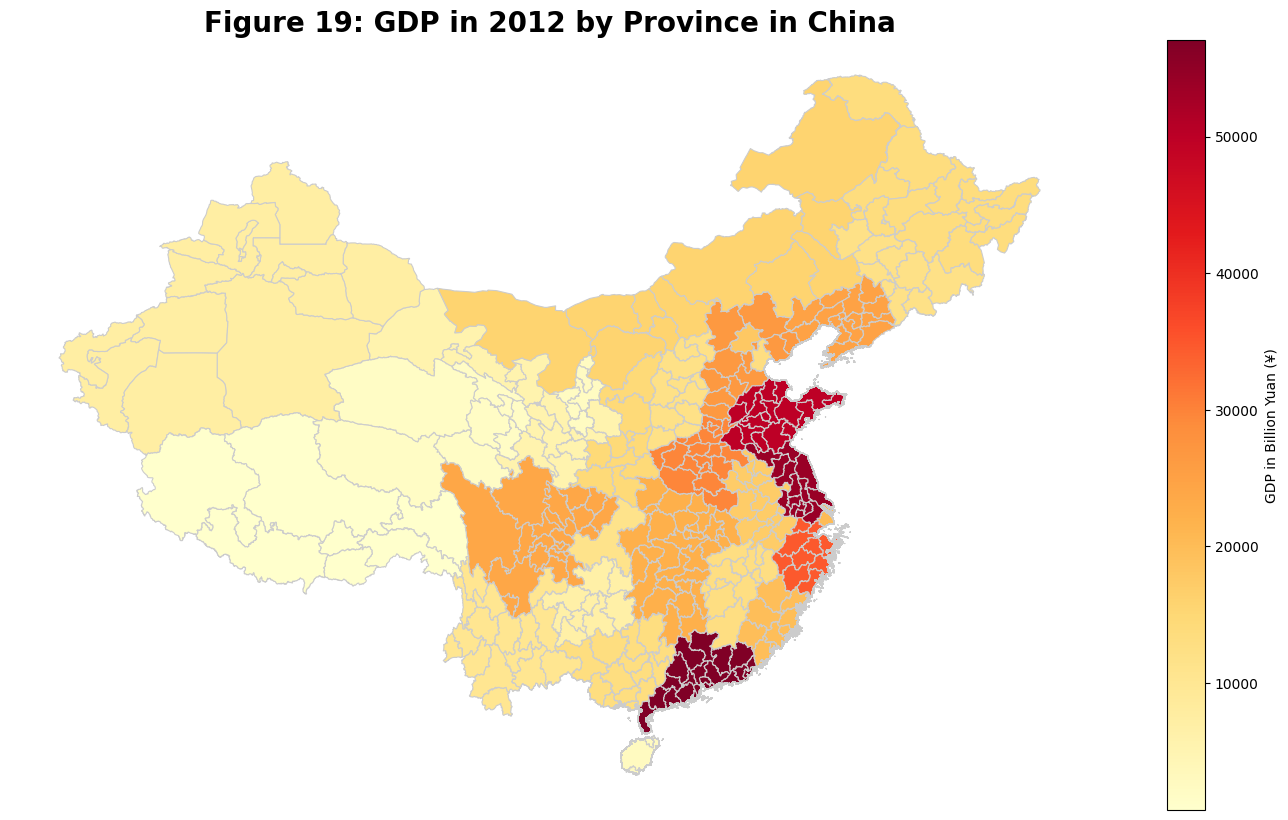

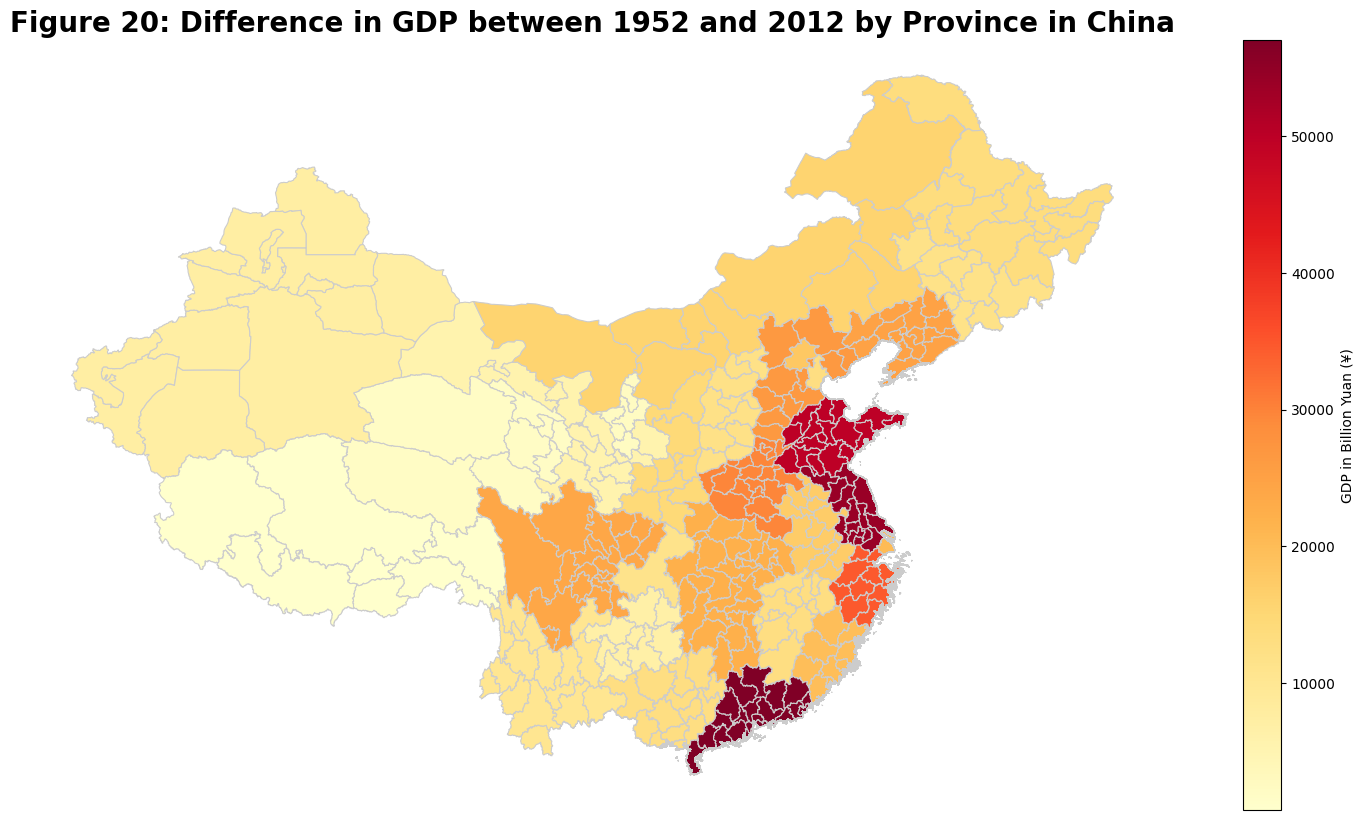

In [48]:
# Merge the data frames
merged_gdp_1952 = pd.merge(gdf, china_gdp[['Province', '1952']], on='Province')

# Create the plot and add colorbar
fig, ax = plt.subplots(figsize=(20, 10))
merged_gdp_1952.plot(column='1952', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Figure 18: GDP in 1952 by Province in China', fontdict={'fontsize': '20', 'fontweight' : 'bold'})

# Add custom legend
import matplotlib.pyplot as plt
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='YlOrRd'), ax=ax)
cbar.ax.set_ylabel('GDP in Billion Yuan (¥)')
plt.show()

# Merge the data frames
merged_gdp_2012 = pd.merge(gdf, china_gdp[['Province', '2012']], on='Province')

# Create the plot and add colorbar
fig, ax = plt.subplots(figsize=(20, 10))
merged_gdp_2012.plot(column='2012', cmap='YlOrRd', linewidth=0.8, legend=True, ax=ax, edgecolor='0.8', legend_kwds={'label': 'GDP in Billion Yuan (¥)'})
ax.axis('off')
ax.set_title('Figure 19: GDP in 2012 by Province in China', fontdict={'fontsize': '20', 'fontweight' : 'bold'})

plt.show()

# Change Hainan District to ensure proper merge
china_gdp = china_gdp.replace('——', np.nan)
china_gdp[['1952', '2012']] = china_gdp[['1952', '2012']].astype(float)

# Calculate the difference in GDP for each province between 1952 and 2012
china_gdp['difference'] = china_gdp['2012'] - china_gdp['1952']
merged_gdp_diff = pd.merge(gdf, china_gdp[['Province', 'difference']], on='Province')

# Create the plot
fig, ax = plt.subplots(figsize=(20, 10))
merged_gdp_diff.plot(column='difference', cmap='YlOrRd', linewidth=0.8, legend=True, ax=ax, edgecolor='0.8', vmin=merged_gdp_diff['difference'].min(), vmax=merged_gdp_diff['difference'].max(), legend_kwds={'label': 'GDP in Billion Yuan (¥)'})
ax.axis('off')
ax.set_title('Figure 20: Difference in GDP between 1952 and 2012 by Province in China', fontdict={'fontsize': '20', 'fontweight' : 'bold'})

plt.show()

The third map displaying the difference in GDP between 1952 to 2012 by province in China is highly relevant to our research question, as economic growth is a key driver of urbanization, which, in turn, can impact average temperature trends in a warming world. The similarity between the map of the GDP in 2012 by provinces and the map of the difference in GDP between 1952 and 2012 may be due to the relatively small difference in GDP over time. This is because the GDP values for each province have only ranged from 1.32 billion yuan to 48.41 billion yuan since 1950, which means that the differences between the GDP values for each province may not be very pronounced. As we previously mentioned, the map shows that the south part of China has experienced higher economic growth than the north part of China, which may suggest that the south has undergone more urbanization and subsequently experienced different temperature trends than the north.

Urbanization can impact temperature trends through various mechanisms, such as the urban heat island effect, where urban areas are warmer than surrounding rural areas. However, this pattern is not seen in China. Instead, we observe a clear pattern of decreasing average temperature from 1950 to 2012 in the south part of China, while the north part of China shows a clear pattern of increasing average temperature during the same period.

This finding is interesting and useful for future research, as it suggests that the relationship between urbanization and temperature trends may not be straightforward and requires further investigation. Incorporating more datasets may help to confirm this conclusion and shed more light on the complex interplay between urbanization, economic growth, and temperature trends in China and other regions.

# Project Three

## Potential Data to Scrape

So far, our project has focused on examining the relationship between urbanization and temperature change in China using various plots and maps. Our initial findings showed a clear increasing trend in temperature across the country. We then integrated other datasets, such as China's urban population, which revealed a positive correlation between urbanization and rising temperatures. Furthermore, we analyzed the distribution of average temperature and GDP by provinces and observed that the northern regions of China are experiencing more significant temperature increases than the economically developed southern regions.

To enhance our analysis, we plan to include additional datasets that can provide further insight into the urbanization and economic development of China. To achieve this, we intend to employ web scraping techniques, which we learned in class, to obtain datasets that can represent urbanization levels or economic development.

One such dataset is available on Wikipedia and records the demographics of China, including the exact population by provinces from 1953 to 2020, based on 7 national census. The wikipedia website is: https://en.wikipedia.org/wiki/Demographics_of_China. While this dataset may have missing values in some years due to unclear provincial classifications, it provides a direct insight into the population change and movement from 1952 onwards. By using maps, we can illustrate the population distribution by province and assess its relationship with average temperature.

We also discovered a website that records the total number of workers by sector. The wikipedia website is: https://commons.wikimedia.org/wiki/Data:Total_number_of_workers_by_sector_(GGDC,_2017)_(OWID_1881).tab. This dataset will help us determine trends in the number of people working in various sectors and their relationship with urbanization and economic development from 1952 to 2011. We can use line plots to show the trend of people working in different sectors and scatter plots to demonstrate the correlation between workers in specific industries and temperature change. Although not immediately apparent, the number of people working in different sectors is a strong indicator of economic development and urbanization, providing valuable insights to answer our research question.

## Potential Challenges

When scraping data from the first website, "Population of China by province 1953–2020," we encountered some challenges. Although the source is from Wikipedia, we were not able to extract the data we needed using an API scraping technique due to an error stating that the variable "table" was of type None. This could be due to the fact that the code was not able to find the table on the webpage. We also attempted to use an HTML scraping technique, but the table includes some cells that span multiple columns. The headers variable only contains 15 column names, but the rows variable contains data for 30 columns, causing an error when trying to create a DataFrame with these inputs.

Therefore, we decided to use the second website, which records the total number of workers by sector. However, it is important to note that we may need to stay up-to-date with changes in website structures and anti-scraping measures. If the website changes the HTML tags, we may not be able to find the necessary data that we need. Additionally, if the website updates its data on a regular basis, we may need to run our program over time (annually) to generate the data we need. To overcome these challenges, we may need to continue to stay up-to-date with changes in website structures and anti-scraping measures, and continue to learn new scraping techniques in the future.

While we were able to successfully scrape data from the website and generate effective outcomes for our analysis, it's important to remain aware of potential changes to the website or data. We should regularly check the website to ensure that we have the most up-to-date information, and be prepared to update our scraping code if necessary. This could involve monitoring the website for changes to the data format or structure, as well as changes to the website's anti-scraping measures. It's worth noting that the website we used, Wikipedia Commons, is not an API-based website, but rather a data file that we were able to extract data from using other scraping techniques. While APIs can be a reliable and easy way to access structured data, they may not always be applicable or available for the specific website or data we need to analyze. By monitoring the website for updates and being prepared to adjust our scraping code as needed, we can ensure that we are working with the most accurate and up-to-date data for our analysis.

## Scraping Data from a Website

The first line sets the url variable to the webpage we want to scrape. The second line uses the requests library to send an request to the webpage specified in the url variable, and then gets the HTML content of the webpage. The soup line uses BeautifulSoup library to parse the HTML content of the webpage and to obtain a soup object which looks very structured.

In [49]:
url = "https://commons.wikimedia.org/wiki/Data:Total_number_of_workers_by_sector_(GGDC,_2017)_(OWID_1881).tab"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

The data is enclosed in the table HTML tag with the class name 'table'. The table is then parsed row by row using a for loop. For the first row, the table headers are extracted by finding the "th" elements. For the remaining rows, the table cells are extracted by finding the "td" elements. The headers and cells are then appended to the "headers" and "rows" lists respectively.

In [50]:
table = soup.find_all("table", {"class": "mw-tabular sortable"})[0]
rows = []
headers = []

for i, row in enumerate(table.find_all("tr")):
    if i == 0:
        headers = [header.text.strip() for header in row.find_all("th")]
    else:
        cells = []
        for td in row.find_all("td"):
            cells.append(td.text.strip())
        rows.append(cells)

After successfully scraping the data from the website, the "rows" and "headers" lists are used to create a Pandas DataFrame called "work_sector". The "rows" list contains the data for each sector, while the "headers" list contains the column names. Before using the data for analysis, any rows with missing values are dropped using the "dropna" method. This ensures that the data is clean and free from any NaN or missing values that could affect the accuracy of the analysis. After cleaning the data, the column names are then renamed to make them more concise and easier to work with for future analysis. Specifically, the names of the columns are modified to remove names like "_GGDC_2017" and make them more descriptive and meaningful.

In [51]:
work_sector = pd.DataFrame(rows, columns=headers)
work_sector.dropna(inplace=True)
work_sector.columns = ["Country", "Year", "Number_in_agriculture", "Number_in_mining", "Number_in_manufacturing", "Number_in_utilities", "Number_in_construction",
              "Number_in_trade_restaurants_and_hotels", "Number_in_transport_storage_and_communication", "Number_in_finance_insurance_real_estate_and_business_services", "Number_in_government_services",
              "Number_in_community_social_and_personal_services", "Total_number_of_people_in_all_10_sectors"]
work_sector.head()

Country  Year Number_in_agriculture Number_in_mining  \
2  Argentina  1950       1799.5648291591   32.71936053017   
3  Argentina  1951       1835.1809850692   34.37387000436   
4  Argentina  1952       1730.6108856611   35.55356690697   
5  Argentina  1953       2029.7624056012    33.8380877611   
6  Argentina  1954       1889.3161535854   33.34185494088   

  Number_in_manufacturing Number_in_utilities Number_in_construction  \
2         1603.2486659781       39.2632326362        314.10586108959   
3         1640.9270838316      42.43317650333        353.41725110353   
4         1690.1174670723      49.16047511126        311.39098226807   
5         1578.1244860091      52.20825425402         291.6067421628   
6         1721.9974505655      57.66519795337        330.19712999194   

  Number_in_trade_restaurants_and_hotels  \
2                         889.9666064205   
3                        879.72950459094   
4                         932.2140436961   
5                        903.63098522226   
6                        913.84004321131   

  Number_in_transport_storage_and_communication  \
2                               425.35168689215   
3                               427.92568973265   
4                               461.50838528203   
5                                455.3022774835   
6                               468.62304978832   

  Number_in_finance_insurance_real_estate_and_business_services  \
2                                    203.83842125235              
3                                     204.0642231416              
4                                    218.99728486315              
5                                     209.7324126038              
6                                    213.77715011186              

  Number_in_government_services  \
2               824.92121430142   
3               817.73587532078   
4               881.01042955534   
5               870.08487734376   
6               893.70401053535   

  Number_in_community_social_and_personal_services  \
2                                  410.89222777351   
3                                  411.47687052444   
4                                   441.7270215547   
5                                  434.68542454479   
6                                  444.88494049498   

  Total_number_of_people_in_all_10_sectors  
2                          6543.8721060331  
3                          6647.2645298224  
4                           6752.290541971  
5                          6858.9759529863  
6                          6967.3469811789

## Merging the Scraped Dataset

To analyze trends in the number of people working in various sectors in China and investigate potential relationships with temperature changes over time, we merged the work_sector dataset with the grouped_na_3 clean dataset. We used the Year variable as the key to merge the two datasets together, and only selected years starting from 1952. The merge type used was an inner merge, which only includes observations that have matching values in both datasets. This ensures that we only analyze data for years where we have complete information for both the number of workers by sector and the average temperature.

The final merged dataset contains over 1000 observations and records data for each province in China. This dataset was created by merging the work_sector dataset with a separate dataset that contains province-level data on population, GDP, and other variables. We will use this merged dataset to conduct regressions and investigate relationships between the number of workers in different sectors and other economic and environmental factors.

In [52]:
# Convert object into float
numerical_cols = ["Year", "Number_in_agriculture", "Number_in_mining", "Number_in_manufacturing", "Number_in_utilities", "Number_in_construction", "Number_in_trade_restaurants_and_hotels", "Number_in_transport_storage_and_communication", "Number_in_finance_insurance_real_estate_and_business_services", "Number_in_government_services", "Number_in_community_social_and_personal_services", "Total_number_of_people_in_all_10_sectors"]
work_sector[numerical_cols] = work_sector[numerical_cols].replace('', np.nan).astype(float)

In [53]:
# Select China data
work_sector['Year'] = work_sector['Year'].astype(int)
work_china = work_sector[(work_sector['Country'] == 'China') & (work_sector['Year'] >= 1950) & (work_sector['Year'] <= 2012)]
work_china = work_china[['Country', 'Year', 'Number_in_agriculture', "Number_in_mining", "Number_in_manufacturing", "Number_in_utilities", "Number_in_construction", "Number_in_trade_restaurants_and_hotels", "Number_in_transport_storage_and_communication", "Number_in_finance_insurance_real_estate_and_business_services", "Number_in_government_services", "Number_in_community_social_and_personal_services", "Total_number_of_people_in_all_10_sectors"]]

# Merge work_china with grouped_na_3 in project 1
merged_work = pd.merge(grouped_na_3, work_china, on='Year', how='inner')
merged_work = merged_work.drop('Country', axis=1)
merged_work.head()

Year  AverageTemperature  AverageTemperatureUncertainty  \
0  1952           12.861676                       0.413794   
1  1953           13.236556                       0.363403   
2  1954           12.576355                       0.351867   
3  1955           12.978915                       0.358450   
4  1956           12.270832                       0.353979   

   Number_in_agriculture  Number_in_mining  Number_in_manufacturing  \
0               173170.0       1610.056547             11653.479921   
1               177470.0       1803.557791             13054.028782   
2               181510.0       1979.181203             14325.179106   
3               185920.0       2011.781956             14561.141142   
4               185440.0       2595.440600             18785.622760   

   Number_in_utilities  Number_in_construction  \
0           212.235369             1834.228163   
1           237.742428             2054.670999   
2           260.892857             2254.746834   
3           265.190242             2291.886659   
4           342.127296             2956.809344   

   Number_in_trade_restaurants_and_hotels  \
0                             4881.305316   
1                             4935.801548   
2                             4668.510507   
3                             4730.791915   
4                             5205.687647   

   Number_in_transport_storage_and_communication  \
0                                    3211.385076   
1                                    3247.237860   
2                                    3071.388492   
3                                    3112.363102   
4                                    3424.794505   

   Number_in_finance_insurance_real_estate_and_business_services  \
0                                        1346.808574               
1                                        1361.844714               
2                                        1288.096026               
3                                        1305.280186               
4                                        1436.309410               

   Number_in_government_services  \
0                    6869.795458   
1                    6946.491739   
2                    6570.314742   
3                    6657.967634   
4                    7326.320941   

   Number_in_community_social_and_personal_services  \
0                                       2500.705575   
1                                       2528.624138   
2                                       2391.690234   
3                                       2423.597163   
4                                       2666.887498   

   Total_number_of_people_in_all_10_sectors  
0                                  207290.0  
1                                  213640.0  
2                                  218320.0  
3                                  223280.0  
4                                  230180.0

## Visualizing the Scraped Dataset

### Line Plot for employed people

We will begin our analysis by using line plots to depict the employment trends in various industries in China from 1952 to 2011. The first graph displays the number of people employed in agriculture, which accounts for the largest proportion of the workforce. It is evident that the trend was consistently increasing until 1990, after which there was a sharp decline. This can be attributed to the process of urbanization and economic development, which enticed many young people to move from rural to urban areas in search of better opportunities. The combined analysis of these trends in conjunction with other line plots will provide a better understanding of the workforce allocation across different sectors.

The second graph illustrates the number of people employed in mining in China, which displays a similar trend as that seen in the agriculture sector, with a constant upward trend before 1995 and a sudden drop afterwards. The reasons for this decline are again attributable to urbanization and the emergence of more promising prospects in cities.

The third and fourth graphs showcase the number of People employed in manufacturing and utilities in China, with the former being a significant contributor to the country's economy. The trend in this sector saw a sudden increase in employment in 2000, with the rise of industrialization and factories operating in China. This trend also represents China's shift from an agricultural-based economy to a manufacturing-based one. It is noteworthy that the maximum number of people employed in these sectors was observed in 2010, after which there was a decline. These trends, when analyzed in conjunction with the following four graphs depicting people working in the service industry, provide an insight into China's economic journey.

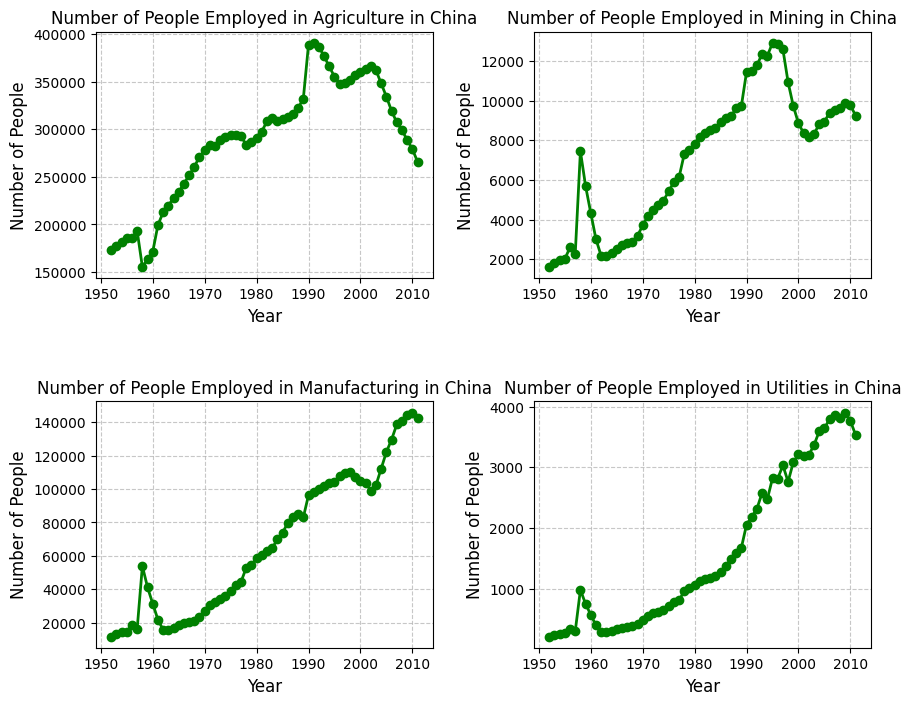

In [54]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot the line plot for Number_in_agriculture
axes[0, 0].plot(merged_work['Year'], merged_work['Number_in_agriculture'], color='green', linewidth=2, marker='o')
axes[0, 0].set_title('Number of People Employed in Agriculture in China', fontsize=12)
axes[0, 0].set_xlabel('Year', fontsize=12)
axes[0, 0].set_ylabel('Number of People', fontsize=12)
axes[0, 0].tick_params(labelsize=10)
axes[0, 0].grid(True, linestyle='--', alpha=0.7)

# Plot the line plot for Number_in_mining
axes[0, 1].plot(merged_work['Year'], merged_work['Number_in_mining'], color='green', linewidth=2, marker='o')
axes[0, 1].set_title('Number of People Employed in Mining in China', fontsize=12)
axes[0, 1].set_xlabel('Year', fontsize=12)
axes[0, 1].set_ylabel('Number of People', fontsize=12)
axes[0, 1].tick_params(labelsize=10)
axes[0, 1].grid(True, linestyle='--', alpha=0.7)

# Plot the line plot for Number_in_manufacturing
axes[1, 0].plot(merged_work['Year'], merged_work['Number_in_manufacturing'], color='green', linewidth=2, marker='o')
axes[1, 0].set_title('Number of People Employed in Manufacturing in China', fontsize=12)
axes[1, 0].set_xlabel('Year', fontsize=12)
axes[1, 0].set_ylabel('Number of People', fontsize=12)
axes[1, 0].tick_params(labelsize=10)
axes[1, 0].grid(True, linestyle='--', alpha=0.7)

# Plot the line plot for Number_in_utilities
axes[1, 1].plot(merged_work['Year'], merged_work['Number_in_utilities'], color='green', linewidth=2, marker='o')
axes[1, 1].set_title('Number of People Employed in Utilities in China', fontsize=12)
axes[1, 1].set_xlabel('Year', fontsize=12)
axes[1, 1].set_ylabel('Number of People', fontsize=12)
axes[1, 1].tick_params(labelsize=10)
axes[1, 1].grid(True, linestyle='--', alpha=0.7)

plt.subplots_adjust(wspace=0.3, hspace=0.5) # Adjust the space between the subplots
plt.show()

The four graphs depict a notable shift in the employment trends in China, particularly towards service-based industries. The significant increase in the number of people working in the construction industry is an indicator of the need for building infrastructure and buildings to support the process of urbanization in China. This shift towards urbanization has been a significant driving force in shaping the country's economic development and has played a significant role in influencing the temperature trends in the region.

Additionally, the upward trend in the number of people working in the service industry, particularly in trade, restaurants and hotels, transport, storage and communication, and financial and business services sectors, indicates a significant shift in the country's economic priorities from manufacturing to services. This shift is consistent with the broader global trend towards service-based economies, and it highlights China's efforts to diversify its economy and reduce its dependence on the manufacturing sector. These trends suggest that China's urbanization and shift towards a service-based economy have significant implications for the country's economic growth and development.

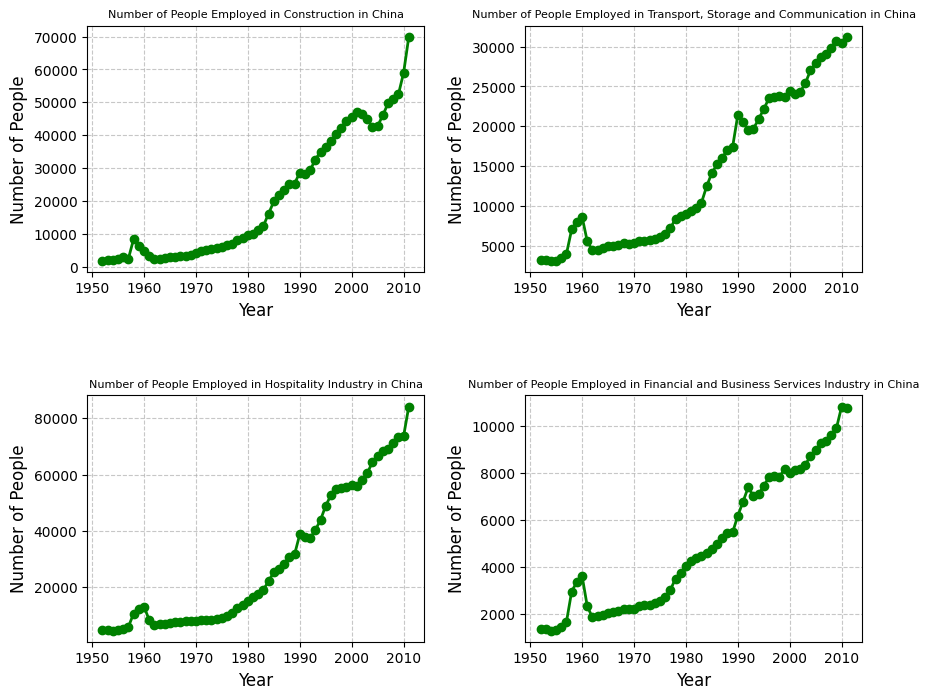

In [55]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot the line plot for Number_in_construction
axes[0, 0].plot(merged_work['Year'], merged_work['Number_in_construction'], color='green', linewidth=2, marker='o')
axes[0, 0].set_title('Number of People Employed in Construction in China', fontsize=8)
axes[0, 0].set_xlabel('Year', fontsize=12)
axes[0, 0].set_ylabel('Number of People', fontsize=12)
axes[0, 0].tick_params(labelsize=10)
axes[0, 0].grid(True, linestyle='--', alpha=0.7)

# Plot the line plot for Number_in_transport_storage_and_communication
axes[0, 1].plot(merged_work['Year'], merged_work['Number_in_transport_storage_and_communication'], color='green', linewidth=2, marker='o')
axes[0, 1].set_title('Number of People Employed in Transport, Storage and Communication in China', fontsize=8)
axes[0, 1].set_xlabel('Year', fontsize=12)
axes[0, 1].set_ylabel('Number of People', fontsize=12)
axes[0, 1].tick_params(labelsize=10)
axes[0, 1].grid(True, linestyle='--', alpha=0.7)

# Plot the line plot for Number_in_trade_restaurants_and_hotels
axes[1, 0].plot(merged_work['Year'], merged_work['Number_in_trade_restaurants_and_hotels'], color='green', linewidth=2, marker='o')
axes[1, 0].set_title('Number of People Employed in Hospitality Industry in China', fontsize=8)
axes[1, 0].set_xlabel('Year', fontsize=12)
axes[1, 0].set_ylabel('Number of People', fontsize=12)
axes[1, 0].tick_params(labelsize=10)
axes[1, 0].grid(True, linestyle='--', alpha=0.7)

# Plot the line plot for Number_in_finance_insurance_real_estate_and_business_services
axes[1, 1].plot(merged_work['Year'], merged_work['Number_in_finance_insurance_real_estate_and_business_services'], color='green', linewidth=2, marker='o')
axes[1, 1].set_title('Number of People Employed in Financial and Business Services Industry in China', fontsize=8)
axes[1, 1].set_xlabel('Year', fontsize=12)
axes[1, 1].set_ylabel('Number of People', fontsize=12)
axes[1, 1].tick_params(labelsize=10)
axes[1, 1].grid(True, linestyle='--', alpha=0.7)

plt.subplots_adjust(wspace=0.3, hspace=0.5) # Adjust the space between the subplots
plt.show()

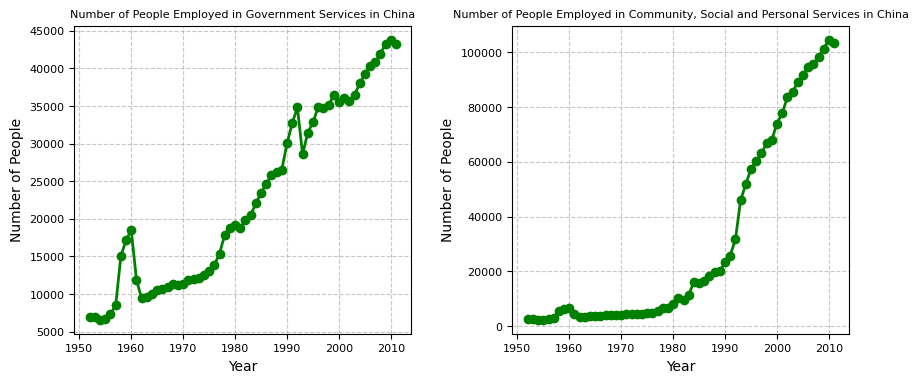

In [56]:
# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the line plot for Number_in_government_services
axes[0].plot(merged_work['Year'], merged_work['Number_in_government_services'], color='green', linewidth=2, marker='o')
axes[0].set_title('Number of People Employed in Government Services in China', fontsize=8)
axes[0].set_xlabel('Year', fontsize=10)
axes[0].set_ylabel('Number of People', fontsize=10)
axes[0].tick_params(labelsize=8)
axes[0].grid(True, linestyle='--', alpha=0.7)

# Plot the line plot for Number_in_community_social_and_personal_services
axes[1].plot(merged_work['Year'], merged_work['Number_in_community_social_and_personal_services'], color='green', linewidth=2, marker='o')
axes[1].set_title('Number of People Employed in Community, Social and Personal Services in China', fontsize=8)
axes[1].set_xlabel('Year', fontsize=10)
axes[1].set_ylabel('Number of People', fontsize=10)
axes[1].tick_params(labelsize=8)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.subplots_adjust(wspace=0.3) # Adjust the space between the subplots
plt.show()

In conclusion, by observing the trend in employment in different industries in China, it is clear that the process of urbanization has played a significant role in shaping the workforce and the economy. As the process of urbanization accelerates, more people move from rural areas to urban centers, leading to a decline in the number of people employed in the agricultural and mining sectors. These trends indicate a shift towards a more industrialized economy and a transition from an agricultural-based to manufacture-based economy, then to a service-based economy. 

Moreover, the sudden increase in the number of people employed in the manufacturing sector in China around 2000 also indicates a significant shift in the economy. The development of factories and the growth of the manufacturing sector have been a key driver of the Chinese economy in recent decades. However, the decline in the number of people employed in manufacturing and utilities after 2010 may suggest a new shift in the economy, where services may become more dominant. In conclusion, the line plot suggests that the shift towards an industrialized and service-based economy has been driven in part by the process of urbanization, and that this shift may have implications for temperature trends in the future.

 ### Scatter Plot

Based on the scatter plots of the number of people working in the financial service industry and trade, restaurants, and hotels industries against average temperature change, it appears that there is a positive correlation between the number of people working in these industries and average temperature change. This suggests that as urbanization and economic development occur, resulting in an increase in the number of people working in these industries, there may be a corresponding increase in average temperature.

The financial service industry is associated with the development of the finance and insurance sectors, which could contribute to economic growth and urbanization. The trade, restaurants, and hotels industry is associated with the development of the service sector, which is a major contributor to economic growth and urbanization. These findings suggest that urbanization and economic development play a role in shaping average temperature trends in a warming world. As more people move to cities and contribute to the growth of these industries, there may be an increase in energy consumption and greenhouse gas emissions, contributing to climate change. This highlights the need for sustainable urbanization and economic development strategies that minimize their impact on the environment and mitigate the effects of climate change.

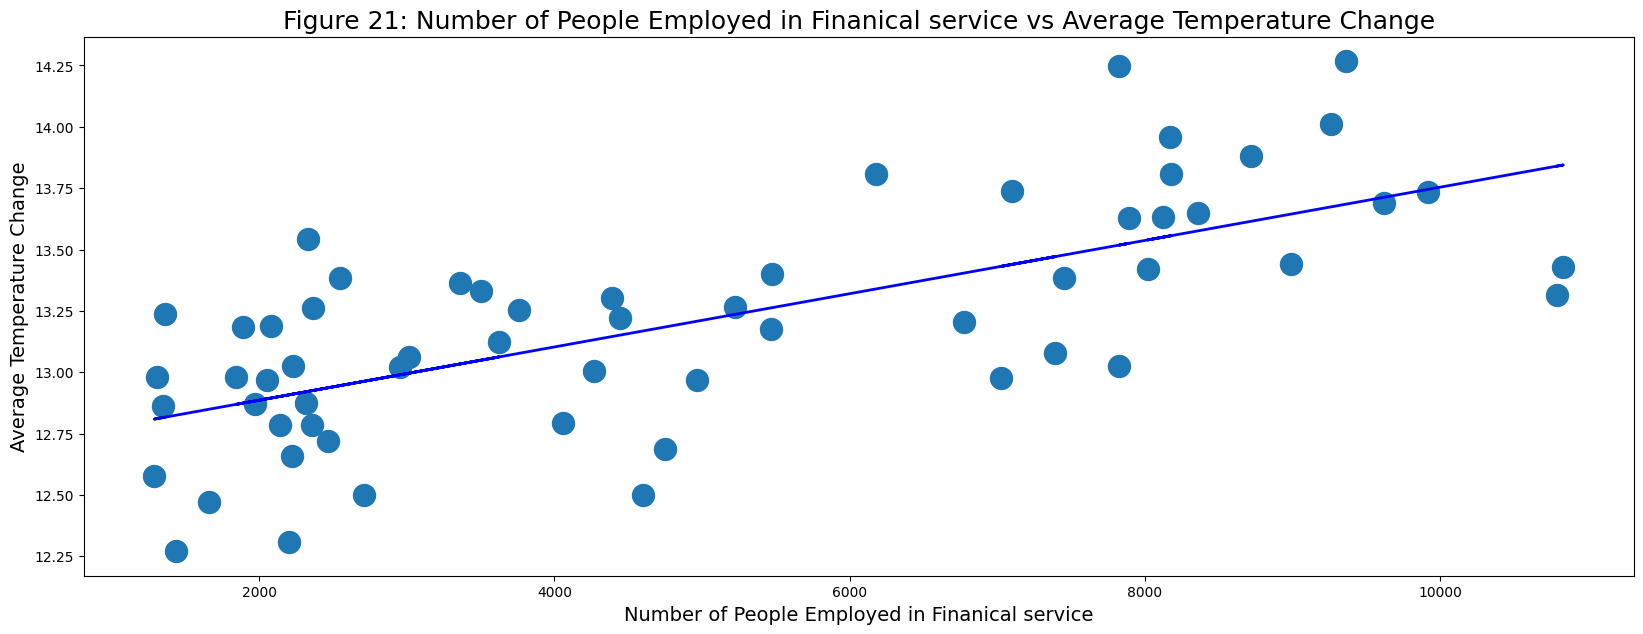

In [57]:
# Create a scatter plot
plt.figure(figsize=(20, 7))
plt.scatter(merged_work['Number_in_finance_insurance_real_estate_and_business_services'], merged_work['AverageTemperature'], s=250)
plt.title('Figure 21: Number of People Employed in Finanical service vs Average Temperature Change', fontsize=18)
plt.xlabel('Number of People Employed in Finanical service', fontsize=14)
plt.ylabel('Average Temperature Change', fontsize=14)

# Line of best fit
x = merged_work['Number_in_finance_insurance_real_estate_and_business_services']
y = merged_work['AverageTemperature']
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x+intercept, linewidth=2, color='b')
plt.show()

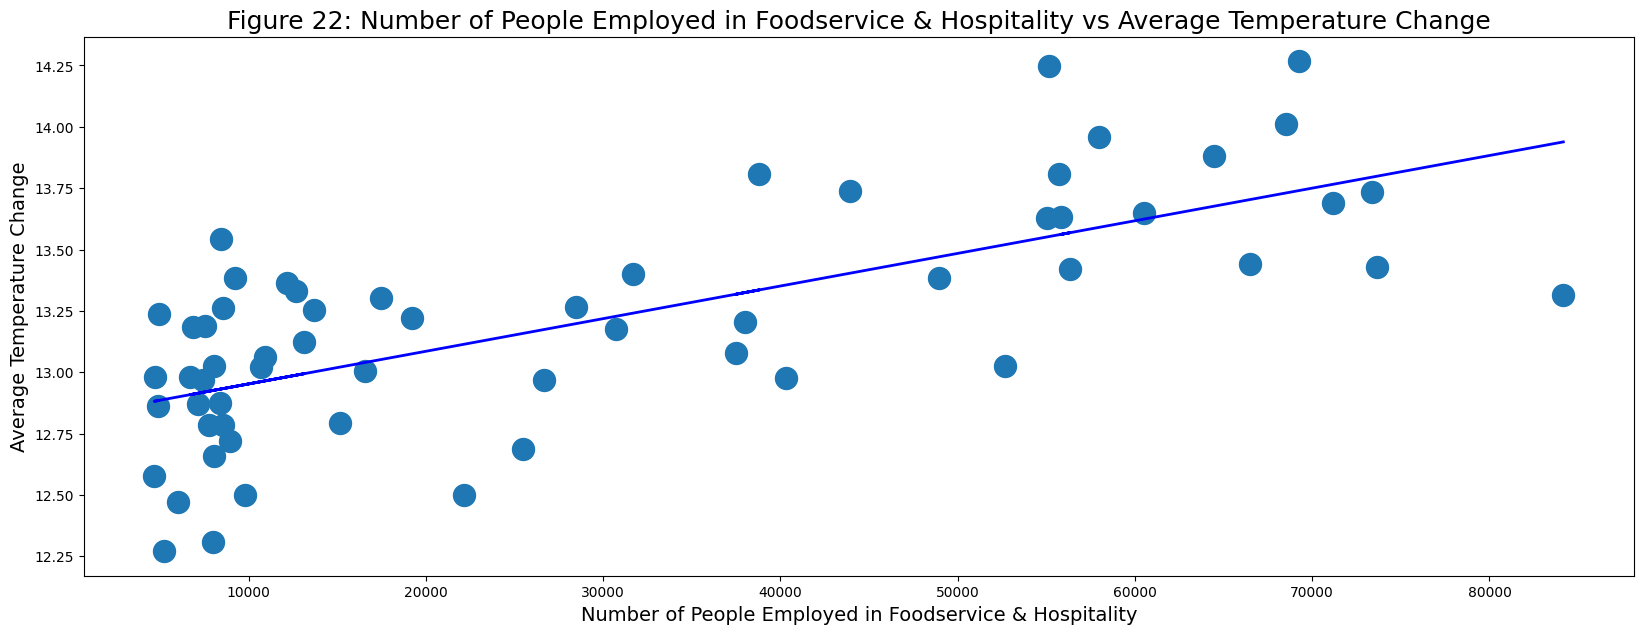

In [58]:
# Create a scatter plot
plt.figure(figsize=(20, 7))
plt.scatter(merged_work['Number_in_trade_restaurants_and_hotels'], merged_work['AverageTemperature'], s=250)
plt.title('Figure 22: Number of People Employed in Foodservice & Hospitality vs Average Temperature Change', fontsize=18)
plt.xlabel('Number of People Employed in Foodservice & Hospitality', fontsize=14)
plt.ylabel('Average Temperature Change', fontsize=14)

# Line of best fit
x = merged_work['Number_in_trade_restaurants_and_hotels']
y = merged_work['AverageTemperature']
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x+intercept, linewidth=2, color='b')
plt.show()

## Adding a New Dataset

In this section, we will merge a new dataset that records the electricity generation by province in China from 1950 to 2012. By merging the electricity generation dataset with our existing dataset on economic development, we can gain a better understanding of the relationship between urbanization, economic development, and average temperature trends in China. This dataset also provides valuable insight into the distribution of energy generation across different provinces and how it correlates with economic development. Through creating maps to visualize electricity production across provinces, we can gain a clearer picture of these relationships. Our main indicator years will be 1952 and 2012, and it is important to note that we experienced data loss for some provinces in 1950, such as Zhejiang and Sichuan. We also decided to ignore the observation for Chongqing city since Chongqing was part of Sichuan province until 1997. Additionally, we will exclude Hainan and Tibet since they were founded after 1950 and do not affect our findings. In conclusion, merging the electricity generation dataset with our existing dataset provides a more comprehensive understanding of the role that urbanization and economic development play in shaping average temperature trends in China.

### Data cleaning

In [59]:
# Read the data and do basic data cleaning
elec = pd.read_excel('/Users/booker/Desktop/ECO225Project/Data/中国发电量.xlsx')
elec = elec.rename(columns={'年': 'Year',
                        '省份': 'Province',
                        '发电量(亿千瓦小时)': 'Electricity Generation (100 million kWh)'})
elec['Province'] = elec['Province'].replace({'北京市': 'Beijing', '天津市': 'Tianjin','河北省': 'Hebei','山西省': 'Shanxi','内蒙古自治区': 'Inner Mongolia',
    '辽宁省': 'Liaoning', '吉林省': 'Jilin','黑龙江省': 'Heilongjiang','上海市': 'Shanghai','江苏省': 'Jiangsu','浙江省': 'Zhejiang','安徽省': 'Anhui','福建省': 'Fujian','江西省': 'Jiangxi','山东省': 'Shandong','河南省': 'Henan','湖北省': 'Hubei','湖南省': 'Hunan','广东省': 'Guangdong','广西壮族自治区': 'Guangxi',
    '海南省': 'Hainan','重庆市': 'Chongqing', '四川省': 'Sichuan','贵州省': 'Guizhou','云南省': 'Yunnan','陕西省': 'Shaanxi','甘肃省': 'Gansu','青海省': 'Qinghai','宁夏回族自治区': 'Ningxia','新疆维吾尔自治区': 'Xinjiang'
})
# Merge the electricity data with temperature data
merged_province_elec = pd.merge(new_df[new_df['Year']>=1950], elec[['Province', 'Year', 'Electricity Generation (100 million kWh)']], on=['Province', 'Year'])
# Group data by province
elec_by_province = merged_province_elec.groupby(['Province'])
elec_by_province.head()

Year  Province  AverageTemperature  \
0     1950     Anhui               15.75   
1     1951     Anhui               15.59   
2     1952     Anhui               15.34   
3     1953     Anhui               16.22   
4     1954     Anhui               15.26   
...    ...       ...                 ...   
1638  1950  Zhejiang               16.46   
1639  1951  Zhejiang               16.29   
1640  1952  Zhejiang               16.24   
1641  1953  Zhejiang               16.82   
1642  1954  Zhejiang               16.20   

      Electricity Generation (100 million kWh)  
0                                         0.32  
1                                         0.35  
2                                         0.50  
3                                         0.83  
4                                         1.32  
...                                        ...  
1638                                       NaN  
1639                                       NaN  
1640                                      0.85  
1641                                       NaN  
1642                                       NaN  

[135 rows x 4 columns]

### Line graph

This line graph provides valuable insight into the relationship between economic development, electricity generation, and urbanization in China. It illustrates how the increase in electricity generation since the 1980s has coincided with China's rapid economic growth and industrialization, which are closely tied to urbanization. The Northeastern region of China, particularly Liaoning Province, had the highest levels of electricity generation until the 1980s, followed by growth in the Southern region after 1980. The graph also highlights how the increase in electricity generation is likely contributing to rising average temperatures in China, which is a key component of our research question. Therefore, this graph helps to shed light on the potential impact of urbanization and economic development on average temperature trends in China and the importance of considering these factors when examining the impacts of a warming world.

/var/folders/ht/lwtbbmwn27j0wj2cjvlfjk2m0000gn/T/ipykernel_49655/896739292.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (name, group) in enumerate(elec_by_province):


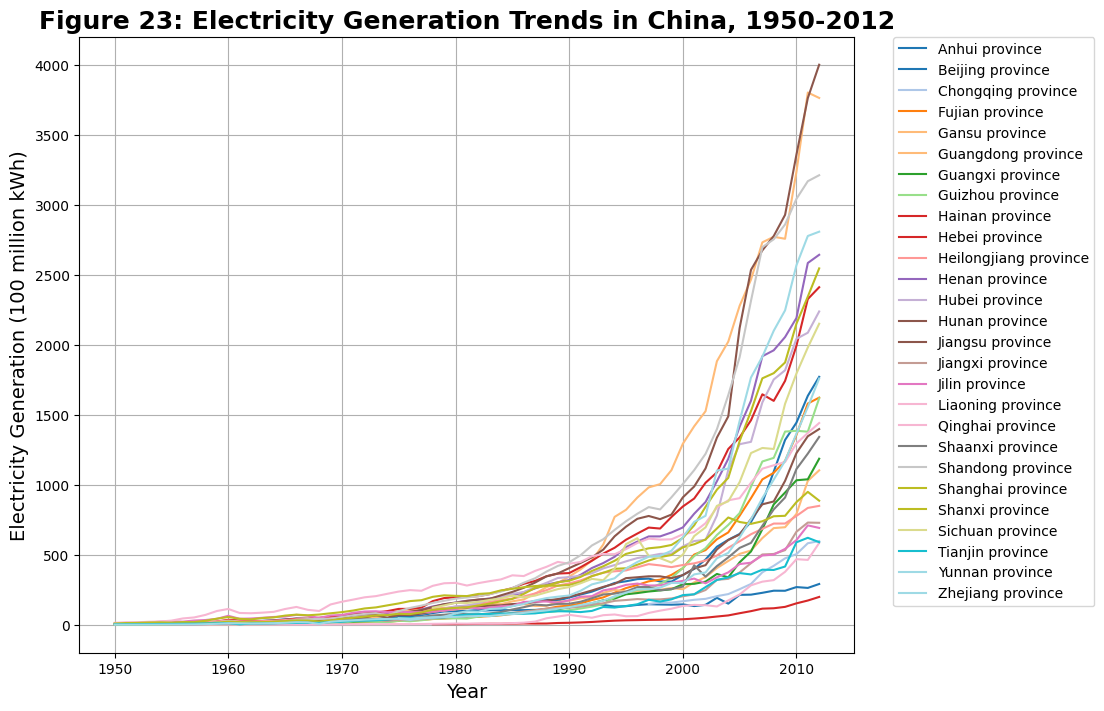

In [60]:
fig, ax = plt.subplots(figsize=(10, 8))
colors = plt.cm.tab20(np.linspace(0, 1, len(elec_by_province)))

for i, (name, group) in enumerate(elec_by_province):
    group.plot(x='Year', y='Electricity Generation (100 million kWh)', ax=ax, label=f'{name} province', color=colors[i])

# Set plot title and axis labels
ax.set_title('Figure 23: Electricity Generation Trends in China, 1950-2012', fontdict={'fontsize': 18, 'fontweight': 'bold'})
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Electricity Generation (100 million kWh)', fontsize=14)

# Add legend and gridlines
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.grid(True)

plt.show()

### Maps

The first map shows the distribution of electricity production across provinces in China in 1952. The darker shades of blue and purple indicate provinces with higher electricity generation, while the lighter shades represent provinces with lower electricity generation. The north part of China, particularly the northeastern region consisting of Jilin, Heilongjiang, and Liaoning provinces, stands out as the area with the highest amount of electricity generation in China. This is likely due to the abundance of natural resources such as coal and oil in this region, which are commonly used to generate electricity. It also indicates that the northeastern region was highly developed at that time with faster pace of indusrtilization process than other areas. The southern provinces, including Guangdong, Fujian, and Zhejiang, appear to have lower electricity generation compared to the northern provinces, possibly due to differences in industrial development and resource availability. 

The second map shows a shift in the distribution of electricity production across provinces in China in 2012 compared to the distribution in 1952. The provinces of Jiangsu, Guangdong, and Shandong had the highest amount of electricity generation, with Jiangsu producing the most at 4001.13 (100 million kWh). This suggests a shift in China's energy landscape towards a more industrialized and urbanized economy, with these provinces being major economic hubs and centers of production. The shift away from the traditional heavy industry in the northeastern provinces towards service-based industries in the southern and eastern provinces may have contributed to this change in electricity production. Additionally, advancements in technology and improvements in energy infrastructure may have also played a role in the increased electricity generation in these provinces.

The third map, which shows the difference in electricity production from 1952 to 2012, provides further insight into the changing trends of electricity generation in China over time. We see a similar distribution to the second map, with Jiangsu, Guangdong, and Shandong having the highest electricity production. However, we also see a significant increase in electricity production across most provinces, which highlights the rapid development and urbanization that has occurred in China over the past few decades. This increase in electricity production is likely driven by the growth of urban areas, which require more energy to power buildings, transportation, and infrastructure.

When comparing the changes in electricity production to the changes in temperature across China from 1950 to 2012, we can observe a potential relationship between urbanization and temperature trends. The expansion of urban areas and the subsequent increase in electricity production have resulted in a general increase in temperature in northern parts of China and a decrease in temperature in southern parts of China. This is likely the result of urbanization increasing the frequency of extreme temperature days. The northeastern region of China, in particular, shows a clear trend, as it was the region with high economic development and urbanization, while other parts of China were mostly rural areas. We can see a significant increase in economic development in the northeastern region during 1970, coinciding with a rise in temperature. This may be due to the urban heat island effect, where urban areas are warmer than rural areas due to factors such as increased energy consumption, heat retention by buildings and infrastructure, and reduced green spaces.

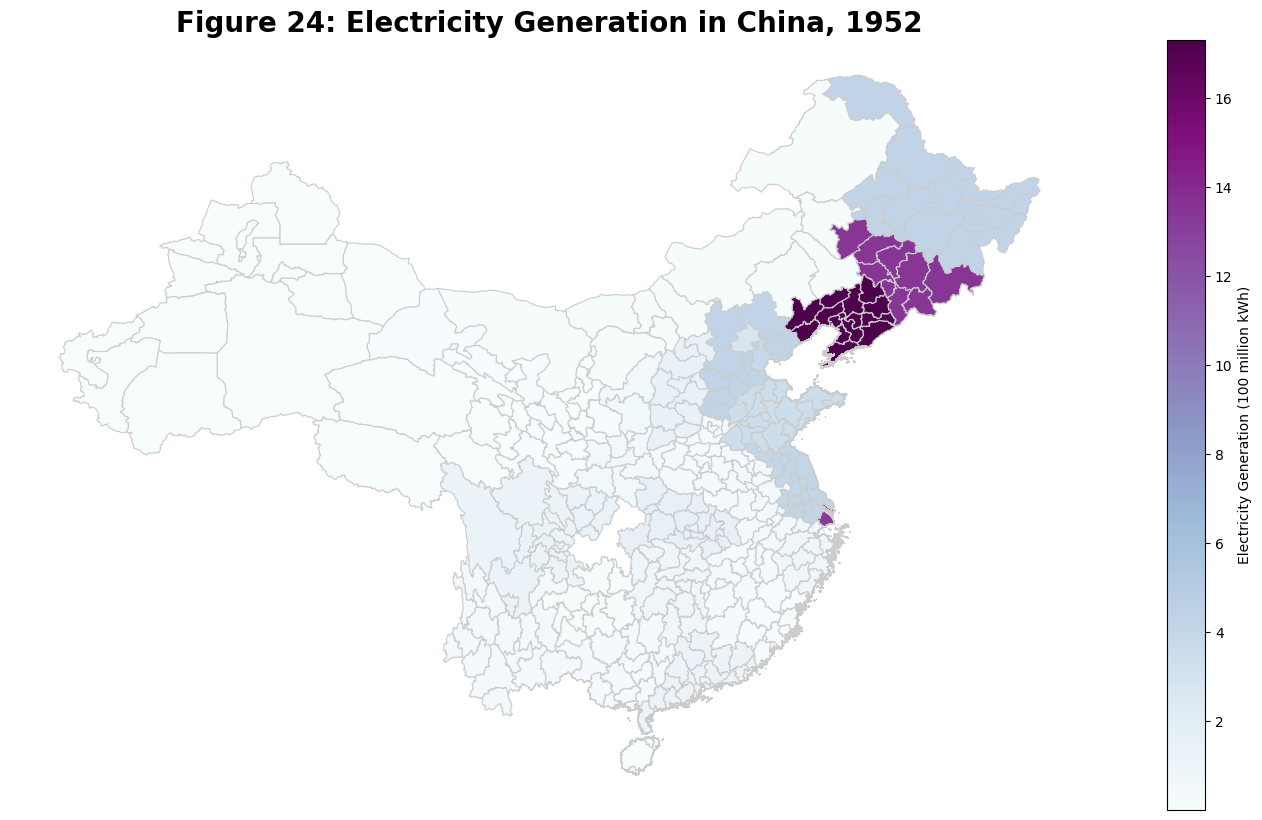

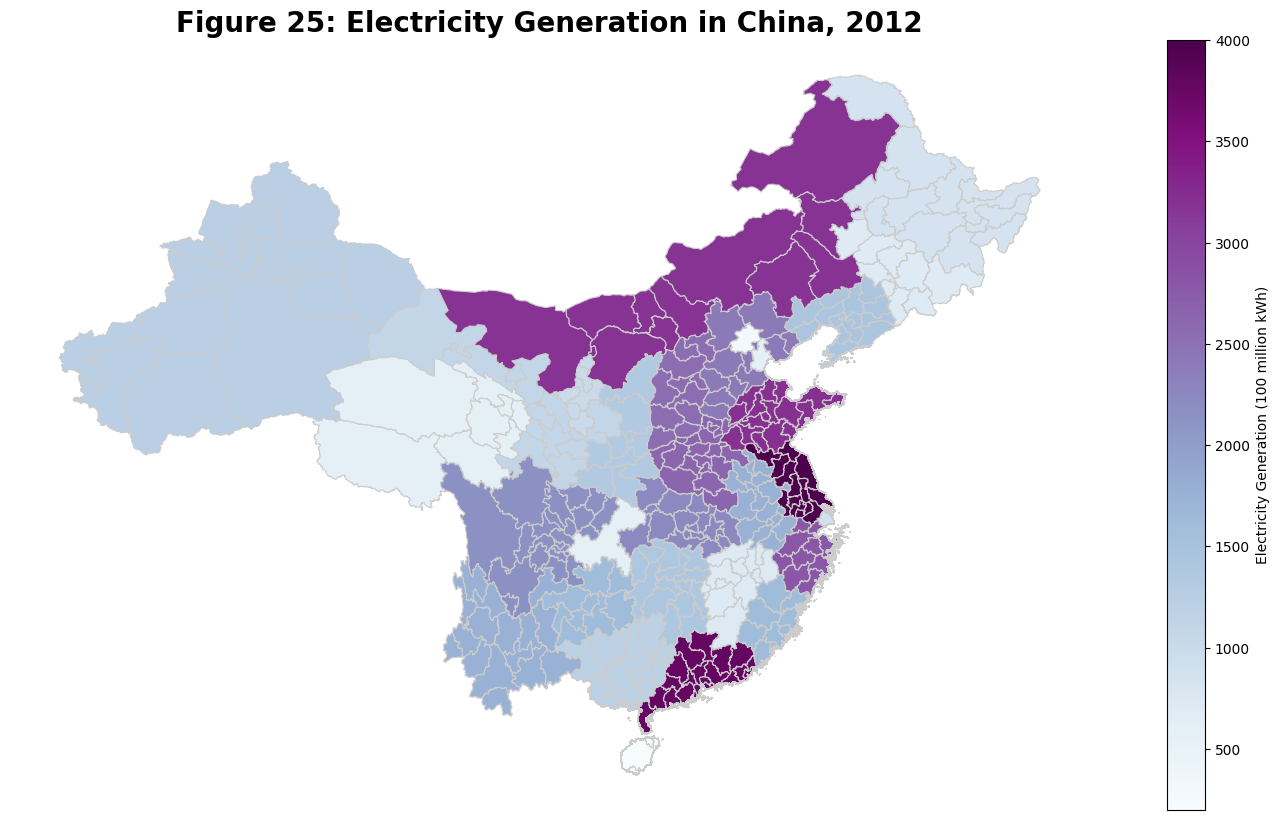

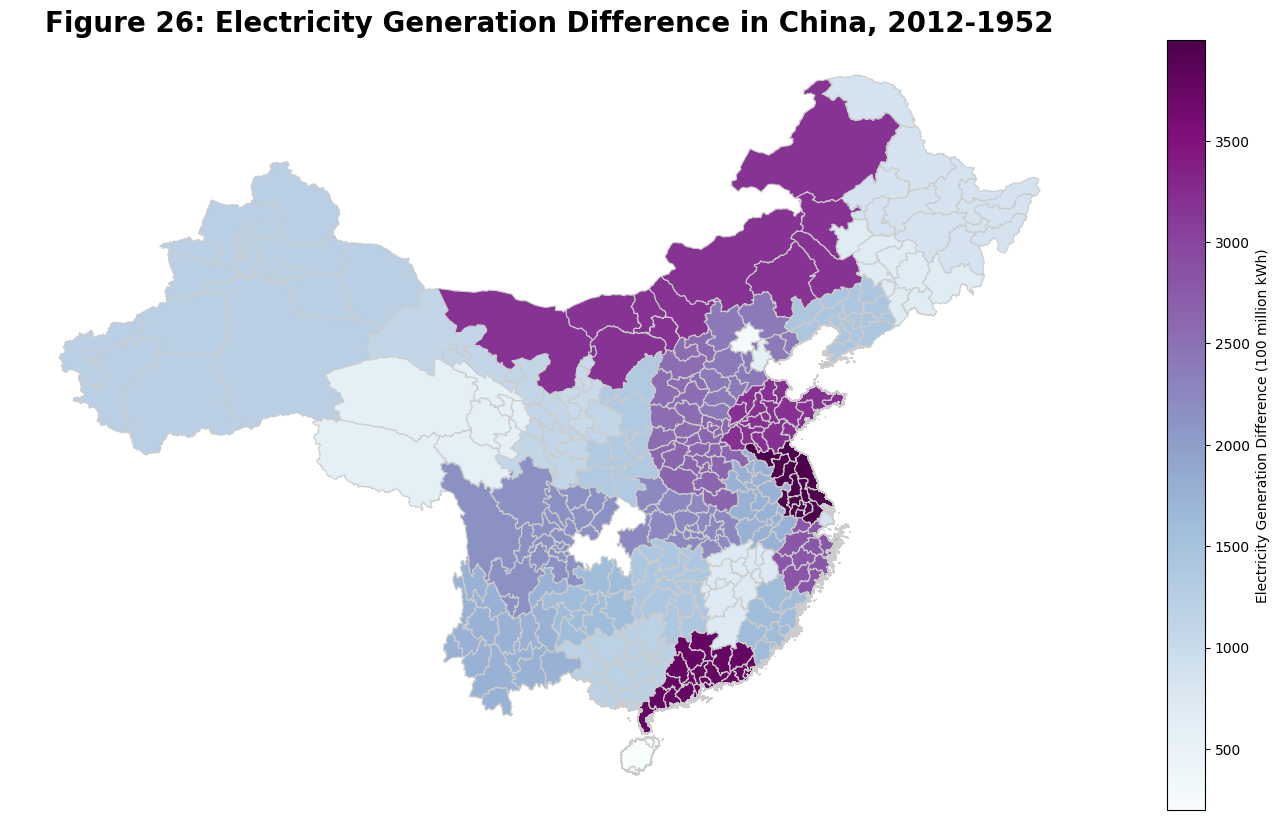

In [61]:
# Generate map for year 1952
elec_1952 = elec[elec['Year'] == 1952]
gdf_merged = gpd.GeoDataFrame(pd.merge(gdf, elec_1952, on='Province'))

fig, ax = plt.subplots(figsize=(20, 10))
gdf_merged.plot(column='Electricity Generation (100 million kWh)', cmap='BuPu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Electricity Generation (100 million kWh)", 'orientation': "vertical"})
ax.axis('off')
ax.set_title('Figure 24: Electricity Generation in China, 1952', fontdict={'fontsize': '20', 'fontweight' : 'bold'})
plt.show()

# Generate map for year 2012
elec_2012 = elec[elec['Year'] == 2012]
gdf_merged = gpd.GeoDataFrame(pd.merge(gdf, elec_2012, on='Province'))

fig, ax = plt.subplots(figsize=(20, 10))
gdf_merged.plot(column='Electricity Generation (100 million kWh)', cmap='BuPu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Electricity Generation (100 million kWh)", 'orientation': "vertical"})
ax.axis('off')
ax.set_title('Figure 25: Electricity Generation in China, 2012', fontdict={'fontsize': '20', 'fontweight' : 'bold'})
plt.show()

# Generate map for the difference in electricty production between year 2012 and 1952
elec_diff = elec[elec['Year'] == 2012].set_index('Province')['Electricity Generation (100 million kWh)'] - elec[elec['Year'] == 1952].set_index('Province')['Electricity Generation (100 million kWh)']
gdf_merged_diff = gdf.merge(elec_diff, left_on='Province', right_index=True)

fig, ax = plt.subplots(figsize=(20, 10))
gdf_merged_diff.plot(column='Electricity Generation (100 million kWh)', cmap='BuPu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Electricity Generation Difference (100 million kWh)", 'orientation': "vertical"})
ax.axis('off')
ax.set_title('Figure 26: Electricity Generation Difference in China, 2012-1952', fontdict={'fontsize': '20', 'fontweight' : 'bold'})
plt.show()

# Final Project

## Data cleaning

### Incorporate dataset
Due to the unique nature of our research topic, collecting over 1000 observations has proven to be a challenge. As we are focusing on the time period between 1950 and 2012 in China, data availability is limited, particularly in the earlier years. In fact, national data was the only available data until 1980, as provincial or city data was not yet recorded. In previous projects, we found that using only national data resulted in less than 100 observations, which did not provide a strong foundation for our research findings.

To address the limitations of our previous regression analysis, we have decided to incorporate additional datasets from the China Statistical Yearbook. In addition to the GDP and electricity generation datasets used in previous regressions, we will now include data of highway mileage, the number of vehicles, and population by province. We have previously plotted maps for GDP and electricity generation by province, which have shown a linear relationship with average temperature. Specifically, the GDP map has revealed that the south part of China has experienced higher economic growth than the north part of China, suggesting that the south has undergone more urbanization and experienced different temperature trends than the north. 

Our analysis has revealed that the expansion of urban areas and the subsequent increase in electricity production have had a significant impact on temperature trends in China. Specifically, there has been a general increase in temperature in northern regions and a decrease in temperature in southern regions. We believe this may be due to urbanization increasing the frequency of extreme temperature days. Additionally, we anticipate that our new datasets of highway mileage, number of vehicles, and population by province are also likely to have a positive relationship with average temperature. This is because as China's economy grows and more cities emerge, the total highway mileage and number of vehicles are expected to increase as well. We have observed similar trends in developed countries like the United States, where large amounts of automobiles and roads were produced. In addition, as we discussed earlier on the effect of urban and rural population on average temperature, we observe a positive correlation between urban population and average temperature, as well as a positive relationship between the percentage of the total population residing in urban areas and average temperature in China over the entire period. These factors are indicative of the level of economic development and can be used as indicators for urbanization, providing a stronger foundation for our regression analysis.

To further investigate these relationships, we plan to conduct data visualization on our newly incorporated datasets. By analyzing the data, we hope to gain a better understanding of the relationship between our independent variables and average temperature.

In [62]:
# Replace province names in new_df
new_df.replace({'Ningxia Hui': 'Ningxia', 'Nei Mongol': 'Inner Mongolia', 'Xizang': 'Tibet', 'Xinjiang Uygur': 'Xinjiang'}, inplace=True)
new_df = new_df[(new_df['Year'] >= 1950) & (new_df['Year'] <= 2012)]

# Reshape the china_gdp dataset
china_gdp_long = pd.melt(china_gdp, id_vars=['Province'], var_name='Year', value_name='GDP')
china_gdp_long = china_gdp_long[china_gdp_long['Year'].apply(lambda x: str(x).isdigit())]

china_gdp_long = china_gdp_long.rename(columns={'地区': 'Province'})
china_gdp_long['Year'] = pd.to_numeric(china_gdp_long['Year'])

# Filter the reshaped china_gdp
china_gdp_long = china_gdp_long[(china_gdp_long['Year'] >= 1950) & (china_gdp_long['Year'] <= 2012)]
merged_gdp_temp = pd.merge(new_df, china_gdp_long, on=['Province', 'Year'], how='inner')
merged_gdp_temp= merged_gdp_temp.dropna()

In [63]:
province_popu = pd.read_excel('/Users/booker/Desktop/ECO225Project/Data/各省份人口.xlsx')
province_road = pd.read_excel('/Users/booker/Desktop/ECO225Project/Data/公路里程.xlsx')
province_car = pd.read_excel('/Users/booker/Desktop/ECO225Project/Data/民用汽车.xlsx')

In [64]:
# Read the data and do basic data cleaning
province_popu = province_popu.rename(columns={'年': 'Year',
                        '省份': 'Province',
                        '年底人口数(万人)': 'Population (in ten thousands)'})
province_popu['Province'] = province_popu['Province'].replace({'北京市': 'Beijing', '天津市': 'Tianjin','河北省': 'Hebei','山西省': 'Shanxi','内蒙古自治区': 'Inner Mongolia',
    '辽宁省': 'Liaoning', '吉林省': 'Jilin','黑龙江省': 'Heilongjiang','上海市': 'Shanghai','江苏省': 'Jiangsu','浙江省': 'Zhejiang','安徽省': 'Anhui','福建省': 'Fujian','江西省': 'Jiangxi','山东省': 'Shandong','河南省': 'Henan','湖北省': 'Hubei','湖南省': 'Hunan','广东省': 'Guangdong','广西壮族自治区': 'Guangxi',
    '海南省': 'Hainan','重庆市': 'Chongqing', '四川省': 'Sichuan','贵州省': 'Guizhou','云南省': 'Yunnan','陕西省': 'Shaanxi','甘肃省': 'Gansu','青海省': 'Qinghai','宁夏回族自治区': 'Ningxia','新疆维吾尔自治区': 'Xinjiang'
})

province_road = province_road.rename(columns={'年': 'Year',
                        '省份': 'Province',
                        '公路里程(公里)': 'Highway mileage (kilometers)'})
province_road['Province'] = province_road['Province'].replace({'北京市': 'Beijing', '天津市': 'Tianjin','河北省': 'Hebei','山西省': 'Shanxi','内蒙古自治区': 'Inner Mongolia',
    '辽宁省': 'Liaoning', '吉林省': 'Jilin','黑龙江省': 'Heilongjiang','上海市': 'Shanghai','江苏省': 'Jiangsu','浙江省': 'Zhejiang','安徽省': 'Anhui','福建省': 'Fujian','江西省': 'Jiangxi','山东省': 'Shandong','河南省': 'Henan','湖北省': 'Hubei','湖南省': 'Hunan','广东省': 'Guangdong','广西壮族自治区': 'Guangxi',
    '海南省': 'Hainan','重庆市': 'Chongqing', '四川省': 'Sichuan','贵州省': 'Guizhou','云南省': 'Yunnan','陕西省': 'Shaanxi','甘肃省': 'Gansu','青海省': 'Qinghai','宁夏回族自治区': 'Ningxia','新疆维吾尔自治区': 'Xinjiang'
})
province_road = province_road[['Year', 'Province', 'Highway mileage (kilometers)']]

province_car = province_car.rename(columns={'年': 'Year',
                        '省份': 'Province',
                        '民用汽车总计(万辆)': 'Total number of vehicles (in ten thousands)'})
province_car['Province'] = province_car['Province'].replace({'北京市': 'Beijing', '天津市': 'Tianjin','河北省': 'Hebei','山西省': 'Shanxi','内蒙古自治区': 'Inner Mongolia',
    '辽宁省': 'Liaoning', '吉林省': 'Jilin','黑龙江省': 'Heilongjiang','上海市': 'Shanghai','江苏省': 'Jiangsu','浙江省': 'Zhejiang','安徽省': 'Anhui','福建省': 'Fujian','江西省': 'Jiangxi','山东省': 'Shandong','河南省': 'Henan','湖北省': 'Hubei','湖南省': 'Hunan','广东省': 'Guangdong','广西壮族自治区': 'Guangxi',
    '海南省': 'Hainan','重庆市': 'Chongqing', '四川省': 'Sichuan','贵州省': 'Guizhou','云南省': 'Yunnan','陕西省': 'Shaanxi','甘肃省': 'Gansu','青海省': 'Qinghai','宁夏回族自治区': 'Ningxia','新疆维吾尔自治区': 'Xinjiang'
})
province_car = province_car[['Year', 'Province', 'Total number of vehicles (in ten thousands)']]

# Merge the two datasets based on the Year and Province columns
merged_gdp_temp_popu = pd.merge(province_popu, merged_gdp_temp, on=['Year', 'Province'], how='inner')
merged_gdp_temp_popu_elec = pd.merge(elec, merged_gdp_temp_popu, on=['Year', 'Province'], how='inner')
merged_gdp_temp_popu_elec_road = pd.merge(province_road, merged_gdp_temp_popu_elec, on=['Year', 'Province'], how='inner')
final_reg = pd.merge(province_car, merged_gdp_temp_popu_elec_road, on=['Year', 'Province'], how='inner')
final_reg = final_reg.dropna()

We plan to introduce a dummy variable called "South" to our regression model, with a value of 1 representing the southern regions of China and a value of 0 representing the northern regions. Before doing so, we created a box plot to determine whether there is a significant difference in average temperature between these two regions. Our analysis revealed that the average temperature in the southern part of China is significantly higher than that in the north, which led us to include the "South" variable in our model.

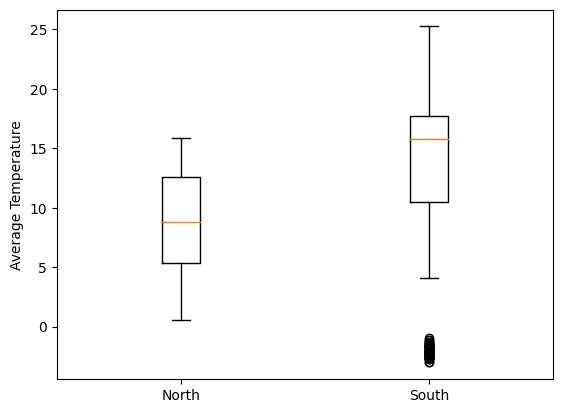

In [65]:
# Create a new column for north or south classification based on province
final_reg['North_South'] = final_reg['Province'].apply(lambda x: 'North' if x in ['Beijing', 'Hebei', 'Tianjin', 'Shanxi', 'Inner Mongolia', 'Liaoning', 'Jilin', 'Heilongjiang', 'Shandong', 'Henan', 'Gansu'] else 'South')

# Create a box plot of AverageTemperature grouped by North_South classification
plt.boxplot([final_reg[final_reg['North_South'] == 'North']['AverageTemperature'], final_reg[final_reg['North_South'] == 'South']['AverageTemperature']])
plt.xticks([1, 2], ['North', 'South'])
plt.ylabel('Average Temperature')
plt.show()

final_reg['South'] = final_reg['North_South'].apply(lambda x: 1 if x == 'South' else 0)

In [66]:
# Convert GDP, Population, and Electricity Generation to float
final_reg['Highway mileage (kilometers)'] = final_reg['Highway mileage (kilometers)'].astype(float)
final_reg['Population (in ten thousands)'] = final_reg['Population (in ten thousands)'].astype(float)
final_reg['Electricity Generation (100 million kWh)'] = final_reg['Electricity Generation (100 million kWh)'].astype(float)
final_reg['GDP'] = final_reg['GDP'].astype(float)
final_reg['Total number of vehicles (in ten thousands)'] = final_reg['Total number of vehicles (in ten thousands)'].astype(float)
final_reg.head()

Year        Province  Total number of vehicles (in ten thousands)  \
0  2012         Beijing                                     493.5604   
1  2012         Tianjin                                     221.1197   
2  2012           Hebei                                     728.5125   
3  2012          Shanxi                                     329.9456   
4  2012  Inner Mongolia                                     266.0780   

   Highway mileage (kilometers)  Electricity Generation (100 million kWh)  \
0                       21492.0                                    290.99   
1                       15391.0                                    589.69   
2                      163045.0                                   2411.24   
3                      137771.0                                   2545.91   
4                      163763.0                                   3172.18   

   Population (in ten thousands)  AverageTemperature       GDP North_South  \
0                        2069.30               10.02  17879.40       North   
1                        1413.15               12.58  12893.88       North   
2                        7287.51                9.42  26575.01       North   
3                        3610.83                8.71  12112.83       North   
4                        2489.85                3.47  15880.58       North   

   South  
0      0  
1      0  
2      0  
3      0  
4      0

### Summary Statistic Table

The summary statistics table provides an overview of the coefficients for various variables in our dataset, which aims to investigate the role of urbanization in shaping average temperature trends in a warming world, using China as an example. The dataset includes 1461 observations, representing every province in China from 1950 to 2012. The observations exclude any missing data.

The first two columns excluding Year column presents summary statistics for the total number of vehicles (in 10,000s) and highway mileage (in km), which can serve as a proxy for urbanization levels. The dataset shows that the mean number of vehicles is 508,600 and the mean highway mileage is 44,631.24 km. The minimum number of vehicles is 46, indicating a lack of urbanization in some areas of China in the early years of the dataset. The maximum number of vehicles is 10,374,217, indicating a significant increase in urbanization over the years.

The subsequent section of the table presents summary statistics for electricity generation (in 100m kWh), population (in 10,000s), average temperature, and GDP. The dataset shows that the mean electricity generation is 36,309 million kWh, the mean population is 35,352,700, the mean average temperature is 12.01 Celsius degrees, and the mean GDP is 2,870.58 billion yuan. The minimum electricity generation is 0.62 million kWh, the minimum population is 1,424,200, the minimum average temperature is -3.01 Celsius degrees, and the minimum GDP is 1.34 billion yuan. The maximum electricity generation is 400,113 million kWh, the maximum population is 1,143,000,000, the maximum average temperature is 25.23 Celsius degrees, and the maximum GDP is 57,067.92 billion yuan.

In [67]:
final_reg.describe()

Year  Total number of vehicles (in ten thousands)  \
count  1461.000000                                  1461.000000   
mean   1985.620123                                    50.858751   
std      17.216155                                   108.069318   
min    1950.000000                                     0.004600   
25%    1972.000000                                     1.741600   
50%    1988.000000                                    11.020800   
75%    2000.000000                                    47.210000   
max    2012.000000                                  1037.421700   

       Highway mileage (kilometers)  Electricity Generation (100 million kWh)  \
count                   1461.000000                               1461.000000   
mean                   44631.238741                                363.089332   
std                    46974.959027                                569.621802   
min                     1155.000000                                  0.006200   
25%                    16370.000000                                 36.100000   
50%                    30298.000000                                142.300000   
75%                    49928.000000                                425.540000   
max                   293499.000000                               4001.130000   

       Population (in ten thousands)  AverageTemperature           GDP  \
count                    1461.000000         1461.000000   1461.000000   
mean                     3535.269167           12.007283   2870.575031   
std                      2305.035482            5.986458   6286.165477   
min                       142.420000           -3.010000      1.340000   
25%                      1765.900000            7.790000     64.070000   
50%                      3270.200000           13.370000    328.220000   
75%                      4857.000000           16.250000   2587.720000   
max                     11430.000000           25.230000  57067.920000   

             South  
count  1461.000000  
mean      0.611910  
std       0.487482  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

### Data Visualization

As we previously mentioned, our analysis requires us to incorporate new datasets that we have not explored before to obtain the most accurate regression results. These datasets include population by province, highway mileage by province, and the number of vehicles by province from 1950 to 2012. To gain a better understanding of the relationships between the independent variables and average temperature, we plan to generate scatter plots and maps. These visualizations will allow us to examine how the independent variables correlate with average temperature over time. It is important to note that the newly incorporated datasets exclude data from the provinces of Hainan, Chongqing, and Tibet, which were established in the late 1970s. While this does result in a significant amount of missing data, removing these observations is unlikely to have a significant impact on our analysis and overall results. By incorporating these datasets and conducting data visualizations, we aim to improve the accuracy of our regression models and better understand the impact of urbanization and economic development on temperature trends in China.

### Population by province

When considering the factors that may impact average temperature in China, it is important to take into account the significant population boom that has occurred in recent years, particularly in the south region of the country. This is evident when examining the population map by province, which shows a clear trend of increased population in provinces such as Guangdong and Jiangsu, with a population increase of 76,830,000. This population growth is also strongly correlated with the GDP growth in the same regions, as seen in project two.

By including population in our regression models, we can better understand how this growth in population may impact average temperature in different regions of the country. For example, we observe a trend of increasing temperature in the north region of China and decreasing temperature in the south region. This trend may be due to factors such as more extreme hot days in the north and more cold days in the south, which could be influenced by population growth and other factors such as urbanization and industrialization.

Therefore, including population in our regression models can help us to better understand the complex interplay between demographic, economic, and environmental factors that influence average temperature in China. This will enable us to make more accurate predictions about future temperature trends and inform policy decisions related to climate change mitigation and adaptation.

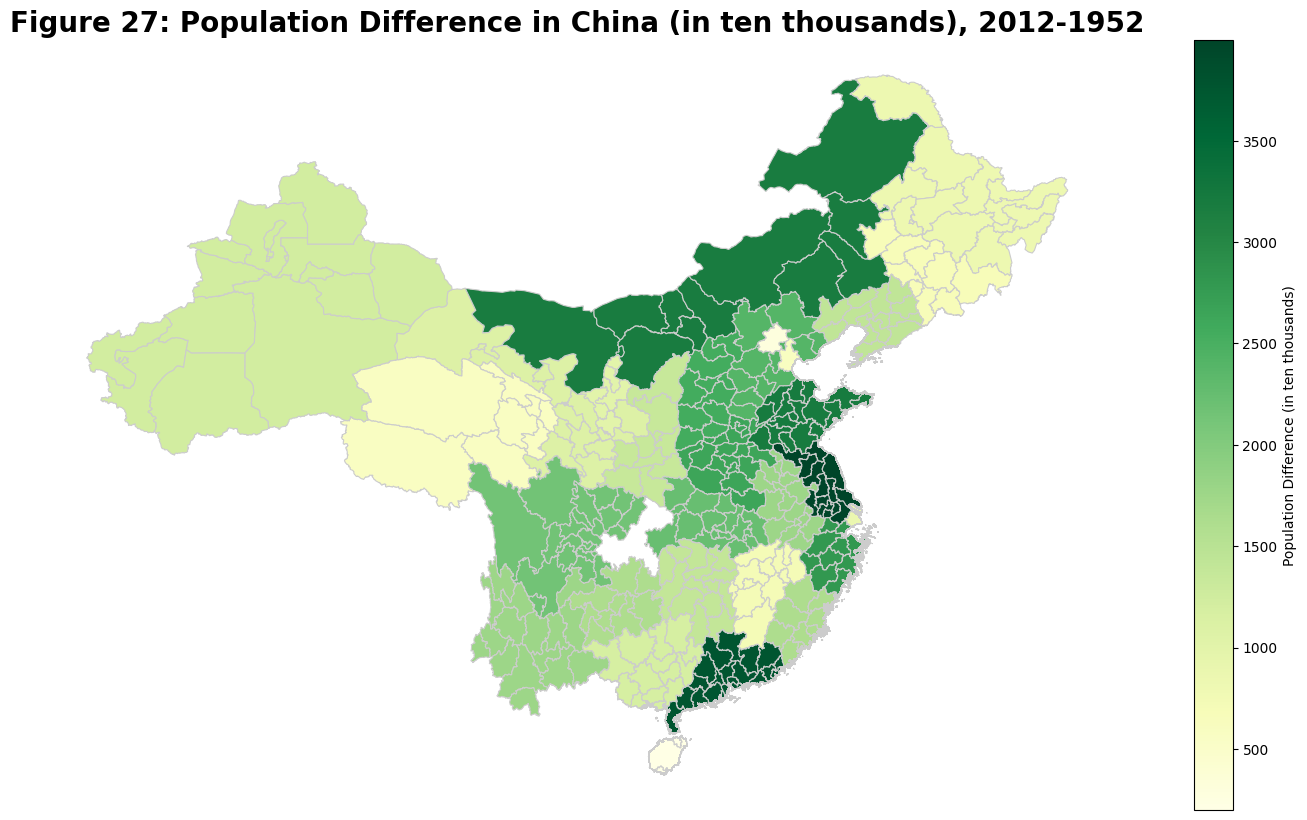

In [68]:
# Generate map for the difference in electricty production between year 2012 and 1952
province_popu_diff = province_popu[province_popu['Year'] == 2012].set_index('Province')['Population (in ten thousands)'] - province_popu[province_popu['Year'] == 1952].set_index('Province')['Population (in ten thousands)']
gdf_popu_diff = gdf.merge(province_popu_diff, left_on='Province', right_index=True)

fig, ax = plt.subplots(figsize=(20, 10))
gdf_merged_diff.plot(column='Electricity Generation (100 million kWh)', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Population Difference (in ten thousands)", 'orientation': "vertical"})
ax.axis('off')
ax.set_title('Figure 27: Population Difference in China (in ten thousands), 2012-1952', fontdict={'fontsize': '20', 'fontweight' : 'bold'})
plt.show()

We will further explore the relationship between each independent variable and the average temperature by creating scatter plots to determine if the relationship is linear or non-linear. This will help us choose which statistical model to use in the subsequent regression analysis.

After examining the scatter plot, we observe that population exhibit a non-linear relationship with the average temperature. Nonetheless, we also notice that population encounter weak heteroskedasticity. To verify the appropriateness of the model, we choose to perform multiple regression initially. Later, we decide to apply a log transformation to these variables in the subsequent multiple regression. By performing multiple regression and applying a log transformation to the population variable, we can better account for the non-linear relationship and assess its impact on the dependent variable.

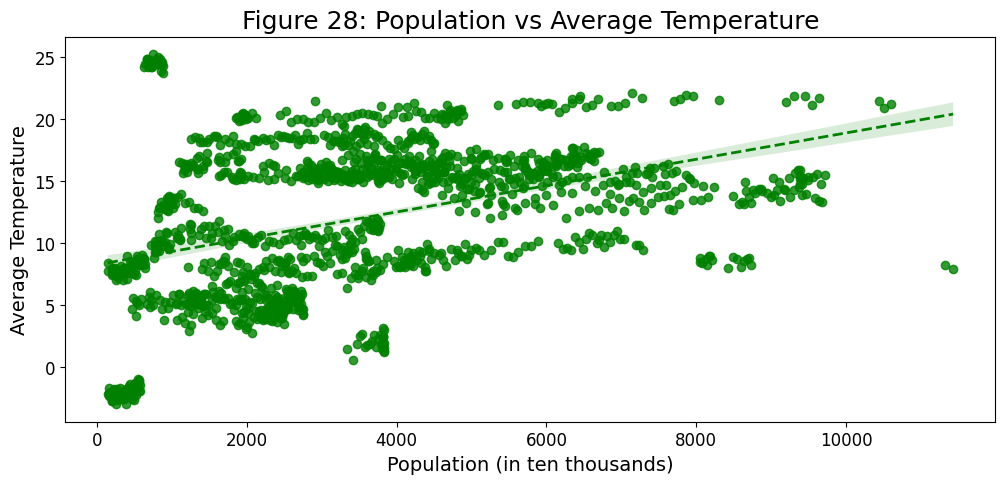

In [69]:
plt.figure(figsize=(12, 5))
sns.regplot(x='Population (in ten thousands)', y='AverageTemperature', data=final_reg, color='g', line_kws={'linestyle': '--', 'linewidth': 2})
plt.title('Figure 28: Population vs Average Temperature', fontsize=18)
plt.xlabel('Population (in ten thousands)', fontsize=14)
plt.ylabel('Average Temperature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Highway mileage by province

Highway mileage is an important indicator of urbanization and is often associated with economic development and increased population mobility. However, our examination of the scatter plot shows that the relationship between highway mileage and average temperature is non-linear, suggesting that the effect of highway mileage on temperature is not constant across the range of values. Furthermore, we notice that there is strong heteroskedasticity in the relationship, meaning that the variance of the residuals changes as the values of the independent variable increase. In this case, by applying a log transformation to the highway mileage variable, we may be able to better capture its relationship with the average temperature. Additionally, by addressing the heteroskedasticity issue, we can increase the accuracy of our model's predictions and make our results more reliable.

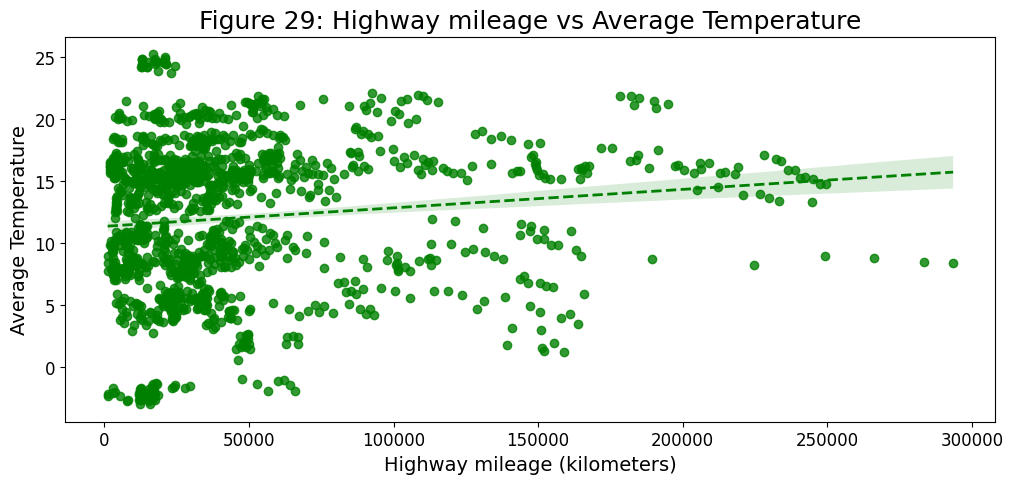

In [70]:
plt.figure(figsize=(12, 5))
sns.regplot(x='Highway mileage (kilometers)', y='AverageTemperature', data=final_reg, color='g', line_kws={'linestyle': '--', 'linewidth': 2})
plt.title('Figure 29: Highway mileage vs Average Temperature', fontsize=18)
plt.xlabel('Highway mileage (kilometers)', fontsize=14)
plt.ylabel('Average Temperature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Total number of vehicles by province

The number of vehicles held in China is a crucial indicator of urbanization, as it reflects the level of economic growth and infrastructure development in a region. However, our examination of the scatter plot shows that the relationship between the number of vehicles and average temperature is non-linear, suggesting that the effect of the number of vehicles on temperature is not constant across the range of values. Furthermore, we notice that there is strong heteroskedasticity in the relationship, meaning that the variance of the residuals changes as the values of the independent variable increase. In this case, by applying a log transformation to the the number of vehicles variable, we may be able to better capture its relationship with the average temperature. Additionally, by addressing the heteroskedasticity issue, we can increase the accuracy of our model's predictions and make our results more reliable.

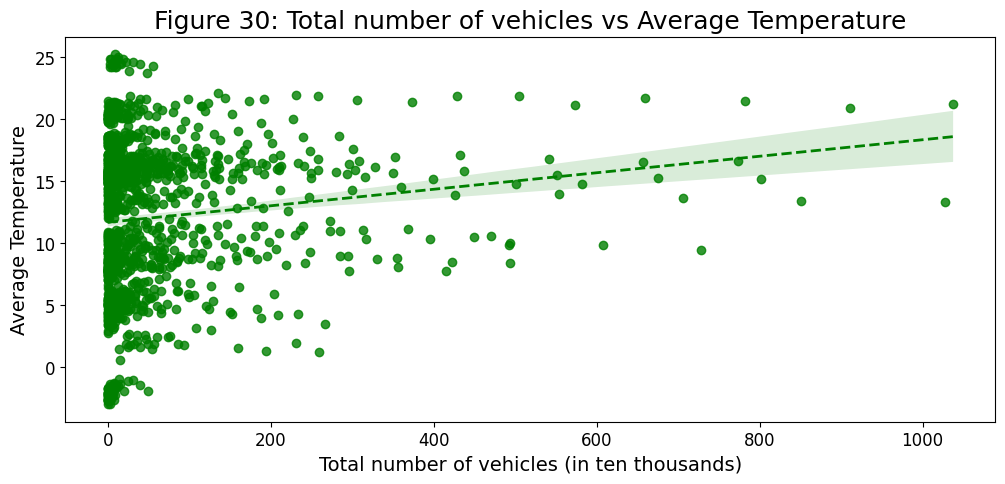

In [71]:
plt.figure(figsize=(12, 5))
sns.regplot(x='Total number of vehicles (in ten thousands)', y='AverageTemperature', data=final_reg, color='g', line_kws={'linestyle': '--', 'linewidth': 2})
plt.title('Figure 30: Total number of vehicles vs Average Temperature', fontsize=18)
plt.xlabel('Total number of vehicles (in ten thousands)', fontsize=14)
plt.ylabel('Average Temperature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Electricity Generation by province

In Project 3, we utilized line plots and maps to visualize the electricity generation by province over time, gaining insight into how electricity production has changed. Electricity generation can potentially explain the variation in average temperature as it is a major source of greenhouse gas emissions, which contribute to climate change. In addition, electricity generation is often linked with industrialization and economic development, both of which can have significant impacts on the environment and temperature patterns. Upon examining the scatter plot, we observed a non-linear relationship between electricity generation and the average temperature. However, we also noted that electricity generation exhibits strong heteroskedasticity. To verify the appropriateness of the model, we choose to perform multiple regression initially. Later, we decide to apply a log transformation to these variables in the subsequent multiple regression. By performing multiple regression and applying a log transformation to the electricity generation variable, we can better account for the non-linear relationship and assess its impact on the average temperature. 

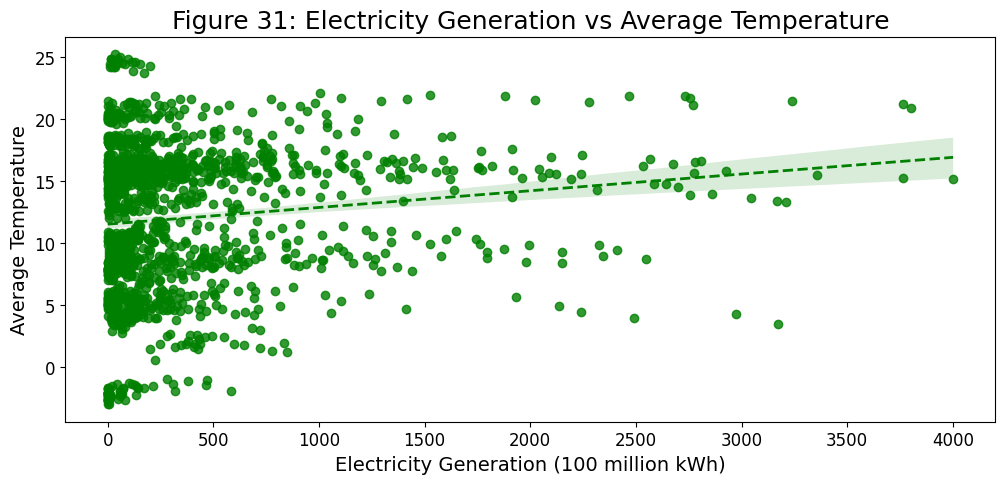

In [72]:
plt.figure(figsize=(12, 5))
sns.regplot(x='Electricity Generation (100 million kWh)', y='AverageTemperature', data=final_reg, color='g', line_kws={'linestyle': '--', 'linewidth': 2})
plt.title('Figure 31: Electricity Generation vs Average Temperature', fontsize=18)
plt.xlabel('Electricity Generation (100 million kWh)', fontsize=14)
plt.ylabel('Average Temperature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### GDP by province


We also plotted the map showing the GDP by province in project 2. GDP is an important economic indicator that reflects the overall economic activity. As such, it can be expected to have an impact on various aspects of the region or country, including the temperature. Upon examining the scatter plot, we observed a non-linear relationship between GDP and the average temperature. However, we also noted that GDP exhibits strong heteroskedasticity. To verify the appropriateness of the model, we choose to perform multiple regression initially. Later, we decide to apply a log transformation to these variables in the subsequent multiple regression. By performing multiple regression and applying a log transformation to the GDP variable, we can better account for the non-linear relationship and assess its impact on the average temperature.

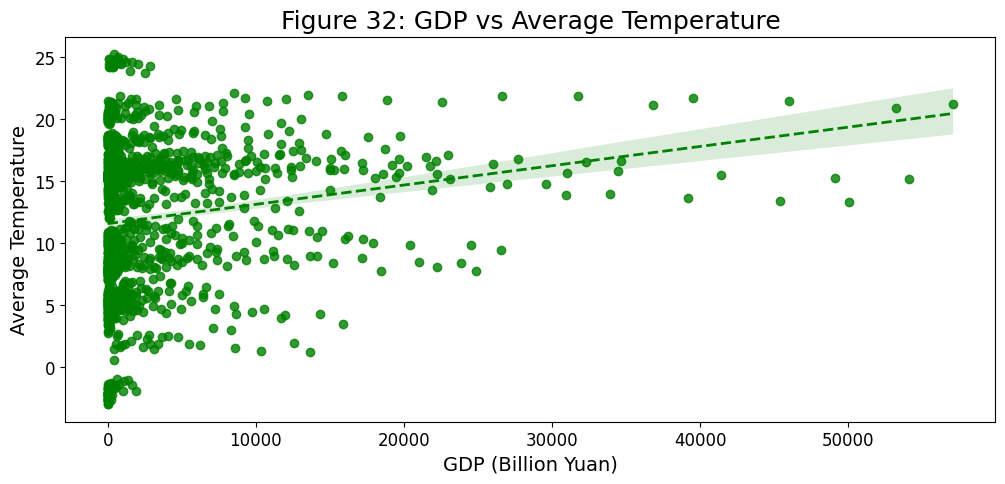

In [73]:
plt.figure(figsize=(12, 5))
sns.regplot(x='GDP', y='AverageTemperature', data=final_reg, color='g', line_kws={'linestyle': '--', 'linewidth': 2})
plt.title('Figure 32: GDP vs Average Temperature', fontsize=18)
plt.xlabel('GDP (Billion Yuan)', fontsize=14)
plt.ylabel('Average Temperature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## OLS Regression

### *Simple Linear Regression
As our final project requires us to use multiple independent variables for regression, we used a simple regression process to compare and ensure the validity of the models we will use later. This part of the regression is not directly related to our final project.

Our project aims to explore the relationship between urbanization and temperature change in China. To accomplish this, we will use a series of independent variables such as GDP, highway mileage, the number of vehicles, population by province as our indicators to represent economic development in China. These independent variables are well-established indicators of economic development and urbanization. 

However, the original dataset provided by Kaggle includes many outdated city names and unclassified cities, which makes the merging process difficult. Therefore, we will use the temperature dataset that we used in project 2 when we mapped the average temperature in China, which has organized province names that make the merging process easier and will result in a more accurate regression output.

Additionally, we will drop rows with missing values since some provinces in China from the period 1950 to 2012 may not have data until later when the classification of provinces was established. By doing so, we can obtain a clear regression outcome.

In [74]:
# Add a constant column to the dataset
final_reg['const'] = 1

# Define the dependent variable
Y = final_reg['AverageTemperature']

# Define the independent variables for each regression
X1 = final_reg[['const', 'Highway mileage (kilometers)']]
X2 = final_reg[['const', 'Population (in ten thousands)']]
X3 = final_reg[['const', 'Electricity Generation (100 million kWh)']]
X4 = final_reg[['const', 'Total number of vehicles (in ten thousands)']]

# Fit the regression models
model1 = sm.OLS(Y, X1).fit()
model2 = sm.OLS(Y, X2).fit()
model3 = sm.OLS(Y, X3).fit()
model4 = sm.OLS(Y, X4).fit()

# Create a summary table of regression results
results_table = summary_col([model1, model2, model3, model4],
                            float_format='%0.2f',
                            stars=True,
                            model_names=['Model 1', 'Model 2', 'Model 3', 'Model 4'],
                            regressor_order=['const', 'Electricity Generation (100 million kWh)',
                                             'Highway mileage (kilometers)',
                                             'Population (in ten thousands)', 'Total number of vehicles (in ten thousands)'])

# Create a Stargazer object and add the regression models
stargazer = Stargazer([model3, model1, model2, model4])
stargazer.significant_digits(5)
stargazer.float_format = '%.5f'

# Render the HTML output
HTML(stargazer.render_html())

For the first simple regression between electricity generation and average temperature, we can conclude with 99 percent confidence that a one billion kWh increase in electricity generation results in approximately 0.01 degree Celsius temperature increase in China. It is worth noting that the constant holds no meaningful interpretation since 0 kWh lies outside the range of data, and extrapolation is not advisable. The R-squared value of 0.01273 suggests that only 1.27 percent of the variation in average temperature is explained by the variation in electricity generation. However, there may be an endogeneity bias present due to the possible reverse correlation between temperature and electricity generation. For instance, temperature changes may affect electricity generation, such as increased use of air conditioning due to higher temperatures and increased electricity demand, while increased electricity generation may lead to higher temperatures due to waste heat generated by power plants. The adjusted R-squared value is similar to the R-squared value.

For the second simple regression between highway mileage and average temperature, we can conclude with 99 percent confidence that a 1000 kilometers increase in highway mileage results in approximately 0.01 degree Celsius temperature increase in China. As with the previous regression, the constant holds no meaningful interpretation since 0 kilometer is outside the range of data. The R-squared value of 0.01369 suggests that only 1.369 percent of the variation in average temperature is explained by the variation in highway mileage, which is relatively low. The adjusted R-squared value is similar to the R-squared value.

For the third simple regression between population and average temperature, we can conclude with 99 percent confidence that a one billion increase in population results in approximately 0.086 degree Celsius temperature increase in China. As before, the constant holds no meaningful interpretation since 0 people is outside the range of data. The R-squared value of 0.11346 suggests that 11.35 percent of the variation in average temperature is explained by the variation in population, which is the highest among the three regressions. The high F-statistic value indicates that the model is overall statistically significant, and this model is the best among the four simple linear regressions.

For the fourth simple regression between total number of vehicles and average temperature, we can conclude with 99 percent confidence that a one hundred thousand increase in number of vehicles results in approximately 0.067 degree Celsius temperature increase in China. As before, the constant holds no meaningful interpretation since 0 car is outside the range of data. The R-squared value of 0.01446 suggests that 1.446 percent of the variation in average temperature is explained by the variation in the number of vehicles. The F-statistic value indicates that the model is overall statistically significant.

### Multiple Linear Regression

$$
\textbf{Model 1: } \text{Average_Temperature} = \beta_0 + \beta_1 \text{Population} + \epsilon
$$

As previously discussed, linear regression may not be sufficient to capture all the changes in average temperature using only one independent variable. Therefore, we opted to use multiple regression models. However, we observed a high R-squared value in the previous simple regression model using population as the independent variable. As such, we decided to incorporate it into our table as an indicator of how our multiple regression is performing. The first model uses population as the independent variable. The second model adds more independent variables, including electricity generation, GDP, total number of vehicles, highway mileage, and population. The third model is based on the second model but adds a dummy variable indicating whether the region is in the south or north part of China. Comparing model 1 to models 2 and 3 clearly demonstrates that the latter provides a more accurate regression outcome.

$$
\textbf{Model 2: } \text{Average_Temperature} = \beta_0 + \beta_1 \text{Electricity_Generation} + \beta_2 \text{GDP} + \beta_3 \text{Highway_mileage} + \beta_4 \text{Population} + \beta_5 \text{Number_Vehicles} + \epsilon
$$

In model 2, the R-squared value indicates that approximately 20.85% of the variation in average temperature can be explained by the independent variables, which include electricity generation, GDP, total number of vehicles, highway mileage, and population. The F-statistic is 76.64, indicating that the model is statistically significant overall. However, when we compare model 2 with model 3, we can see that adding just one more variable, the dummy variable south, significantly improves the model's ability to explain the variation in average temperature. Thus, we decide to move on and find other useful models to explain the relationship.

$$
\textbf{Model 3: } \text{Average_Temperature} = \beta_0 + \beta_1 \text{Electricity_Generation} + \beta_2 \text{GDP} + \beta_3 \text{Highway_mileage} + \beta_4 \text{Population} + \beta_5 \text{Number_Vehicles} + \beta_6 \text{South} + \epsilon
$$

In model 3, around 40.50% of the variation in average temperature can be explained by the independent variables, including additional dummy variable south. The F-statistic is also high, at 164.89, indicating that the model is overall statistically significant. In model 3, we can interpret what the coefficient means. After controlling for electricity generation, GDP, total number of vehicles, highway mileage, and population, the south part of China is on average 4.78 celsius degrees hotter than the north part. 

After controlling electricity generation, GDP, total number of vehicles, region of China, and highway mileage constant, we are 99% confident that every one hundred thousand increase in population is associated with an increase of 0.014 celsius in the average temperature. The coefficient here is larger than in the simple regression, meaning that as population increases, it relates to a higher average temperature. Holding electricity generation, GDP, total number of vehicles, region of China, and population constant, we are 99% confident that every one thousand kilometers increase in highway mileage is associated with a decrease of 0.03 celsius in the average temperature. The result is completely different from simple regression where the coefficient is positive.

Besides these statistically significant coefficients, we also noticed that the number of vehicles coefficient in model 3 is not statistically significant, and we fail to reject the null hypothesis. In addition, the coefficient of electricity generation and GDP is only signicant at 90 percent confidence level. It does not mean that these variables have no linear relationship with the average temperature, but that they contribute nothing to the modeling after allowing for all the other predictors.

In [75]:
# Define the dependent variable
Y = final_reg['AverageTemperature']

# Define the independent variables for each regression
X1 = final_reg[['const', 'Population (in ten thousands)']]
X2 = final_reg[['const', 'Total number of vehicles (in ten thousands)', 'Electricity Generation (100 million kWh)', 'Population (in ten thousands)', 'GDP', 'Highway mileage (kilometers)']]
X3 = final_reg[['const', 'Total number of vehicles (in ten thousands)', 'Electricity Generation (100 million kWh)', 'Population (in ten thousands)', 'GDP', 'South', 'Highway mileage (kilometers)']]

# Fit the regression models
model1 = sm.OLS(Y, X1).fit()
model2 = sm.OLS(Y, X2).fit()
model3 = sm.OLS(Y, X3).fit()

# Create a summary table of regression results
results_table = summary_col([model2, model3, model1],
                            float_format='%0.2f',
                            stars=True,
                            model_names=['Model 1', 'Model 2', 'Model 3'],
                            regressor_order=['const', 'GDP Per Capita(Yuan)', 'Population (in ten thousands)', 'Electricity Generation (100 million kWh)', 'GDP', 'South', 'Highway mileage (kilometers)', 'Total number of vehicles (in ten thousands)'])

# Create a Stargazer object and add the regression models
stargazer = Stargazer([model1, model2, model3])
stargazer.significant_digits(5)
stargazer.float_format = '%.5f'

# Render the HTML output
HTML(stargazer.render_html())

### Mutiple Regression with Interaction Terms

Incorporating interaction terms can allow us to capture the combined effect of two or more independent variables on the dependent variable, which may not be adequately captured by a simple additive model. By introducing interaction terms into our regression models, we can better capture the complexity of the relationship between the independent variables and the dependent variable, and potentially improve the accuracy of our models.

In this case, we have already developed a multiple regression model (model 3) that is good at explaining the average temperature, but we believe that incorporating interaction terms can make our regression even more accurate. Therefore, we have developed four new models and added four interaction terms to capture the combined effect of certain independent variables on the dependent variable. By doing so, we can potentially improve the explanatory power of our models and obtain more reliable predictions of the average temperature.

$$
\textbf{Model 4: } \text{Average_Temperature} = \beta_0 + \beta_1 \text{Electricity_Generation} + \beta_2 \text{GDP} + \beta_3 \text{Highway_mileage} + \beta_4 \text{Population} + \beta_5 \text{Number_Vehicles} + \beta_6 \text{South} + \beta_7 \text{South} \times \text{Electricity_Generation} + \epsilon
$$

The fourth model adds the interaction term 'Electricity_South', which captures the potential nonlinear effects of electricity generation on temperature in different regions. However, the coefficient of 0.00020 is not significant, and we cannot provide an explanation for the variable. Thus, this model is not helpful and we choose to move on.

$$
\textbf{Model 5: } \text{Average_Temperature} = \beta_0 + \beta_1 \text{Electricity_Generation} + \beta_2 \text{GDP} + \beta_3 \text{Highway_mileage} + \beta_4 \text{Population} + \beta_5 \text{Number_Vehicles} + \beta_6 \text{South} + \beta_7 \text{South} \times \text{Population} + \epsilon
$$

The fifth model adds the interaction term 'Population_South'. Unlike the first model, the coefficient is now significant, and we can provide an economic interpretation for it. Holding other factors constant, for every one million increase in population in the south region of China, we are 99 percent confident that it will cause the average temperature to increase around 0.05 Celsius more than it would in the north areas. In other words, the effect of population on temperature is stronger in the south region compared to the north region.

$$
\textbf{Model 6: } \text{Average_Temperature} = \beta_0 + \beta_1 \text{Electricity_Generation} + \beta_2 \text{GDP} + \beta_3 \text{Highway_mileage} + \beta_4 \text{Population} + \beta_5 \text{Number_Vehicles} + \beta_6 \text{South} + \beta_7 \text{South} \times \text{GDP} + \epsilon
$$

Similar to the fourth model, the sixth model does not give us clear information since the interaction term 'GDP_South' is not significant, and we cannot provide an economic interpretation for it. Thus, this model is not helpful and we choose to move on.

$$
\textbf{Model 7: } \text{Average_Temperature} = \beta_0 + \beta_1 \text{Electricity_Generation} + \beta_2 \text{GDP} + \beta_3 \text{Highway_mileage} + \beta_4 \text{Population} + \beta_5 \text{Number_Vehicles} + \beta_6 \text{South} + \beta_7 \text{South} \times \text{Highway_mileage} + \epsilon
$$

The seventh model adds the interaction term 'Highway_South', which has a statistically significant coefficient, and we can provide an economic interpretation for it. Holding other factors constant, for every one thousand increase in highway mileage in the south region of China, we are 99 percent confident that it will cause the average temperature to increase around 0.02 Celsius more than it would in the north areas. The effect of the number of highway mileage on temperature is stronger in the south region compared to the north region.

After conducting our analysis, we found that population has a significant impact on the average temperature. Our observations also indicated that the effect of population on temperature is more pronounced in the south region than the north region. This highlights the significance of population in shaping the climate patterns of a region. Therefore, we have decided to incorporate the variable Population_South in our future regression models as an independent variable to better understand and account for its impact on average temperature. By including this variable in our analysis, we can improve the accuracy of our model and provide a more comprehensive understanding of the factors that contribute to changes in average temperature.

In [79]:
Y = final_reg['AverageTemperature']

final_reg['GDP_South'] = final_reg['GDP'] * final_reg['South']
final_reg['Population_South'] = final_reg['Population (in ten thousands)'] * final_reg['South']
final_reg['Electricity_South'] = final_reg['Electricity Generation (100 million kWh)'] * final_reg['South']
final_reg['Highway_South'] = final_reg['Highway mileage (kilometers)'] * final_reg['South']

X4 = final_reg[['const', 'Total number of vehicles (in ten thousands)', 'Electricity Generation (100 million kWh)', 'Population (in ten thousands)', 'GDP', 'South', 'Highway mileage (kilometers)', 'GDP_South']]
X5 = final_reg[['const', 'Total number of vehicles (in ten thousands)', 'Electricity Generation (100 million kWh)', 'Population (in ten thousands)', 'GDP', 'South', 'Highway mileage (kilometers)', 'Population_South']]
X6 = final_reg[['const', 'Total number of vehicles (in ten thousands)', 'Electricity Generation (100 million kWh)', 'Population (in ten thousands)', 'GDP', 'South', 'Highway mileage (kilometers)', 'Electricity_South']]
X7 = final_reg[['const', 'Total number of vehicles (in ten thousands)', 'Electricity Generation (100 million kWh)', 'Population (in ten thousands)', 'GDP', 'South', 'Highway mileage (kilometers)', 'Highway_South']]

# Fit the regression models
model4 = sm.OLS(Y, X4).fit()
model5 = sm.OLS(Y, X5).fit()
model6 = sm.OLS(Y, X6).fit()
model7 = sm.OLS(Y, X7).fit()

# Create a summary table of regression results
results_table = summary_col([model4, model5, model6, model7],
                            float_format='%0.2f',
                            stars=True,
                            model_names=['Model 4', 'Model 5', 'Model 6', 'Model 7'],
                            regressor_order=['const', 'GDP_South', 'Population_South', 'Electricity_South', 'Highway_South', 'GDP', 'Electricity Generation (100 million kWh)', 'Population (in ten thousands)', 'South'])

# Create a Stargazer object and add the regression model
stargazer = Stargazer([model6, model5, model4, model7])
stargazer.significant_digits(5)
stargazer.float_format = '%.5f'

# Render the HTML output
HTML(stargazer.render_html())

### Multiple Regression with Log terms

The scatter plots of each independent variable against the dependent variable, average temperature, showed that the relationship between each variable and the dependent variable was non-linear. In order to capture this non-linearity and make our regression models more accurate, we decided to apply a log transformation to each independent variable.

After applying the log transformation, we re-examined the scatter plots and observed that the relationships between the independent variables and the dependent variable were now linear. We also noticed that the heteroskedasticity issue observed earlier was resolved. This transformation allowed us to create a more accurate multiple regression model and make reliable predictions about the relationship between the independent variables and the dependent variable.

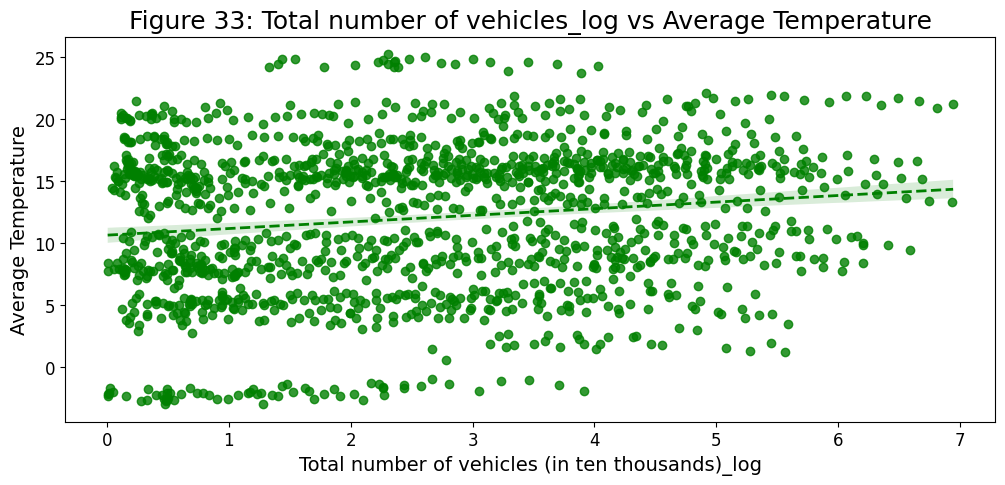

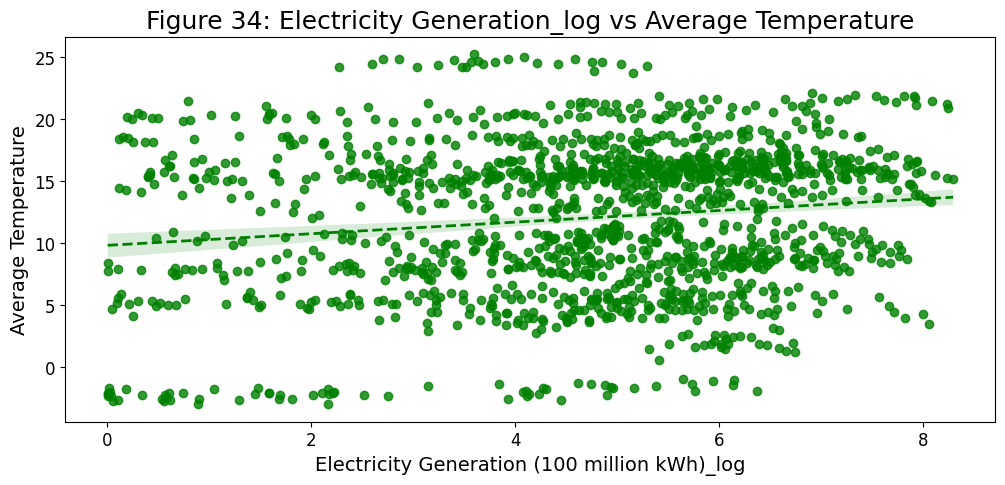

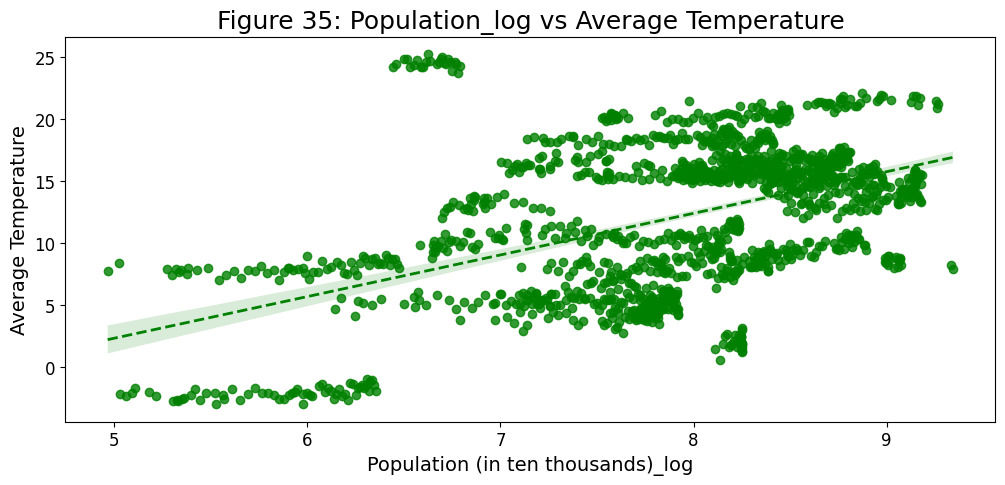

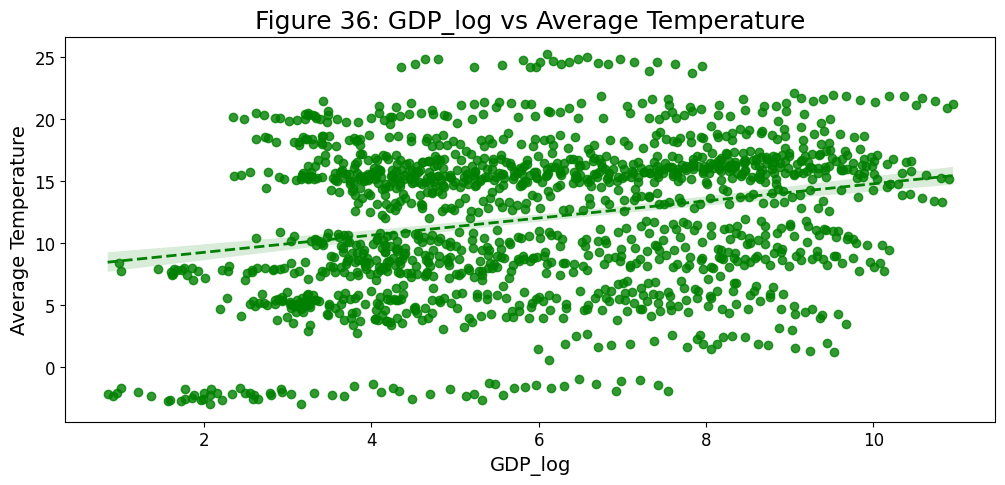

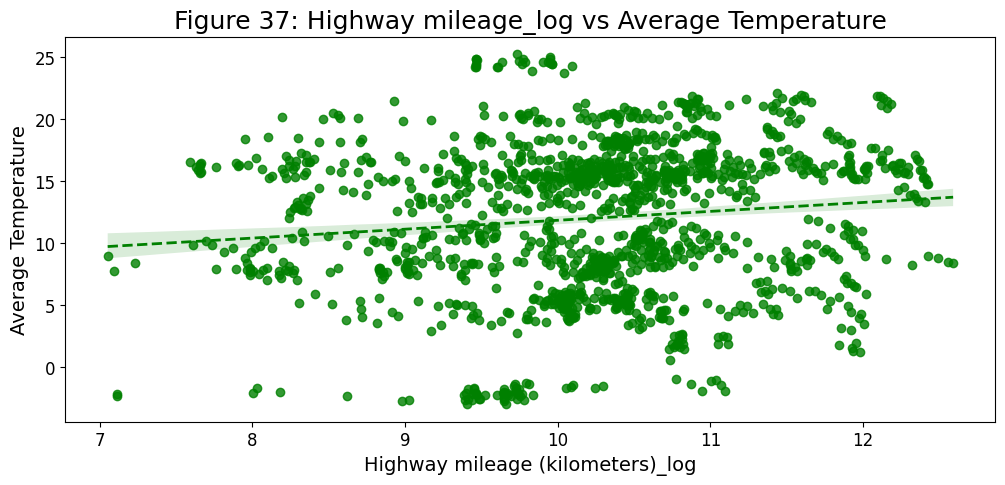

In [80]:
# Log transformation of variables
final_reg['Total number of vehicles (in ten thousands)_log'] = np.log(final_reg['Total number of vehicles (in ten thousands)'] + 1)
final_reg['Electricity Generation (100 million kWh)_log'] = np.log(final_reg['Electricity Generation (100 million kWh)'] + 1)
final_reg['Population (in ten thousands)_log'] = np.log(final_reg['Population (in ten thousands)'] + 1)
final_reg['GDP_log'] = np.log(final_reg['GDP'] + 1)
final_reg['Highway mileage (kilometers)_log'] = np.log(final_reg['Highway mileage (kilometers)'] + 1)

final_reg = final_reg.dropna()

def plot_scatter_reg(variable, title):
    plt.figure(figsize=(12, 5))
    sns.regplot(x=variable+'_log', y='AverageTemperature', data=final_reg, color='g', line_kws={'linestyle': '--', 'linewidth': 2})
    plt.title(title, fontsize=18)
    plt.xlabel(variable+'_log', fontsize=14)
    plt.ylabel('Average Temperature', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

plot_scatter_reg('Total number of vehicles (in ten thousands)', 'Figure 33: Total number of vehicles_log vs Average Temperature')
plot_scatter_reg('Electricity Generation (100 million kWh)', 'Figure 34: Electricity Generation_log vs Average Temperature')
plot_scatter_reg('Population (in ten thousands)', 'Figure 35: Population_log vs Average Temperature')
plot_scatter_reg('GDP', 'Figure 36: GDP_log vs Average Temperature')
plot_scatter_reg('Highway mileage (kilometers)', 'Figure 37: Highway mileage_log vs Average Temperature')


$$
\textbf{Model 8: } \text{Average_Temperature} = \beta_0 + \beta_1 \log(\text{Electricity_Generation}) + \beta_2 \log(\text{GDP}) + \beta_3 \log(\text{Highway_mileage}) + \beta_4 \log(\text{Population}) + \beta_5 \log(\text{Number_Vehicles}) + \beta_6 \text{South} + \epsilon
$$

In the model 8, we have applied a log transformation to each independent variable to account for non-linearity. The high F-statistic value of 351.20 suggests that the model is overall statistically significant. Using the logged version of independent variables to explain average temperature has yielded a more accurate and reliable model, as evidenced by the high R-squared value of 0.5917, indicating that approximately 59.17% of the variation in average temperature can be explained by the variation in independent variables.

$$
\textbf{Model 9: } \text{Average_Temperature} = \beta_0 + \beta_1 \log(\text{Electricity_Generation}) + \beta_2 \log(\text{GDP}) + \beta_3 \log(\text{Highway_mileage}) + \beta_4 \log(\text{Population}) + \beta_5 \log(\text{Number_Vehicles}) + \beta_6 \text{South} + \beta_7 \text{South} \times \text{Population} + \epsilon
$$

Model 9, which includes an additional independent interaction term, exhibits the highest R-squared and adjusted R-squared values among all the models we examined, with a slight decrease in the F statistic. However, we cannot conclude that the second model is less effective in explaining average temperature. An economic interpretation of the coefficients indicates that all independent variables, except for the logged total number of vehicles, are statistically significant. The negative coefficient of electricity generation (-0.764) suggests that, holding other factors constant, a 10% increase in electricity generation is associated with a decrease of approximately 0.08 degrees Celsius in average temperature. This finding is contrary to our initial expectation in project 3, where we hypothesized a positive relationship between energy generation and average temperature. However, we cannot completely rule out the possibility that electricity generation contributes to warming China. To gain further insight, we conducted regression tree analysis in the machine learning section. Additionally, a 10% increase in GDP is associated with a increase of approximately 0.15 degrees Celsius in average temperature, indicating that economic development and urbanization contribute to the warming process in China. Moreover, a 10% increase in highway mileage is associated with a decrease of approximately 0.29 degrees Celsius in average temperature, while a 10% increase in population is associated with an increase of approximately 0.52 degrees Celsius in average temperature. The positive effect of population on average temperature is the most prominent and significant among all the independent variables. 

Further investigation of the interaction term reveals that, holding other factors constant, a one million increase in population in the south region of China is associated with a decrease of approximately 0.032 degrees Celsius more in average temperature than in the north region, with 99% confidence. This suggests that the effect of population on temperature is weaker in the south region compared to the north region, which contradicts our previous regression outcome. However, when we combine this new result with our previous findings, which indicate that the north region experiences a higher temperature change than the south region of China, a more comprehensive picture emerges. As population growth and urbanization continue to accelerate, it generates more extreme temperature days, where the north part of China experiences more high-temperature days, while the south region experiences more low-temperature days. It may be beneficial to further analyze the differences between the north and south regions by examining the results of the regression tree in the machine learning section. This finding sheds light on the complex relationship between population, urbanization, and temperature in different regions of China, highlighting the importance of considering regional variations when studying the impacts of urbanization on climate change. As a result, this well-constructed model provides valuable insights into how urbanization influences the average temperature and contributes to the warming trend in China.

In [81]:
Y = final_reg['AverageTemperature']

X8 = final_reg[['const', 'Total number of vehicles (in ten thousands)_log', 'Electricity Generation (100 million kWh)_log', 'Population (in ten thousands)_log', 'GDP_log', 'South', 'Highway mileage (kilometers)_log']]
X9 = final_reg[['const', 'Total number of vehicles (in ten thousands)_log', 'Electricity Generation (100 million kWh)_log', 'Population (in ten thousands)_log', 'GDP_log', 'South', 'Highway mileage (kilometers)_log', 'Population_South']]

# Fit the regression model
model8 = sm.OLS(Y, X8).fit()
model9 = sm.OLS(Y, X9).fit()

# Create a summary table of regression results
results_table = summary_col([model8, model9],
                            float_format='%0.2f',
                            stars=True,
                            model_names=['Model8', 'Model9'],
                            regressor_order=['const', 'Total number of vehicles (in ten thousands)_log', 'Electricity Generation (100 million kWh)_log', 'Population (in ten thousands)_log', 'GDP_log', 'South', 'Population_South'])

# Create a Stargazer object and add the regression models
stargazer = Stargazer([model8, model9])
stargazer.significant_digits(5)
stargazer.float_format = '%.5f'

# Render the HTML output
HTML(stargazer.render_html())

## Machine Learning

### Objective function and MSE

In order to further enhance our analysis, we decided to use regression tree to gain more insights into the relationship between the independent variables and the dependent variable. We started by selecting the independent variables that we included in our ideal regression model, and we fitted the decision tree model using these variables. We set the maximum depth of the tree to 3 to avoid overfitting, and we plotted the resulting tree to visualize the splits and branches.

To evaluate the performance of our decision tree model, we calculated the mean squared error between the predicted values and the actual values. Interestingly, we found that the mse for the predications is 12.09. The decision tree model provides a useful visualization of the data and can identify nonlinear relationships that may be missed in linear regression models.

In [85]:
# Define X and y variables
X = final_reg[['Electricity Generation (100 million kWh)_log', 'GDP_log',
               'Highway mileage (kilometers)_log', 'Population (in ten thousands)_log',
               'Total number of vehicles (in ten thousands)_log', 'South']]
y = final_reg['AverageTemperature']

# Fit the decision tree model to the training data
sqft_tree = DecisionTreeRegressor(max_depth=3)
sqft_tree.fit(X, y)

# Use the fitted tree to predict the target variable (y)
y_pred_tree = sqft_tree.predict(X)

# Find the error of prediction (MSE)
mse = metrics.mean_squared_error(y, y_pred_tree)
print('Mean Squared Error (logged version):', mse)

Mean Squared Error (logged version): 12.087507548994918


The objective function for a regression tree with the given variables is to minimize the sum of squared differences between the observed average temperature values and the predicted values of average temperature from a regression tree model. The equation uses the average temperature as the dependent variable and includes independent variables such as the logarithms of electricity generation, GDP, highway mileage, population, total number of vehicles, and a dummy variable for South region. The coefficients represent the impact of each independent variable on the average temperature, and the goal of the regression tree is to find the best values for these coefficients that minimize the overall error between the observed and predicted values.


$$
\frac{1}{N} \sum_{i=1}^N \left(\text{AverageTemperature}_i - (\beta_0 + \beta_1 \log(\text{Electricity Generation}_i) + \beta_2 \log(\text{GDP}_i) + \beta_3 \log(\text{Highway mileage}_i) + \beta_4 \log(\text{Population}_i) + \beta_5 \log(\text{Total number of vehicles}_i) + \beta_6 \text{South}_i) \right)^2
$$

### Regression Tree

Regularization parameters are used to prevent overfitting. In our regression tree, we do not specify what is the value of our regularization parameter. However, we know that if we set our parameter value close to 1, we will have a simpler regression tree and the model may become less accurate. If we set our parameter value close to 0, we will have a more complicated regression tree and the result will be too complex to interpret. 

When examining the initial node of the regression tree, we observed that for provinces with a population growth rate below 6.386 percent, the predicted average temperature is around 12.007 Celsius degrees. In the second layer of the tree, the data is split based on two independent variables: highway mileage and population. The left branch of the tree shows that for provinces where the highway mileage growth rate is less than or equal to 9.388 percent and population growth rate is below 6.386 percent, the predicted average temperature is 2.514 degrees Celsius. On the other hand, the right branch of the tree indicates that for provinces where the population growth rate is less than or equal to 7.936 percent but greater than 6.386 percent, the predicted average temperature is 12.857 degrees Celsius. The same applies to the third layer.

The final layer of the regression tree provides the most insightful and useful information. Our multiple regression analysis showed that an increase in electricity generation is associated with a decrease in average temperature, which contradicts what we proposed earlier, and we could not interpret the relationship before. However, after plotting the regression tree, we gained insight into how electricity generation affects the average temperature in China. The tree showed that for provinces with population growth rates greater than 6.386 percent and highway mileage growth rates less than 9.388 percent, those with electricity generation growth rate higher than 0.6 percent will generally experience a higher temperature of 5.9 degrees Celsius. This result is not what we observed based on multiple regressions, and it supports our hypothesis about the role of urbanization in shaping average temperature trends.

Furthermore, the regression tree reveals that population is a crucial factor in driving the increase of average temperature. For provinces located in the northern region of China, those with a population growth rate exceeding 8.36 percent are expected to experience a temperature rise of approximately 5.5 degrees Celsius. Similarly, in the southern region, provinces with a population growth rate surpassing 7.74 percent will experience a temperature increase of around 2.29 degrees Celsius. These results confirm that provinces with a higher population, regardless of their geographic location, are more prone to experiencing elevated temperatures, thereby reinforcing the findings obtained from our multiple regression analysis. In the multiple regression result from model 9, we get the conclusion that the effect of population on temperature is weaker in the south region compared to the north region, which is justified here. The observed population growth and urbanization may well be contributing to the escalating average temperature in China.

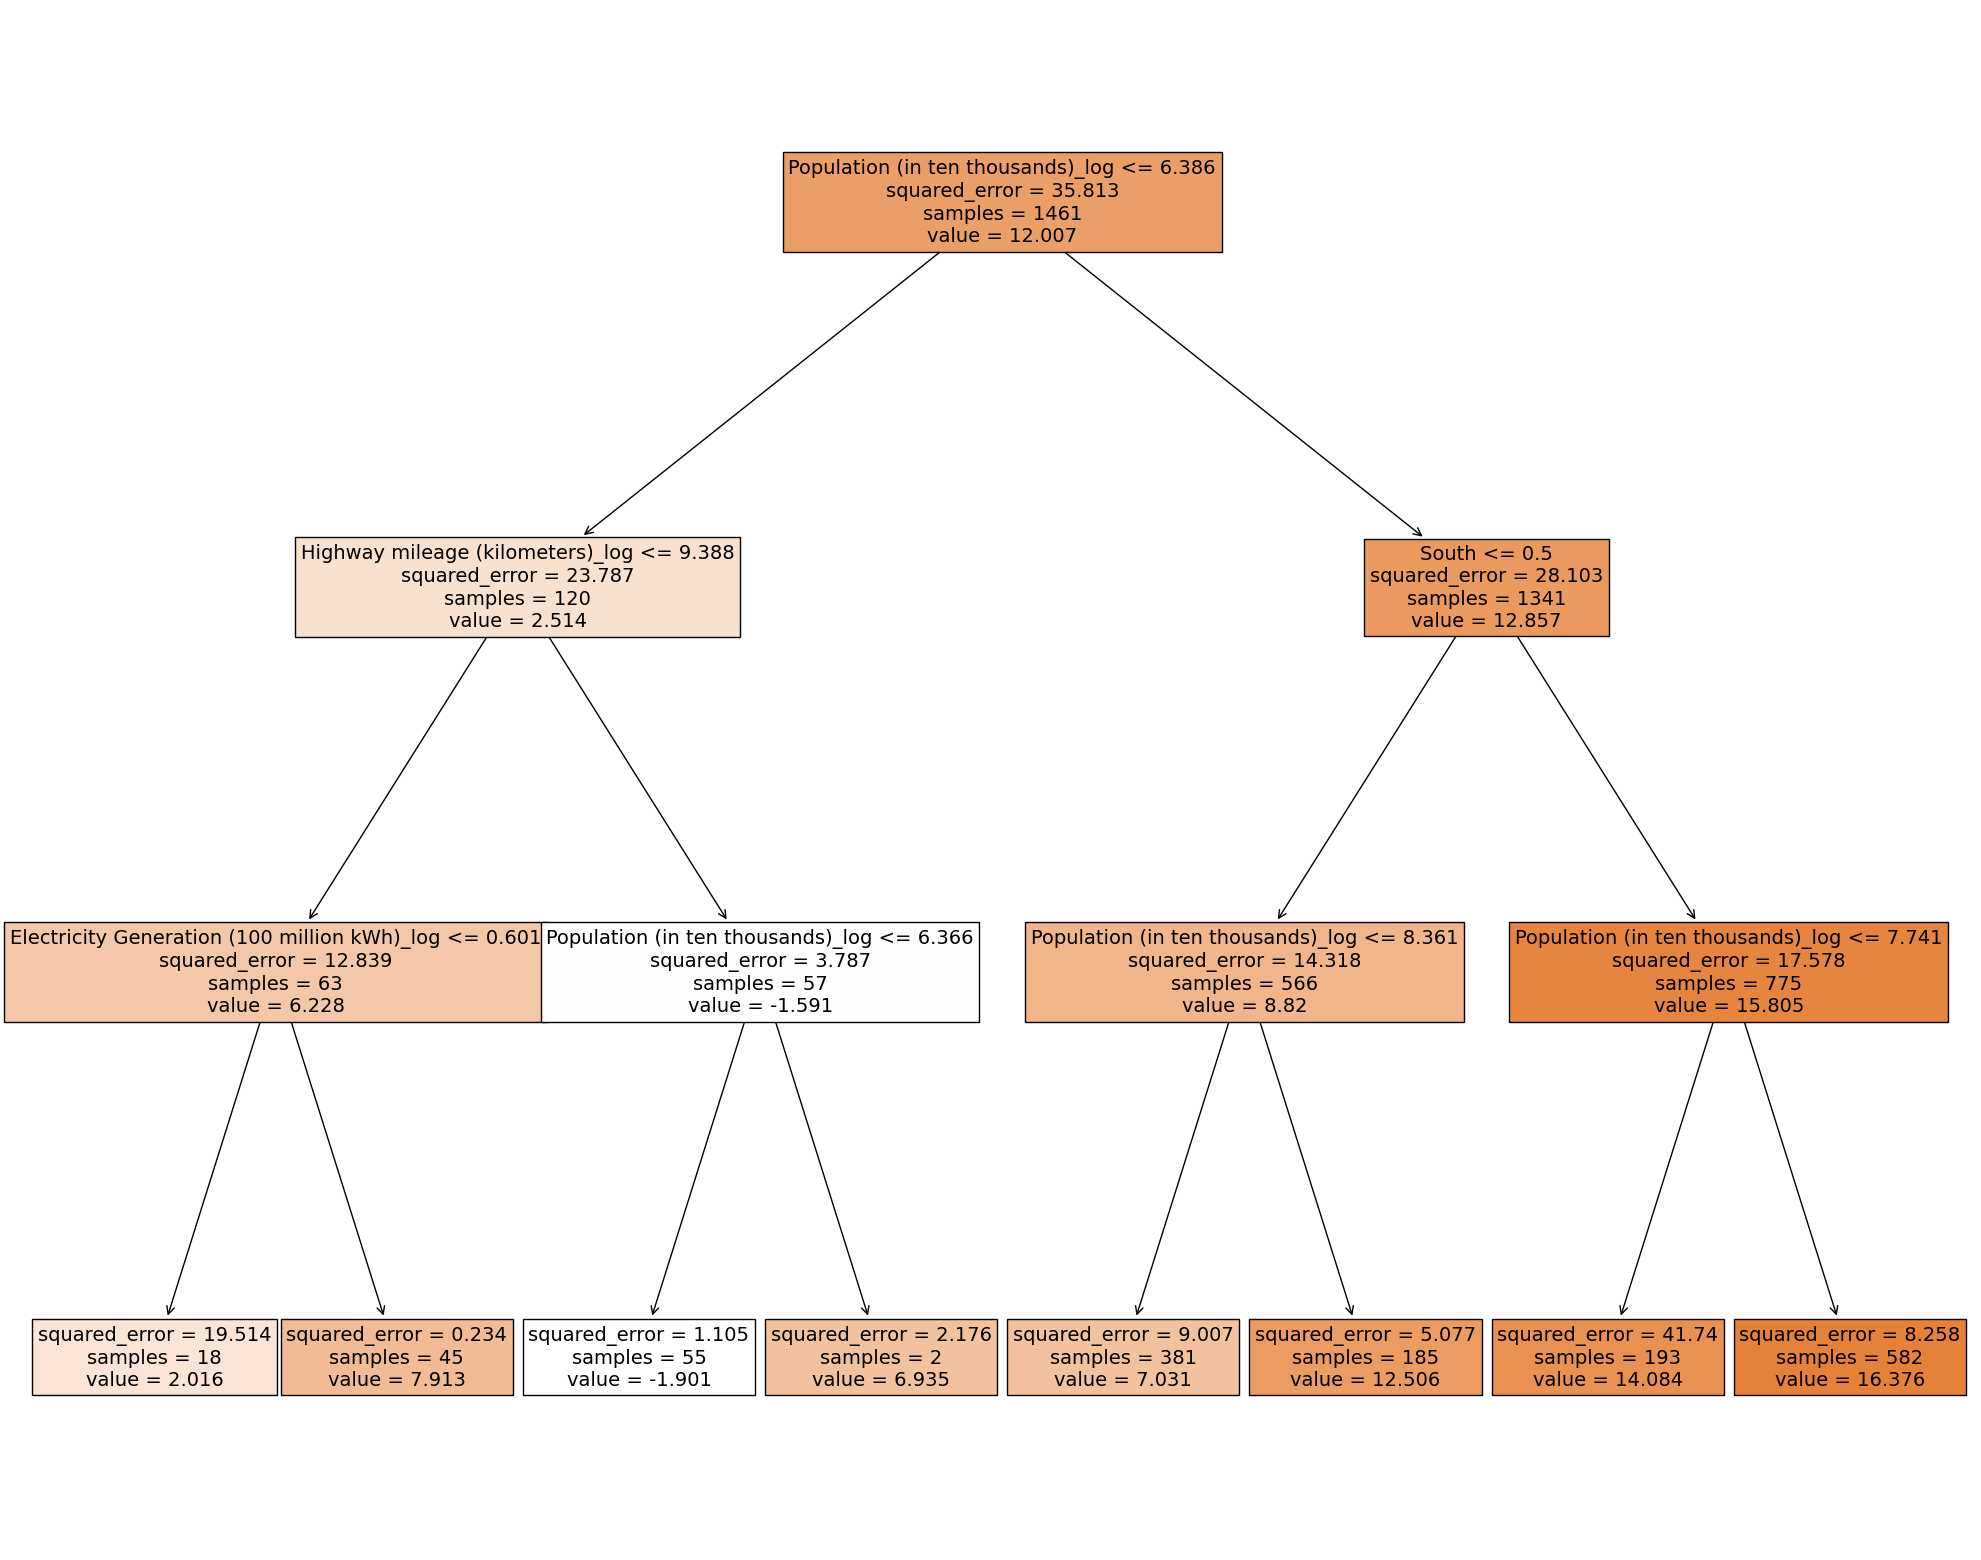

In [89]:
# Fit the decision tree model to the training data
sqft_tree = DecisionTreeRegressor(max_depth=3)
sqft_tree.fit(X, y)

# Plot the decision tree
sqft_fig = plt.figure(figsize=(25, 20))
plot_tree(sqft_tree, feature_names=X.columns, filled=True, fontsize=14)
plt.show()

### Random Forest (RF) and Importance Matrix

The results of our Random Forest model provide significant insights into the relationship between urbanization and average temperature in China. The drastic reduction in mse from 12.09 to 0.36 indicates the high accuracy of the model. The importance matrix showed that the population variable has a significant impact on reducing the error, which confirms our previous findings on the role of population growth in shaping average temperature trends. Furthermore, we found that creating a dummy variable to classify regions into north and south was effective in reducing the error, suggesting that regional differences play an important role in this relationship. Finally, our results indicate that highway mileage also contributes to shaping average temperature trends. Our findings provide empirical evidence of the significant impact of urbanization and related factors such as population growth and infrastructure development on average temperature trends, highlighting the importance of taking into account these factors in developing policies to mitigate the impacts of global warming.

Mean Squared Error: 0.3563029118275156


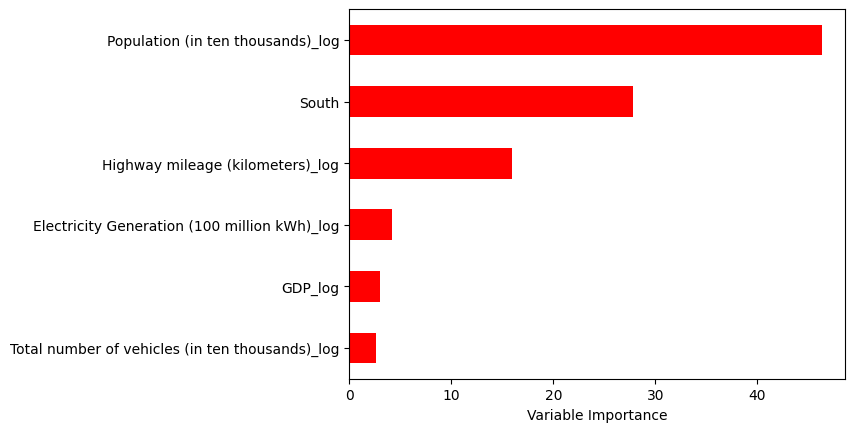

In [90]:
# create a random forest regressor object
regr = RandomForestRegressor(random_state=1)

# fit the regressor to your data
regr.fit(X, y)

# predict y values for your data
pred = regr.predict(X)

# calculate mean squared error
mse = mean_squared_error(y, pred)
print('Mean Squared Error:', mse)

# create a dataframe with feature importances
importance_df = pd.DataFrame({'Importance': regr.feature_importances_*100}, index=X.columns)

# sort the dataframe by importance and plot a horizontal bar chart
importance_df.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# show the plot
plt.show()

### Comparison with Regression Output

The main difference between the results from running a regression and a regression tree is the ability to capture non-linear and interactive effects. In a regression model, we assume a linear relationship between the dependent and independent variables, and we can only estimate the effect of each independent variable on the dependent variable individually, holding all other variables constant. However, in a regression tree, we can capture non-linear relationships and interactions between variables by recursively partitioning the data into subgroups based on the values of the independent variables.

In model 9 of our multiple regression analysis, we observed that there was a negative relationship between electricity generation and average temperature. Specifically, a 10% increase in electricity generation was associated with a decrease of approximately 0.08 degrees Celsius in average temperature, which was contrary to our initial hypothesis of a positive relationship between the two variables. However, the output from our regression tree provided further insights into this relationship. We found that provinces with higher electricity generation growth rates, exceeding 0.6 percent, experienced an increase in average temperature of 5.9 degrees Celsius, indicating that there is a positive relationship between the two variables, as we initially hypothesized. The urban heat island effect, where regions that generate more electricity are warmer than those that generate less, could be responsible for this positive relationship due to factors such as increased energy consumption, heat retention by buildings and infrastructure, and reduced green spaces.

Furthermore, the result from the regression tree validates our previous findings from multiple regression. We also found that the effect of population growth on temperature differed between the northern and southern regions of China. While our initial solution was unable to explain this difference, the outcome from our regression tree suggests that provinces with higher population growth rates, regardless of their location, are more prone to experiencing elevated temperatures. In the northern region, provinces with a population growth rate exceeding 8.36 percent were expected to experience a temperature rise of approximately 5.5 degrees Celsius, while in the southern region, provinces with a population growth rate surpassing 7.74 percent would experience a temperature increase of around 2.29 degrees Celsius. Our importance matrix also suggests that the population variable had a significant impact on reducing the error, which confirms our previous findings on the role of population growth in shaping average temperature trends.

## Conclusion

The research found that urbanization plays an important role in shaping average temperature trends in China from 1950 to 2012. As the graphs, multiple regression, and regression tree analyses suggest, we see that the temperature is increasing at a higher speed from 1979 to 2012 (when urbanization happened and the economy starts to bloom in China) compared with 1950 to 1978 (when the economy is growing very slowly). In addition, the average annual temperature is increasing in China from 1950 to 2012. More and more cities experienced extremely high-temperature years and fewer cities experienced low-temperature years. As urban population and the percentage of the urban population increases, the average temperature in China also increases. Furthermore, as China transitioned from an agriculture-based economy to a service-based economy, we also observed an increasing trend in temperature.

Our analysis has shown that population growth and urbanization are likely contributing factors to the rise in average temperature in China. Our regression tree analysis also provided additional insights by highlighting the impact of electricity generation growth rates on temperature changes. These findings underscore the urgent need for policymakers to prioritize sustainable urbanization and environmental conservation efforts to mitigate the negative impact of urbanization on the climate.

In conclusion, our study provides a comprehensive analysis of the impact of urbanization on temperature trends in China, utilizing both multiple regression and regression tree methods. The findings underscore the importance of considering urbanization as a key factor in climate change and highlight the need for policymakers to prioritize sustainable urbanization and environmental conservation efforts. Future research can build upon our findings by exploring additional indicators beyond urban and rural population, such as poverty levels and pollution emissions, to provide a more comprehensive understanding of the impact of urbanization on temperature changes.

## Citations
Li, C., Yan, J., & Xu, Z. (2021). How Does New-Type Urbanization Affect the Subjective Well-Being of Urban and Rural Residents? Evidence from 28 Provinces of China. Sustainability.

Li, Y., Zhu, L., Zhao, X., Li, S., & Yan, Y. (2013). Urbanization Impact on Temperature Change in China with Emphasis on Land Cover Change and Human Activity. Journal of Climate, 26, 8765-8780.

Zhang, N., Gao, Z., Wang, X., & Chen, Y. (2010). Modeling the impact of urbanization on the local and regional climate in Yangtze River Delta, China. Theoretical and Applied Climatology, 102, 331-342.

Fang, F., Guo, J., Sun, L., Wang, J., & Wang, X. (2014). The effects of urbanization on temperature trends in different economic periods and geographical environments in northwestern China. Theoretical and Applied Climatology, 116, 227-241.

Sun, Y., Zhang, X., Ren, G., Zwiers, F.W., & Hu, T. (2016). Contribution of urbanization to warming in China. Nature Climate Change, 6, 706-709.

World Bank Group, Climate Change Knowledge Portal. 

https://www.kaggle.com/datasets/amritharj/population-of-china-19502022?resource=download

https://doc.wendoc.com/b0b03a03c35395c84a353447d2fc02b48a1224354.html

https://commons.wikimedia.org/wiki/Data:Total_number_of_workers_by_sector_(GGDC,_2017)_(OWID_1881).tab

http://www.stats.gov.cn/english/Statisticaldata/AnnualData/
